### Telecom Churn Prediction 

### Problem Statement :
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Aim of the Case Study :
Analyzing customer-level data of a leading telecom firm and, 
1. Build predictive models to identify customers at high risk of churn.
2. Identify the main indicators of churn.

### Data charachteristics of the Telecom Churn Prediction :
- MOBILE_NUMBER:	Customer phone number
- CIRCLE_ID:	Telecom circle area to which the customer belongs to
- LOC:	Local calls - within same telecom circle
- STD:	STD calls - outside the calling circle
- IC:	Incoming calls
- OG:	Outgoing calls
- T2T:	Operator T to T, i.e. within same operator (mobile to mobile)
- T2M:    	Operator T to other operator mobile
- T2O:    	Operator T to other operator fixed line
- T2F:    	Operator T to fixed lines of T
- T2C:    	Operator T to it’s own call center
- ARPU:    	Average revenue per user
- MOU:    	Minutes of usage - voice calls
- AON:    	Age on network - number of days the customer is using the operator T network
- ONNET:   	All kind of calls within the same operator network
- OFFNET:    	All kind of calls outside the operator T network
- ROAM:	Indicates that customer is in roaming zone during the call
- SPL:   	Special calls
- ISD:    	ISD calls
- RECH:    	Recharge
- NUM:    	Number
- AMT:    	Amount in local currency
- MAX:    	Maximum
- DATA:    	Mobile internet
- 3G:    	3G network
- AV:    	Average
- VOL:    	Mobile internet usage volume (in MB)
- 2G:    	2G network
- PCK:    	Prepaid service schemes called - PACKS
- NIGHT:    	Scheme to use during specific night hours only
- MONTHLY:    	Service schemes with validity equivalent to a month
- SACHET:   	Service schemes with validity smaller than a month
- *.6:    	KPI for the month of June
- *.7:    	KPI for the month of July
- *.8:    	KPI for the month of August
- *.9:    	KPI for the month of September
- FB_USER:	Service scheme to avail services of Facebook and similar social networking sites
- VBC:    	Volume based cost - when no specific scheme is not purchased and paid as per usage


### 1. Reading and Understanding the Data.

In [1]:
# Suppress Warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing pandas ,numpy, matplotlib and seaborn libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes =True)

In [3]:
#Setting Maximum display option.
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [4]:
#Reading the telecom_churn_data.csv and storing in Telecom_churn_df dataframe.
Telecom_churn_df = pd.read_csv("telecom_churn_data.csv")

In [5]:
#Displaying the Telecom_churn_df top 5 rows.
Telecom_churn_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

### 2. Inspecting the Data frame.

In [6]:
#Understanding total number of row and column entries.
Telecom_churn_df.shape

(99999, 226)

- There are 99999 data entries with 226 data columns.

In [7]:
#Understanding table information.
Telecom_churn_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

- In total ,there are 214 numeric values [float64(179), int64(35)] and 12 categorical values.
#### - Undestanding Categorical variable.

In [8]:
#Understanding catrgorical Values and finding the Invalid values in categorical variables.
Telecom_churn_df.select_dtypes(include='object').describe(include='all')

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99398                98899   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99398                98899   

       last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
count                 98340               98392               98232   
unique                    1                  30                  31   
top               9/30/2014           6/30/2014           7/31/2014   
freq                  98340               16960               17288   

       date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
count                96377               95239                    25153   
unique                  31                  30                       30   
top              8/31/2014           9/29/2014                6/30/2014   
freq                 14706               22623                     1888   

       date_of_last_rech_data_7 date_of_last_rech_data_8  \
count                     25571                    26339   
unique                       31                       31   
top                   7/31/2014                8/31/2014   
freq                       1813                     1998   

       date_of_last_rech_data_9  
count                     25922  
unique                       30  
top                   9/29/2014  
freq                       2329

#### Top findings:
- Last date of a month has only one unique value indicating corresponding last date of that month and this will not be really helpful in model building and can be dropped. 

#### - Understanding Numerical columns:

In [9]:
# Understanding the Numerical data columns
Telecom_churn_df.select_dtypes(include=['int64','float64']).describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

#### Top findings:

- Data columns with one unique data values, circle_id (109),loc_og_t2o_mou (0), std_og_t2o_mou(0), loc_ic_t2o_mou(0), std_og_t2c_mou_6(0), std_og_t2c_mou_7(0), std_og_t2c_mou_8(0), std_og_t2c_mou_9(0),std_ic_t2o_mou_6(0),	std_ic_t2o_mou_7(0), std_ic_t2o_mou_8(0), std_ic_t2o_mou_9(0) ,this columns can be droped since they do not add on any information.

- Categorical data with numerical values ,night_pck_user_6	night_pck_user_7	night_pck_user_8	night_pck_user_9	monthly_2g_6	monthly_2g_7	monthly_2g_8	monthly_2g_9 sachet_2g_6	sachet_2g_7	sachet_2g_8	sachet_2g_9	monthly_3g_6	monthly_3g_7	monthly_3g_8	monthly_3g_9	sachet_3g_6	sachet_3g_7	sachet_3g_8 sachet_3g_9	fb_user_6	fb_user_7	fb_user_8	fb_user_9

In [10]:
# Creating a deep copy of the data frame for modification.
Telecom_churn_copy_df = Telecom_churn_df.copy(deep=True)

In [11]:
# Droping columns with one unique entry .
uniq_col = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'circle_id',
            'loc_og_t2o_mou' ,'std_og_t2o_mou' ,'loc_ic_t2o_mou' ,'std_og_t2c_mou_6' ,'std_og_t2c_mou_7' ,'std_og_t2c_mou_8',
            'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

Telecom_churn_copy_df.drop(columns = uniq_col,inplace=True)

### 3. EDA Analysis .

#### 3.1 Checking and Handling Missing values.

In [12]:
# Defining a function to capture null values in a sorted order.
def Null_percentage(df):
    return round((df.isnull().mean()).sort_values(ascending=False),4)*100

In [13]:
# Checking on number of features having null values.
sum(Null_percentage(Telecom_churn_copy_df)>0)

152

In [14]:
#Checking on top 166 null values in sorted order.
Null_percentage(Telecom_churn_copy_df)[:160]

max_rech_data_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9     

- Missing value treatment for total_rech_data and av_rech_amt_data for each month ,because this data is used to classify high valued customers.  

In [15]:
data_6_null = Telecom_churn_copy_df[Telecom_churn_copy_df.total_rech_data_6.isnull()][['total_rech_data_6','av_rech_amt_data_6']]
data_7_null = Telecom_churn_copy_df[Telecom_churn_copy_df.total_rech_data_7.isnull()][['total_rech_data_7','av_rech_amt_data_7']]
data_8_null = Telecom_churn_copy_df[Telecom_churn_copy_df.total_rech_data_8.isnull()][['total_rech_data_8','av_rech_amt_data_8']]
data_9_null = Telecom_churn_copy_df[Telecom_churn_copy_df.total_rech_data_9.isnull()][['total_rech_data_9','av_rech_amt_data_9']]

print('Month 6 data recharge pair :')
print('Checking the occerence of Null Count',data_6_null.total_rech_data_6.isnull().sum())
print('They accur in pair',data_6_null.total_rech_data_6.isnull().sum() == data_6_null.av_rech_amt_data_6.isnull().sum())
print()
print('Month 7 data recharge pair :')
print('Checking the occerence of Null Count',data_7_null.total_rech_data_7.isnull().sum())
print('They accur in pair',data_7_null.total_rech_data_7.isnull().sum() == data_7_null.av_rech_amt_data_7.isnull().sum())
print()
print('Month 8 data recharge pair :')
print('Checking the occerence of Null Count',data_8_null.total_rech_data_8.isnull().sum())
print('They accur in pair',data_8_null.total_rech_data_8.isnull().sum() == data_8_null.av_rech_amt_data_8.isnull().sum())
print()
print('Month 9 data recharge pair :')
print('Checking the occerence of Null Count',data_9_null.total_rech_data_9.isnull().sum())
print('They accur in pair',data_9_null.total_rech_data_9.isnull().sum() == data_9_null.av_rech_amt_data_9.isnull().sum())

Month 6 data recharge pair :
Checking the occerence of Null Count 74846
They accur in pair True

Month 7 data recharge pair :
Checking the occerence of Null Count 74428
They accur in pair True

Month 8 data recharge pair :
Checking the occerence of Null Count 73660
They accur in pair True

Month 9 data recharge pair :
Checking the occerence of Null Count 74077
They accur in pair True


- total_rech_data and av_rech_amt_data have a minimum value greater than 0 and they occur in pair. So missing value in this felid would indicate customer has not recharged for data pack and thus it would be good idea to impute missing value with 0

In [16]:
# Imputing Missing values with 0 .
miss_rech = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
            'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']

Telecom_churn_copy_df[miss_rech] = Telecom_churn_copy_df[miss_rech].replace(np.nan, 0)

In [17]:
Telecom_churn_copy_df[miss_rech].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

### 3.2 Finding High valued customer using total amount spent by a customer on recharging
- Customer who have recharged with an amount more than or equal to 70th percentile of the average recharge amount in the first two months(6 and 7) are regarded as high valued customers.

In [18]:
#Recharge amount from Data Pack. 
Telecom_churn_copy_df['m_totalamt_data_rech_6'] = Telecom_churn_copy_df['total_rech_data_6'] * Telecom_churn_copy_df['av_rech_amt_data_6']
Telecom_churn_copy_df['m_totalamt_data_rech_7'] = Telecom_churn_copy_df['total_rech_data_7'] * Telecom_churn_copy_df['av_rech_amt_data_7']

In [19]:
# Total recharge amount combining data amount and other services amount.
Telecom_churn_copy_df['m_totalamt_6'] = Telecom_churn_copy_df['total_rech_amt_6'] + Telecom_churn_copy_df['m_totalamt_data_rech_6']
Telecom_churn_copy_df['m_totalamt_7'] = Telecom_churn_copy_df['total_rech_amt_7'] + Telecom_churn_copy_df['m_totalamt_data_rech_7']

In [20]:
#Average amount for june and july month.
Telecom_churn_copy_df['m_av_totalamt_6_7'] = (Telecom_churn_copy_df['m_totalamt_6'] + Telecom_churn_copy_df['m_totalamt_7'])/2

In [21]:
#Retaining customers having average amount more than 70 percentile of average total amount 
Telecom_Highchurn_df = Telecom_churn_copy_df[Telecom_churn_copy_df['m_av_totalamt_6_7'] >= Telecom_churn_copy_df['m_av_totalamt_6_7'].quantile(0.7)]
Telecom_Highchurn_df = Telecom_Highchurn_df.reset_index(drop=True)
Telecom_Highchurn_df

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0         7000842753   197.385   214.816   213.803   21.100          NaN   
1         7000701601  1069.180  1349.850  3171.480  500.000        57.84   
2         7001524846   378.721   492.223   137.362  166.787       413.69   
3         7002124215   514.453   597.753   637.760  578.596       102.41   
4         7000887461    74.350   193.897   366.966  811.480        48.96   
...              ...       ...       ...       ...      ...          ...   
29996     7000630859   384.316   255.405   393.474   94.080        78.68   
29997     7000661676   328.594   202.966   118.707  324.143       423.99   
29998     7001729035   644.973   455.228   564.334  267.451       806.73   
29999     7002111859   312.558   512.932   402.080  533.502       199.89   
30000     7000498689   322.991   303.386   606.817  731.010         0.00   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0              NaN         0.00          NaN           NaN           NaN   
1            54.68        52.29          NaN        453.43        567.16   
2           351.03        35.08        33.46         94.66         80.63   
3           132.11        85.14       161.63        757.93        896.68   
4            50.66        33.58        15.74         85.41         89.36   
...            ...          ...          ...           ...           ...   
29996        29.04       103.24        34.38         56.13         28.09   
29997       181.83         5.71         5.03         39.51         39.81   
29998       549.36       775.41       692.63        784.76        617.13   
29999       174.46         2.46         7.16        175.88        277.01   
30000         0.00         0.00         0.00          0.00          0.00   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0              0.00           NaN            NaN            NaN   
1            325.91           NaN          16.23          33.49   
2            136.48        108.71           0.00           0.00   
3            983.39        869.89           0.00           0.00   
4            205.89        111.88           0.00           0.00   
...             ...           ...            ...            ...   
29996         61.44         29.83           0.00           0.00   
29997         18.26          9.41           0.00           0.00   
29998        595.44        378.93           0.00           0.00   
29999        248.33        217.44           0.00           0.00   
30000          0.00          0.00           0.00           0.00   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0               0.00            NaN            NaN            NaN   
1              31.64            NaN          23.74          12.59   
2               0.00           0.00           0.00           0.00   
3               0.00           0.00           0.00           0.00   
4               0.00           0.00           0.00           0.00   
...              ...            ...            ...            ...   
29996           0.00           0.00           0.00           0.00   
29997           0.00           0.00           0.00           0.00   
29998           0.00           0.00           0.00           0.00   
29999           0.00          63.96           0.00           0.00   
30000           0.00           0.00           0.00           0.00   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0               0.00            NaN               NaN               NaN   
1              38.06            NaN             51.39             31.38   
2               0.00           0.00            297.13            217.59   
3               0.00           0.00              4.48              6.16   
4               0.00           0.00             48.96             50.66   
...              ...            ...               ...               ...   
29996           0.00  

In [22]:
#Droping  total amount columns that was modified to obtain high valued churn customers.
drp_totalamnt_col = ['m_totalamt_data_rech_6','m_totalamt_data_rech_7','m_totalamt_6','m_totalamt_7','m_av_totalamt_6_7']
Telecom_Highchurn_df.drop(columns = drp_totalamnt_col,inplace=True)

In [23]:
Telecom_Highchurn_df.shape

(30001, 210)

In [24]:
#Checking on top 150 null values in sorted order.
Null_percentage(Telecom_Highchurn_df)[:150]

arpu_2g_9                   49.27
date_of_last_rech_data_9    49.27
fb_user_9                   49.27
arpu_3g_9                   49.27
count_rech_3g_9             49.27
night_pck_user_9            49.27
count_rech_2g_9             49.27
max_rech_data_9             49.27
max_rech_data_8             46.83
arpu_3g_8                   46.83
fb_user_8                   46.83
count_rech_3g_8             46.83
count_rech_2g_8             46.83
date_of_last_rech_data_8    46.83
arpu_2g_8                   46.83
night_pck_user_8            46.83
night_pck_user_6            44.15
arpu_2g_6                   44.15
count_rech_2g_6             44.15
arpu_3g_6                   44.15
count_rech_3g_6             44.15
fb_user_6                   44.15
max_rech_data_6             44.15
date_of_last_rech_data_6    44.15
fb_user_7                   43.15
date_of_last_rech_data_7    43.15
arpu_3g_7                   43.15
max_rech_data_7             43.15
night_pck_user_7            43.15
count_rech_3g_

- Data Recharge for months 6,7,8,9 show similar percentage of missing enteries (more than 40 %) and this shows that the recharge was not performed during this months and thus it is good idea to impute missing values with zero for this months.

In [25]:
#columns with more than 40% missing values is imputed with zero.
data_40Missvalue = Null_percentage(Telecom_Highchurn_df.select_dtypes(include=['int64','float64']))[Null_percentage(Telecom_Highchurn_df.select_dtypes(include=['int64','float64']))>40].index

for col in data_40Missvalue:
    Telecom_Highchurn_df[col] = Telecom_Highchurn_df[col].replace(np.nan, 0)

In [26]:
#Checking on top 150 null values in sorted order.
Null_percentage(Telecom_Highchurn_df)[:150]

date_of_last_rech_data_9    49.27
date_of_last_rech_data_8    46.83
date_of_last_rech_data_6    44.15
date_of_last_rech_data_7    43.15
og_others_9                  6.34
loc_og_mou_9                 6.34
std_ic_t2m_mou_9             6.34
loc_og_t2m_mou_9             6.34
std_ic_t2t_mou_9             6.34
loc_og_t2f_mou_9             6.34
loc_ic_mou_9                 6.34
loc_og_t2c_mou_9             6.34
loc_ic_t2f_mou_9             6.34
std_og_t2t_mou_9             6.34
loc_ic_t2m_mou_9             6.34
std_ic_t2f_mou_9             6.34
loc_ic_t2t_mou_9             6.34
std_og_t2m_mou_9             6.34
std_og_t2f_mou_9             6.34
spl_og_mou_9                 6.34
std_og_mou_9                 6.34
loc_og_t2t_mou_9             6.34
isd_og_mou_9                 6.34
offnet_mou_9                 6.34
ic_others_9                  6.34
roam_og_mou_9                6.34
isd_ic_mou_9                 6.34
std_ic_mou_9                 6.34
onnet_mou_9                  6.34
spl_ic_mou_9  

In [27]:
#checking columns having missing values.
data_Missvalue = Null_percentage(Telecom_Highchurn_df.select_dtypes(include=['int64','float64']))[Null_percentage(Telecom_Highchurn_df.select_dtypes(include=['int64','float64']))>0].index
data_Missvalue

Index(['loc_og_t2f_mou_9', 'std_og_t2t_mou_9', 'loc_og_t2t_mou_9',
       'std_ic_t2m_mou_9', 'loc_og_t2m_mou_9', 'std_ic_t2t_mou_9',
       'loc_og_t2c_mou_9', 'loc_ic_mou_9', 'loc_og_mou_9', 'loc_ic_t2f_mou_9',
       ...
       'isd_og_mou_7', 'std_og_mou_7', 'loc_ic_t2m_mou_7', 'std_og_t2f_mou_7',
       'loc_ic_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2t_mou_7',
       'std_ic_t2t_mou_7', 'loc_ic_mou_7', 'loc_og_mou_7'],
      dtype='object', length=108)

In [28]:
#defining a custom dist plot.
def Numeric_distplot(df,col):
    plt.figure(figsize=[12,6])
    
    ax1 = plt.subplot(1,2,1)
    sns.distplot(df.loc[:,col],hist=True,color='orange')     
    plt.title("understanding column {}".format(col),color='green',fontsize =12)
    plt.xlabel(col,color='blue',fontsize =10)
    plt.ylabel('Data distribution of {}'.format(col),color='blue',fontsize =10)
    
    ax2 = plt.subplot(1,2,2)
    sns.boxplot(x=col,data=df)
    plt.title("Box Plot of {}".format(col),color='green',fontsize =12)
    plt.xlabel(col,color='blue',fontsize =10)

    plt.tight_layout()
    plt.show();

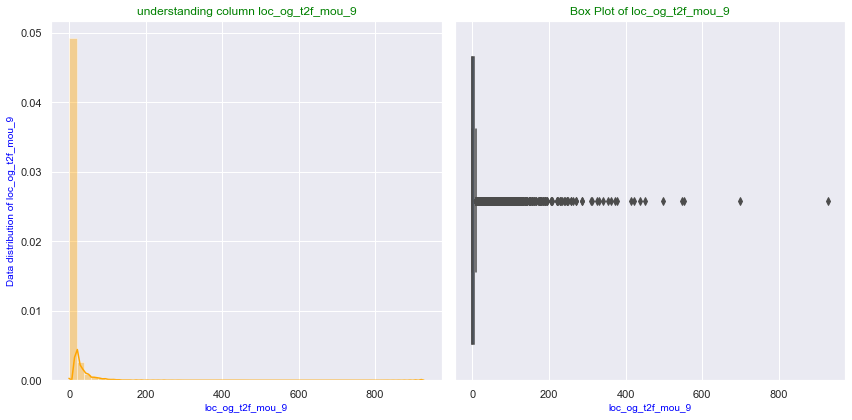

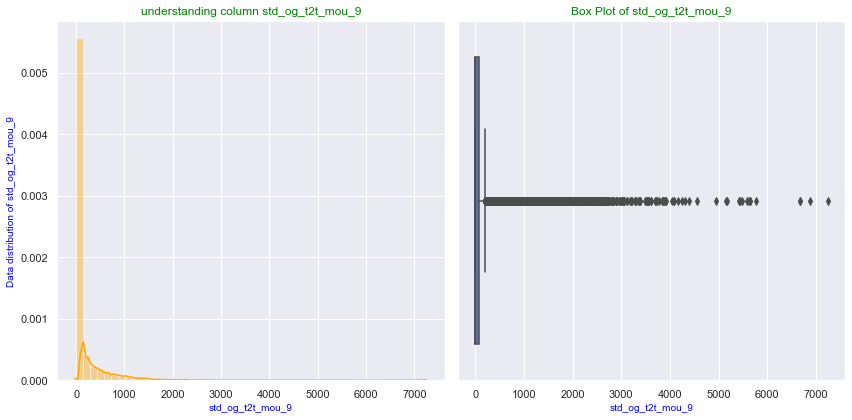

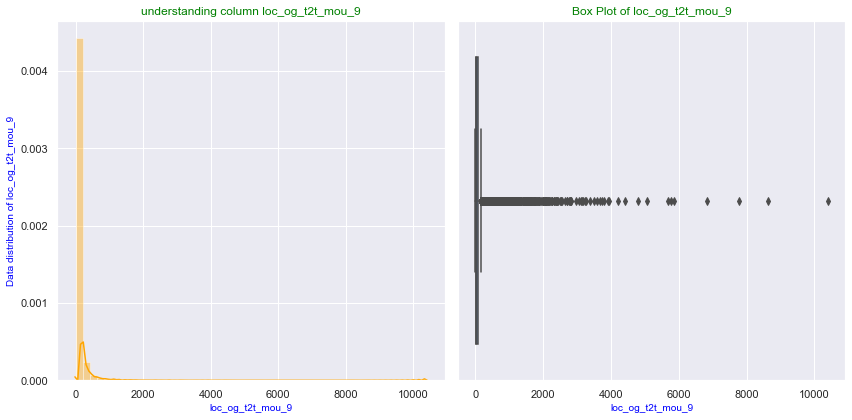

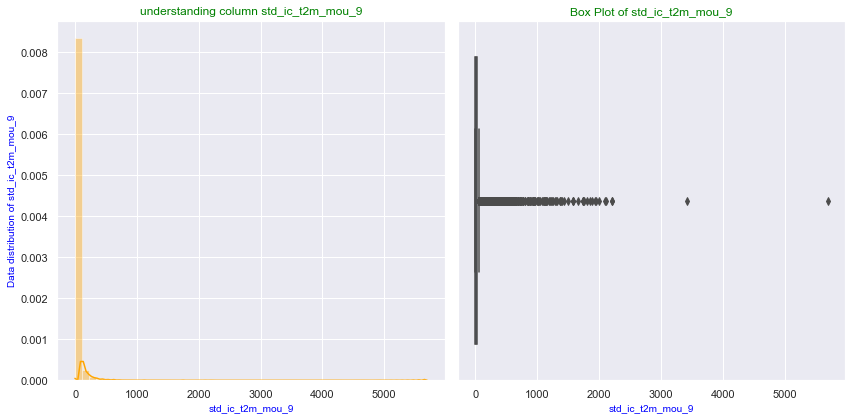

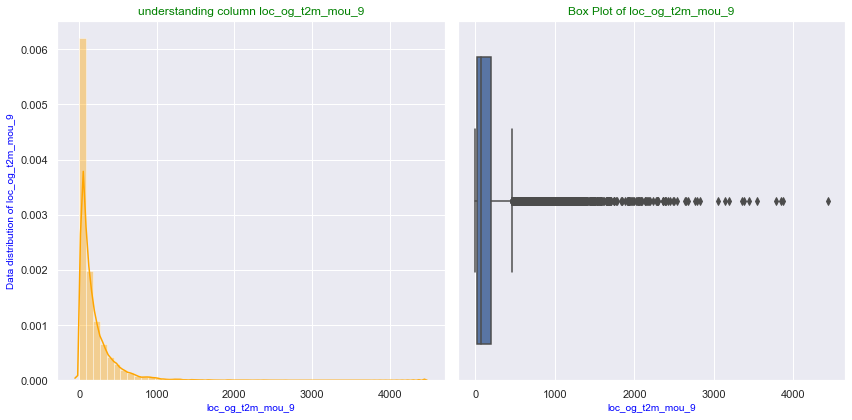

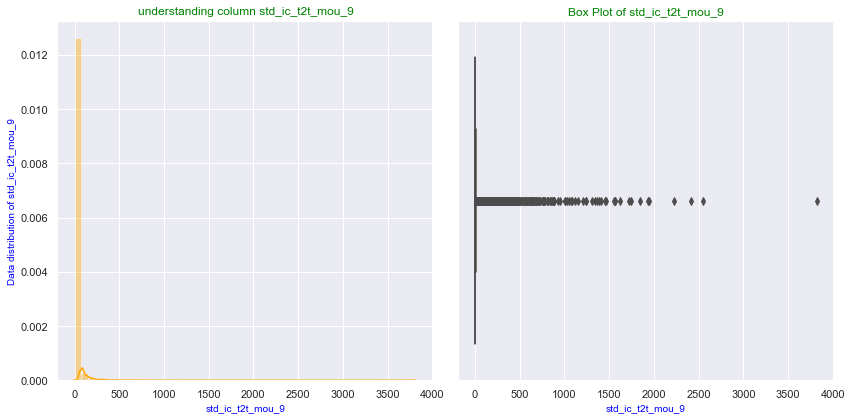

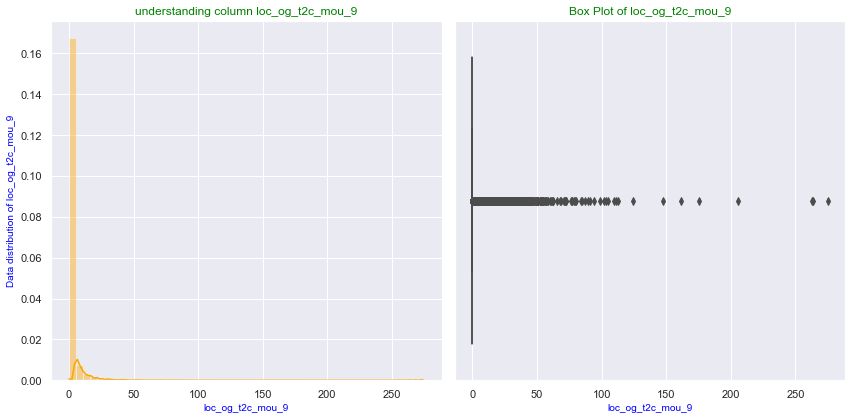

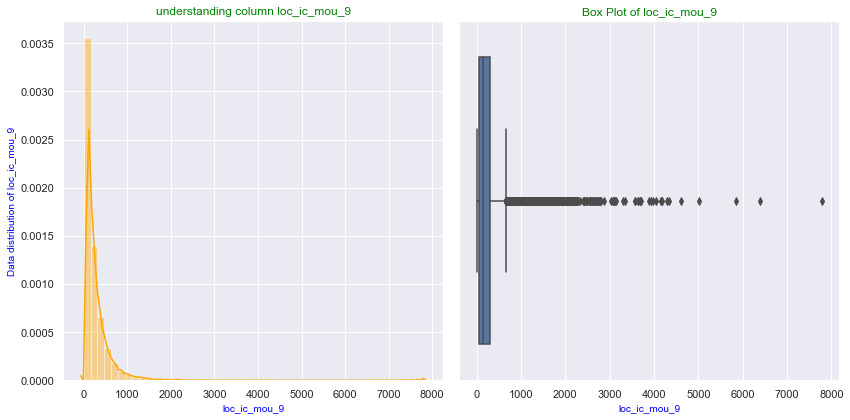

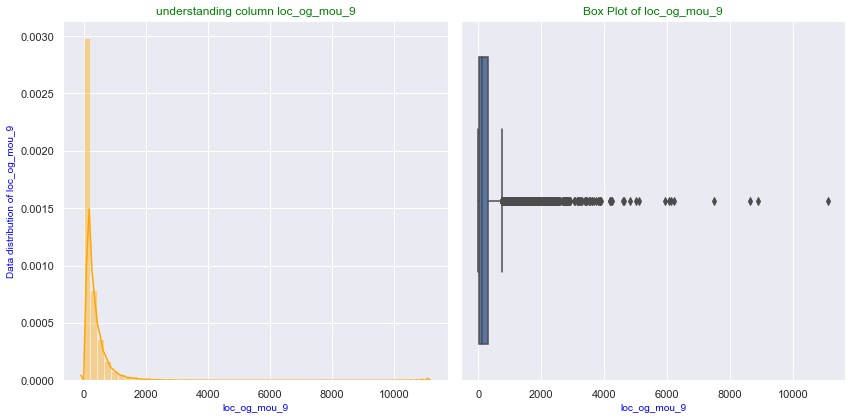

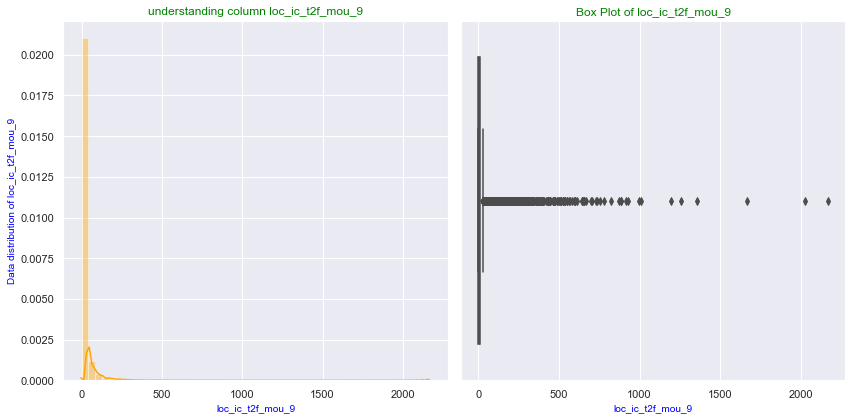

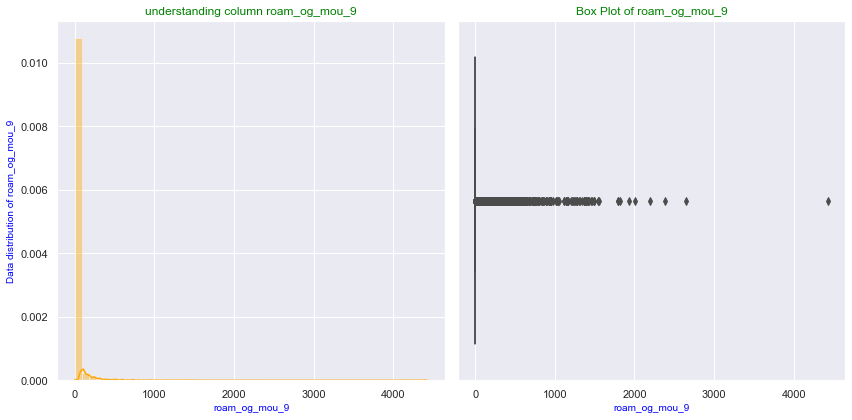

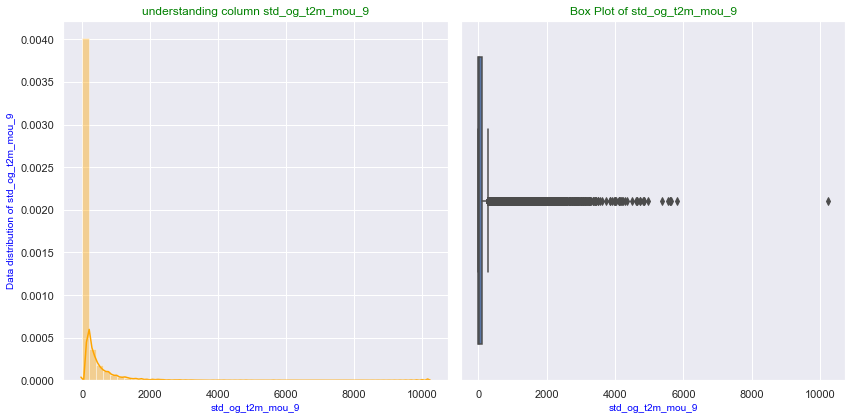

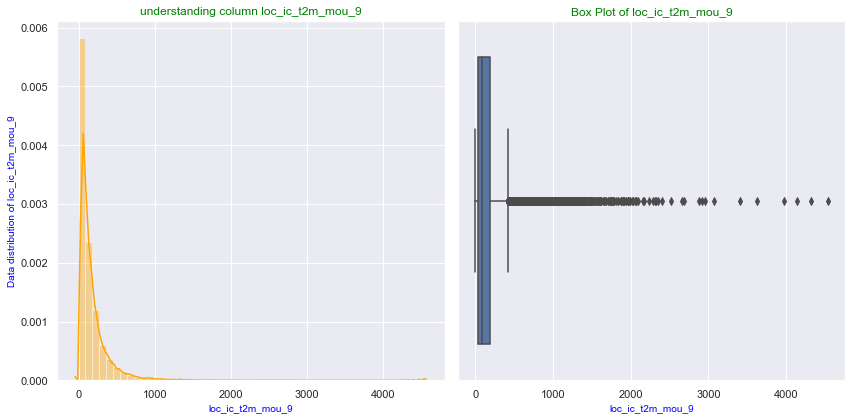

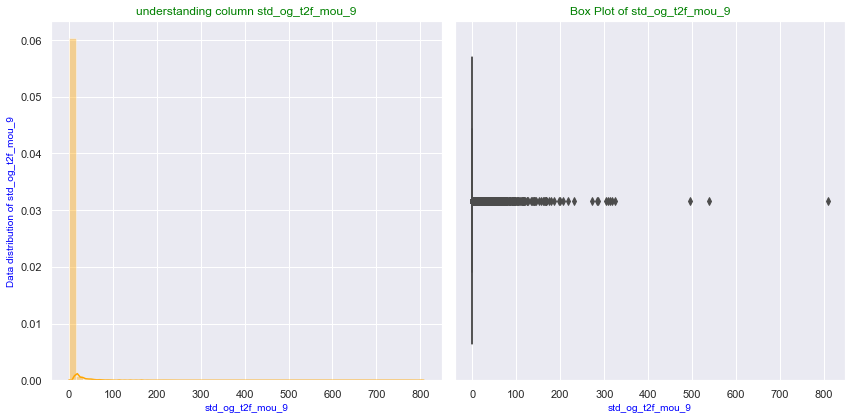

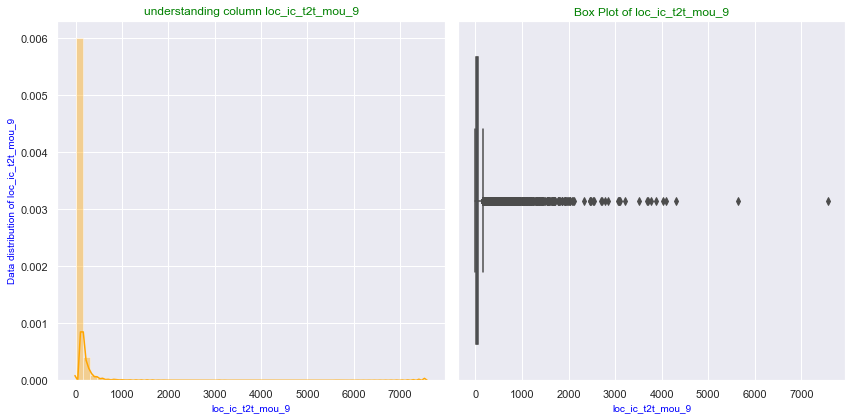

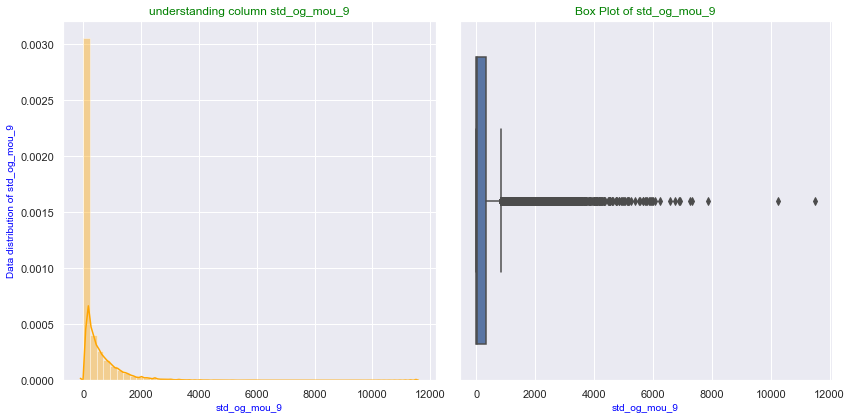

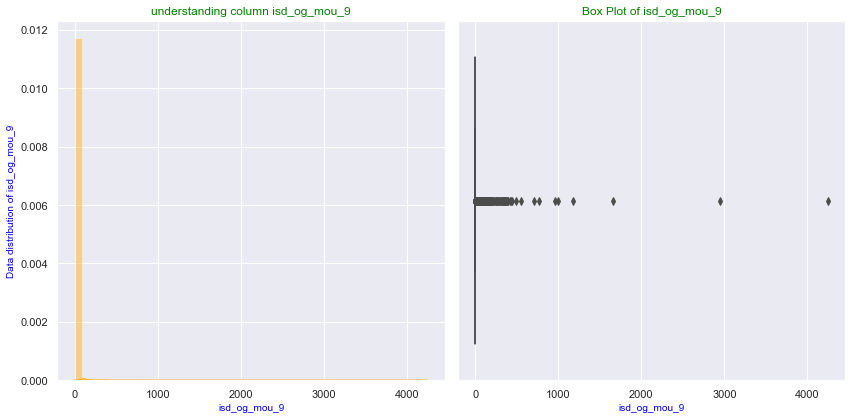

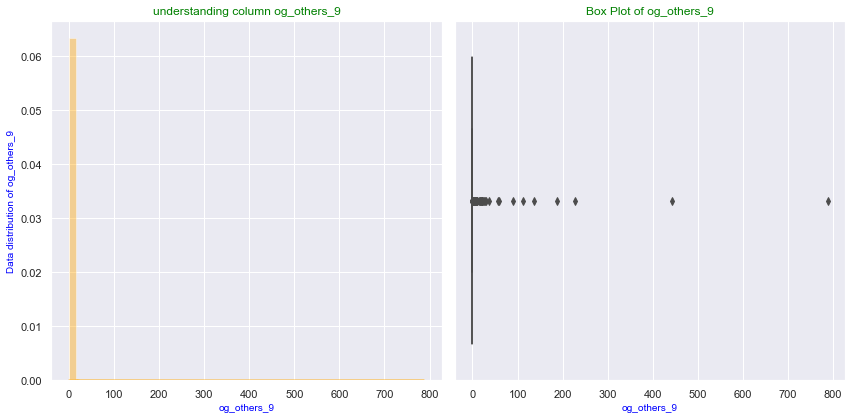

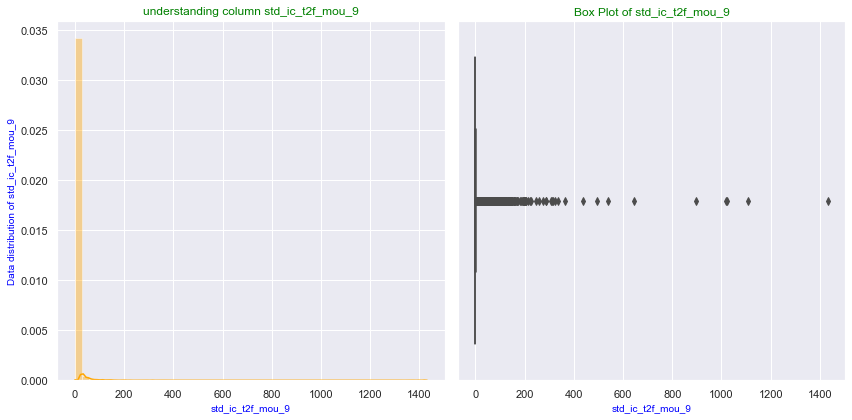

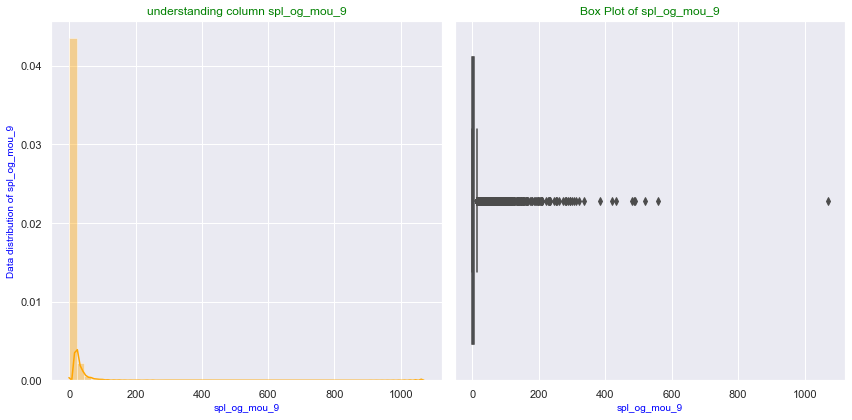

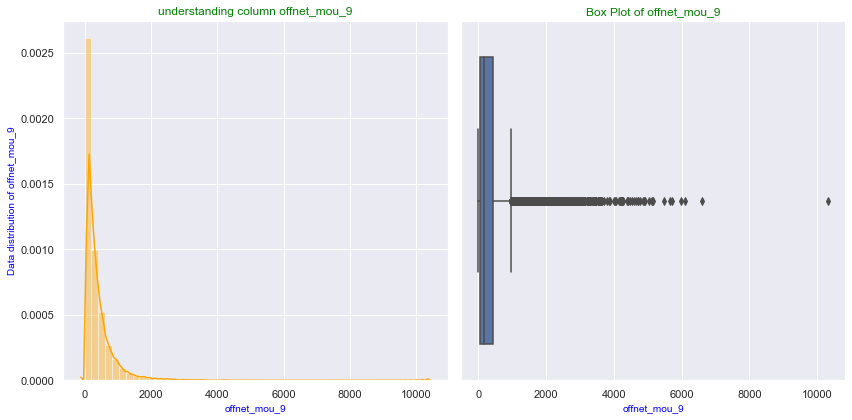

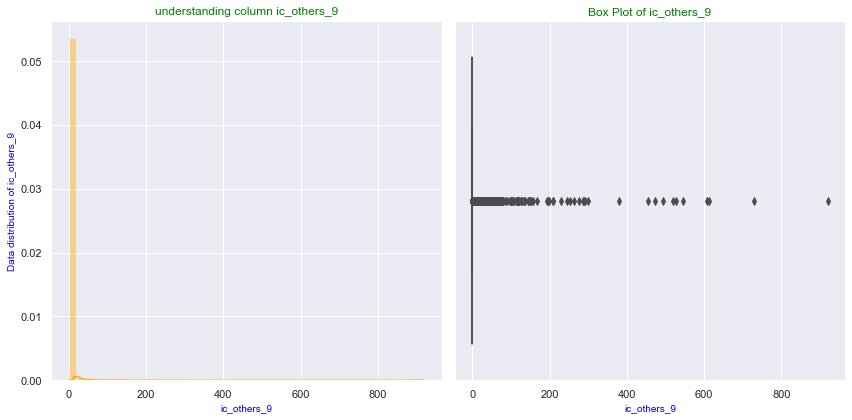

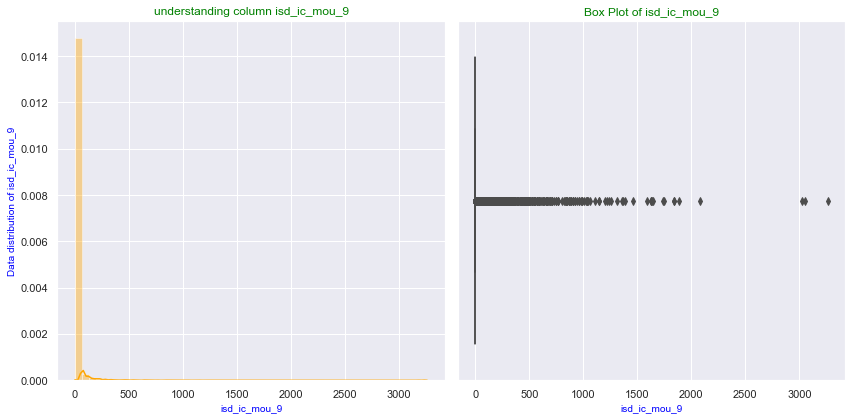

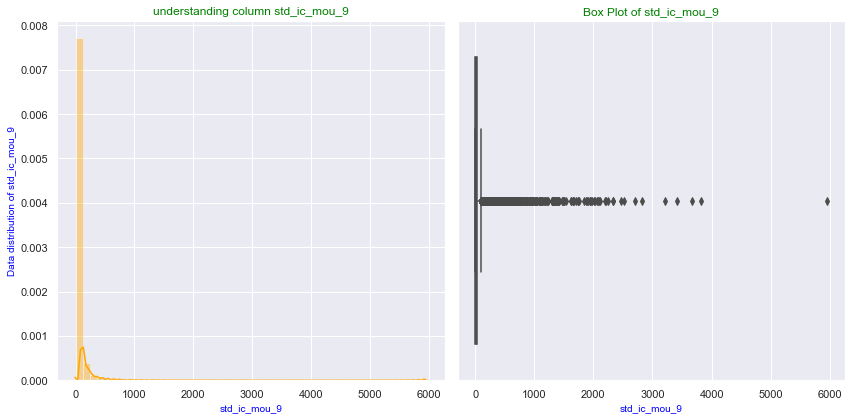

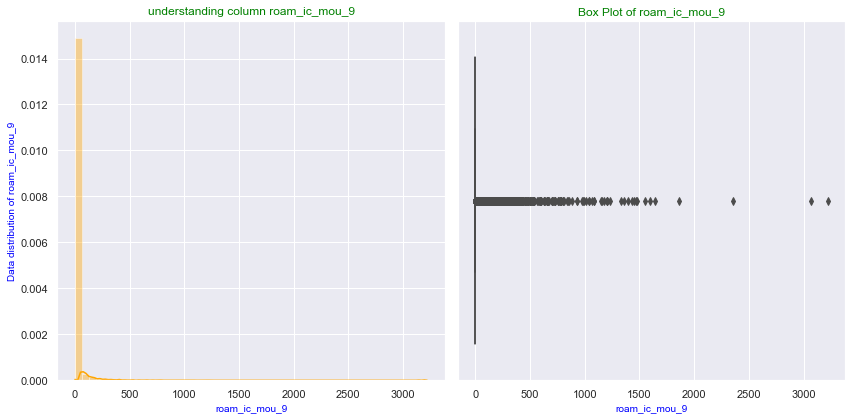

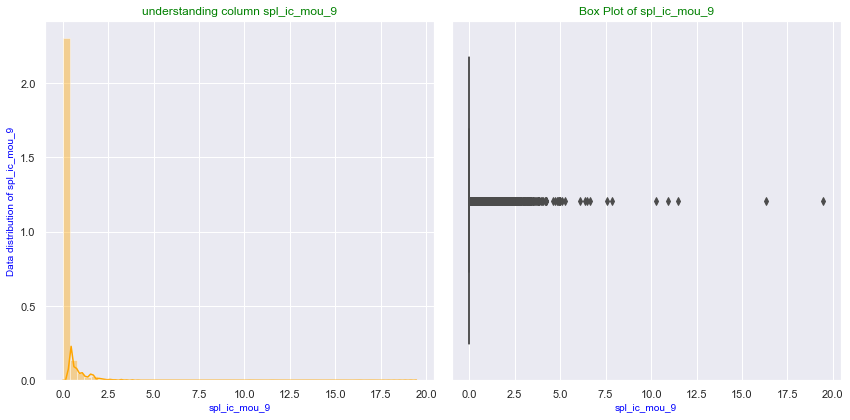

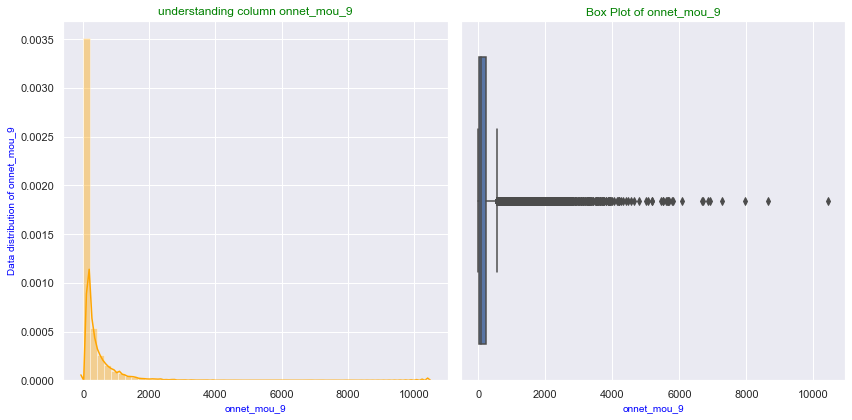

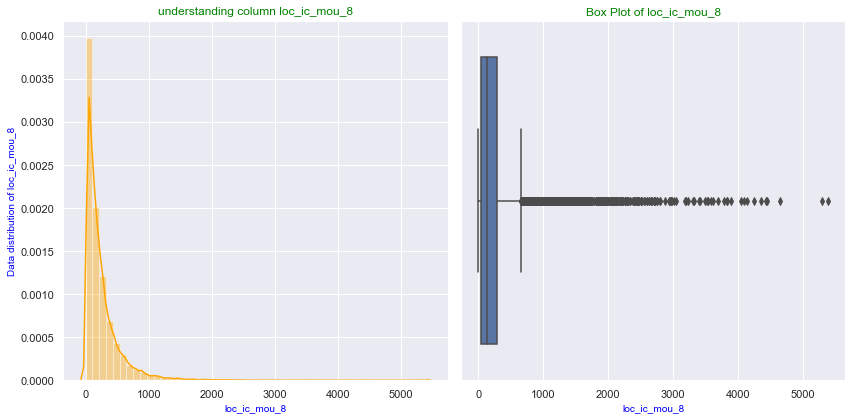

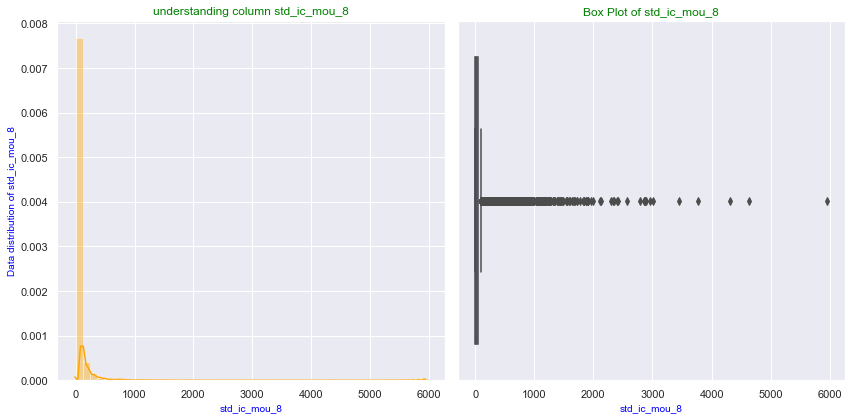

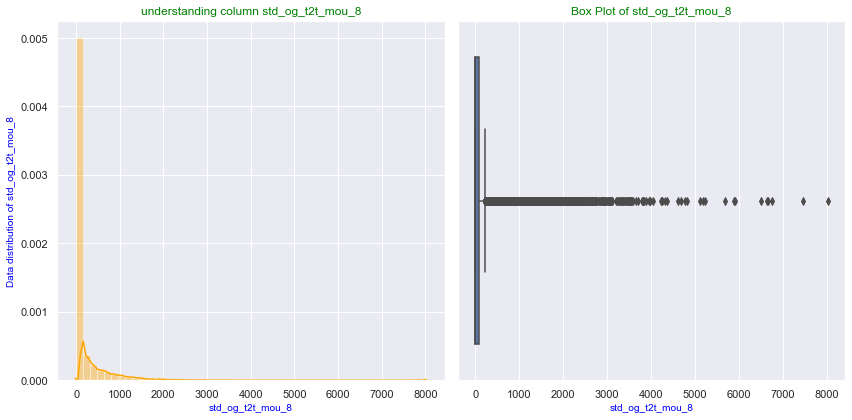

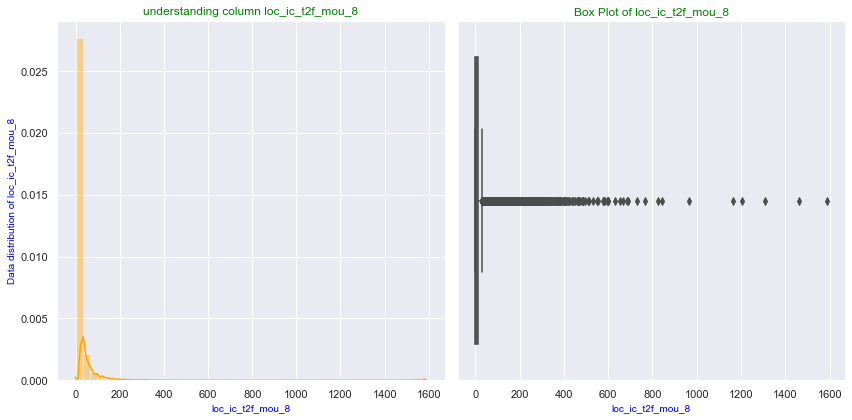

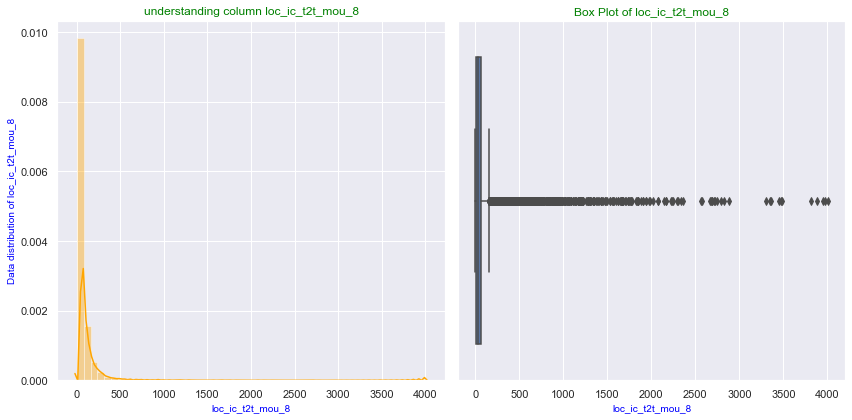

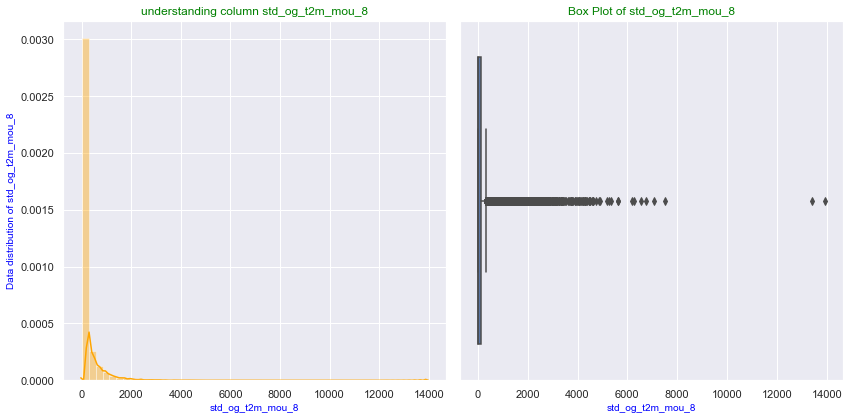

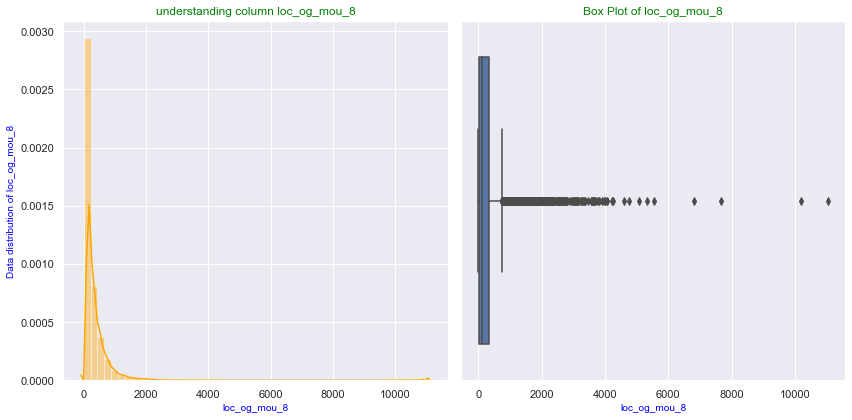

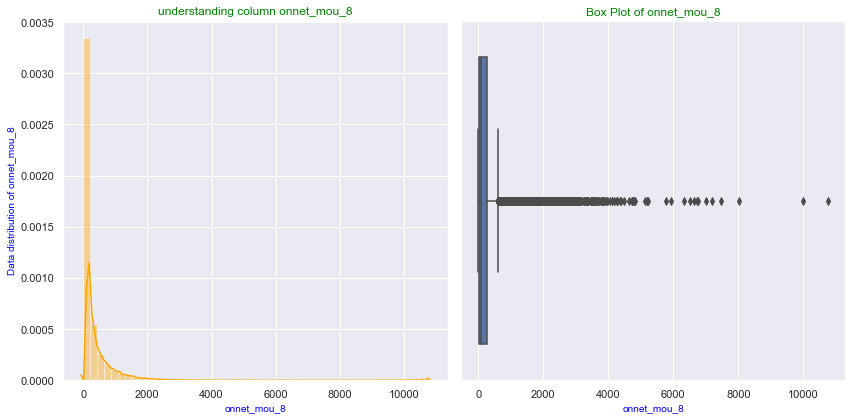

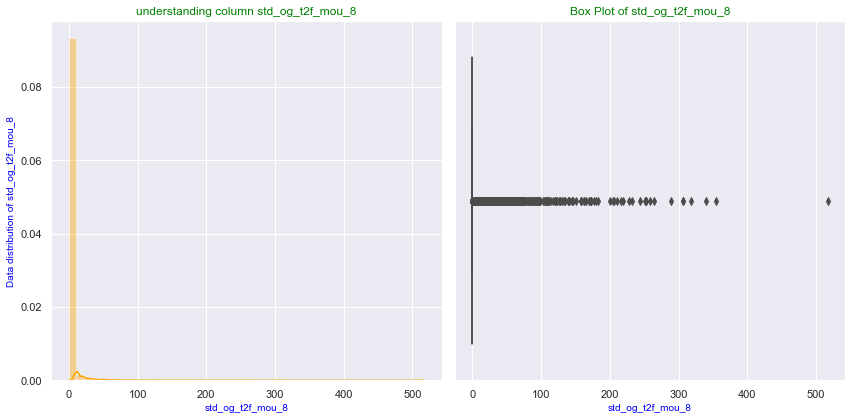

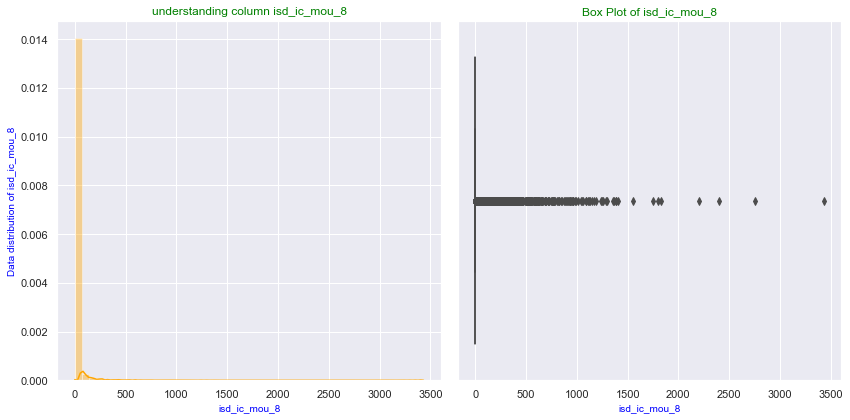

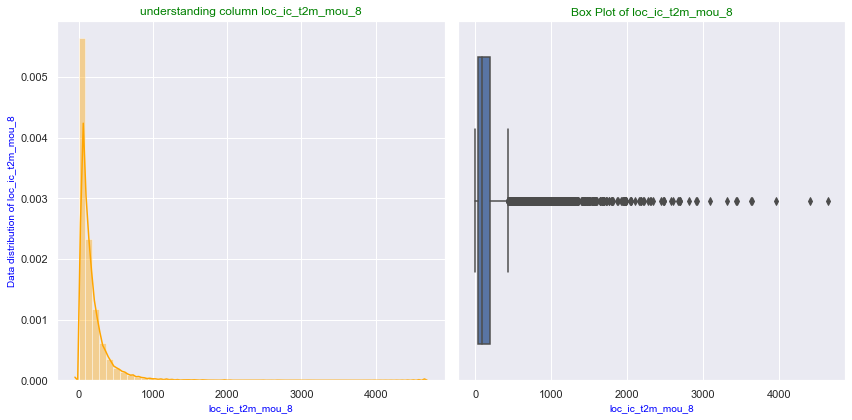

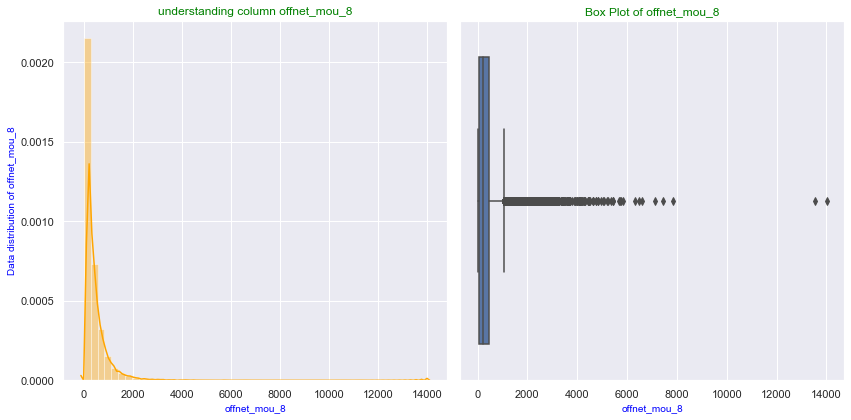

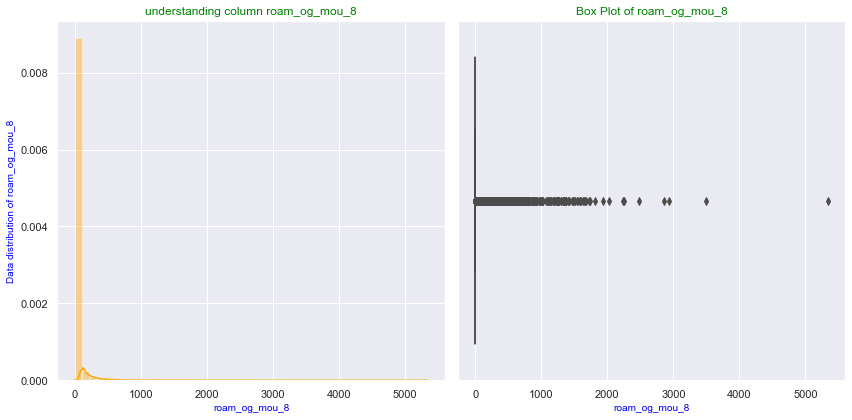

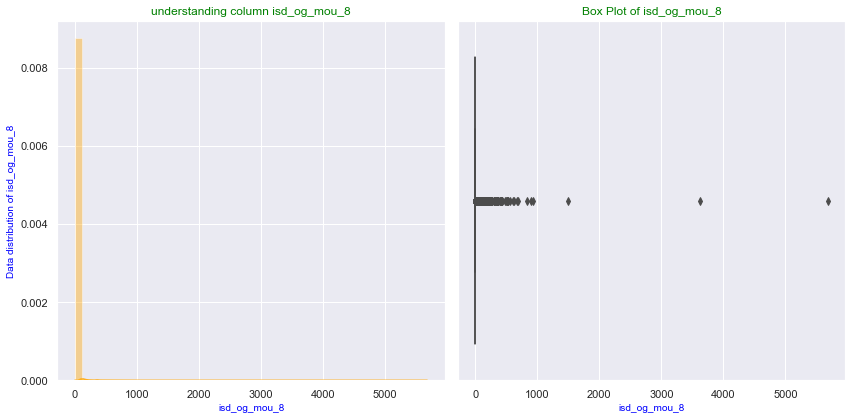

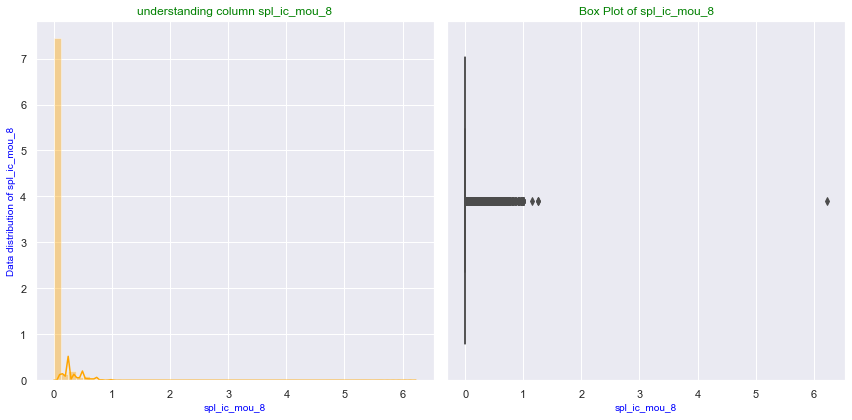

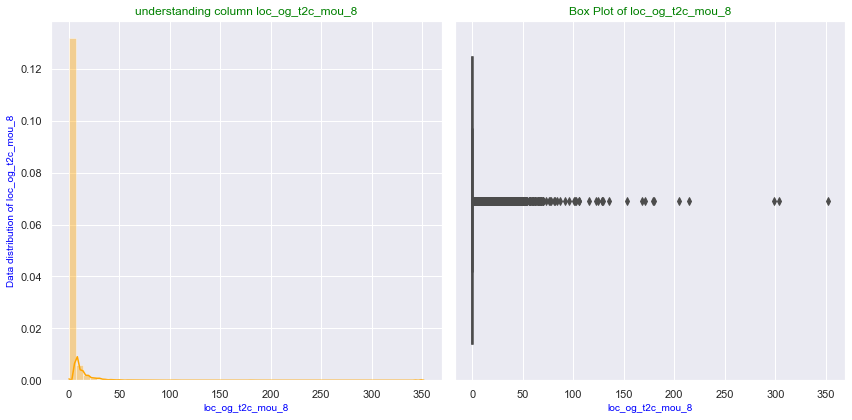

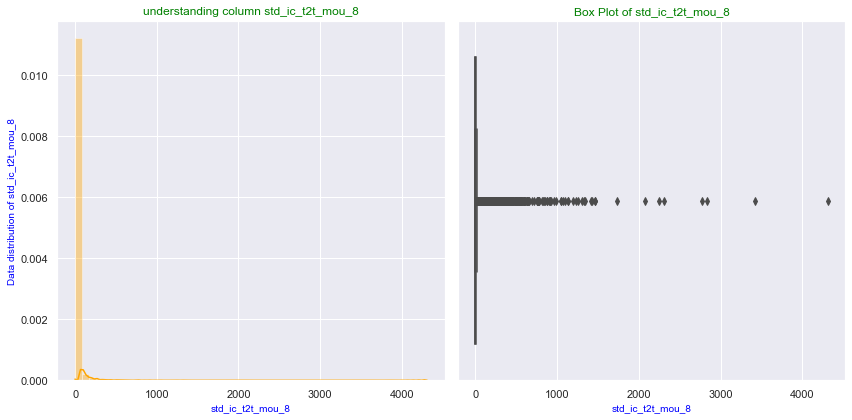

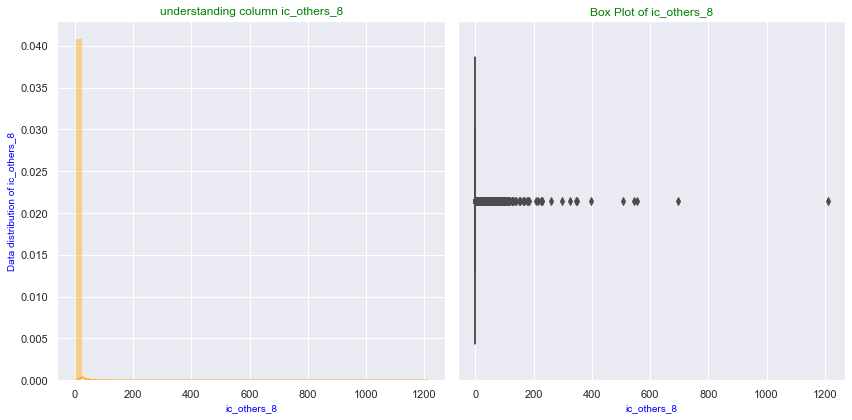

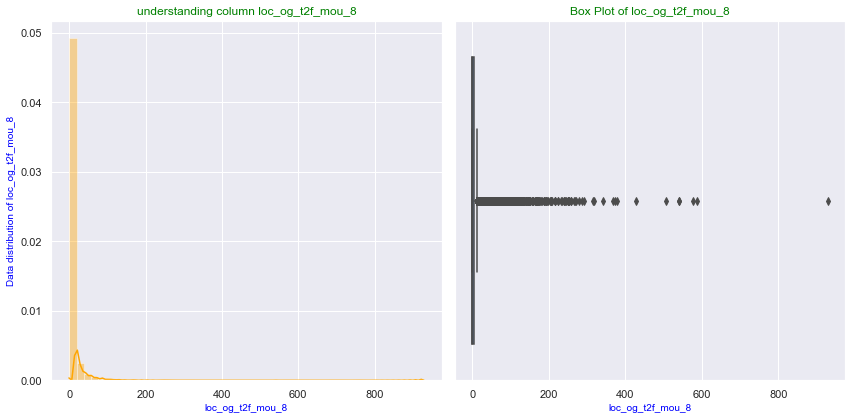

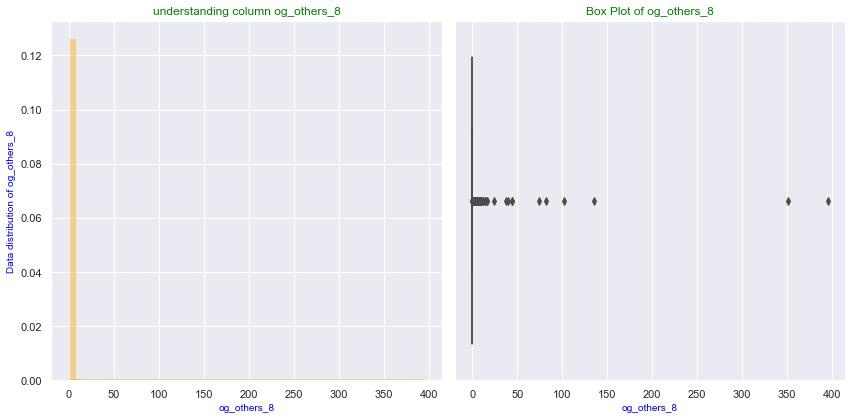

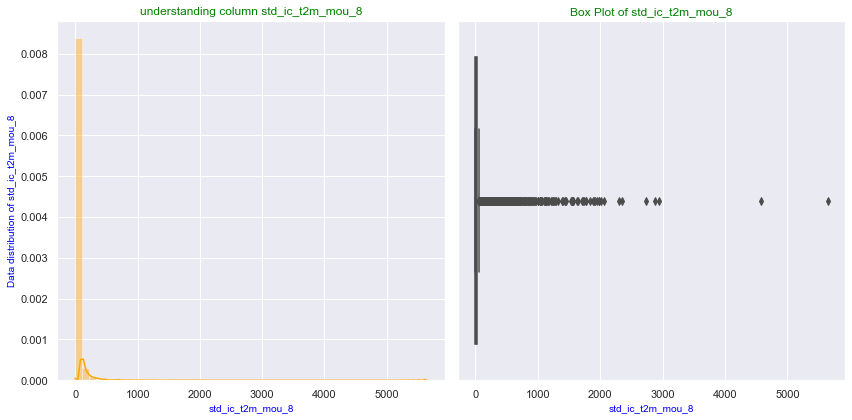

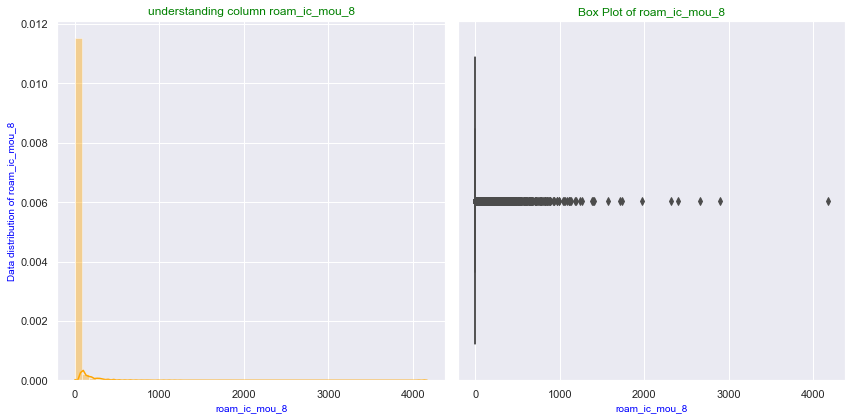

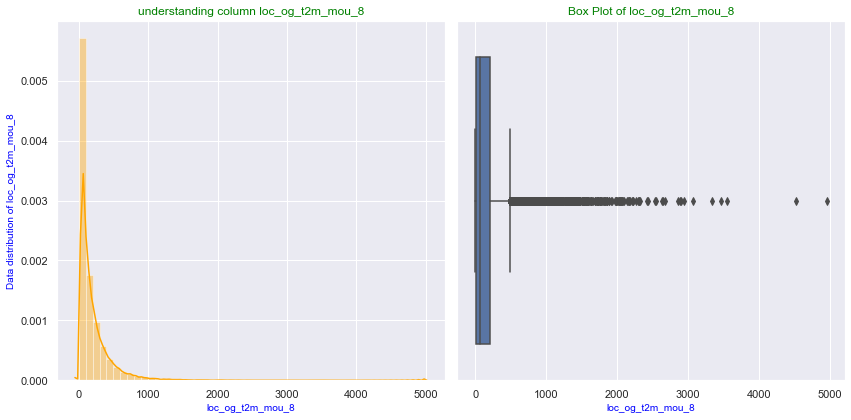

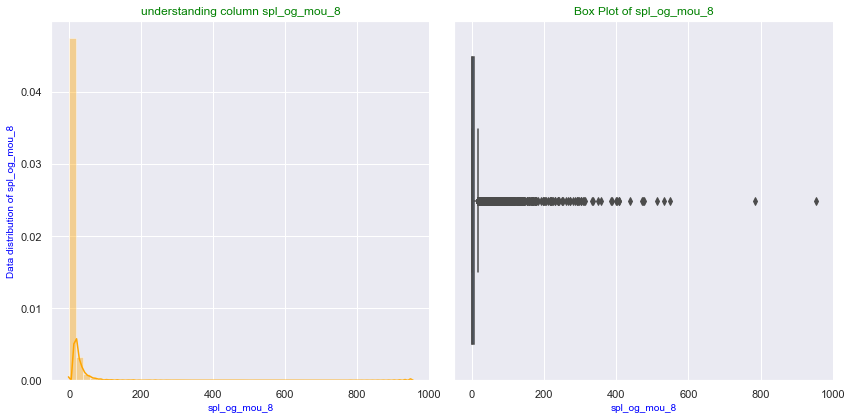

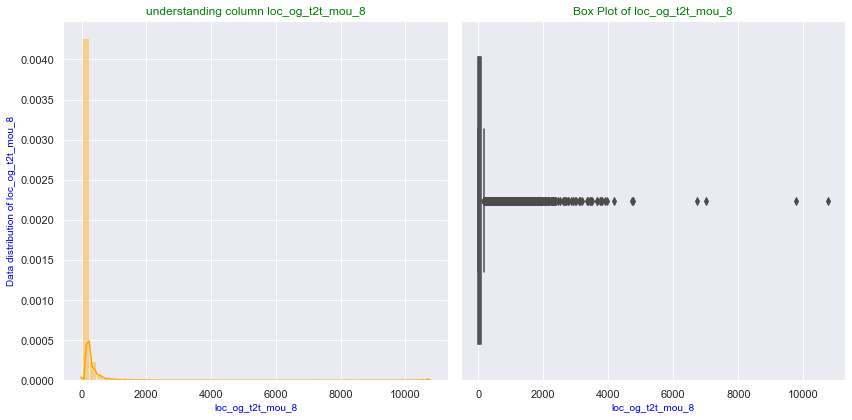

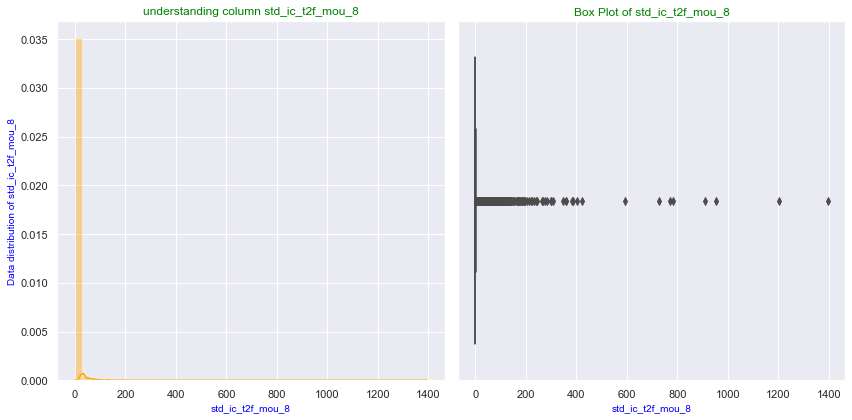

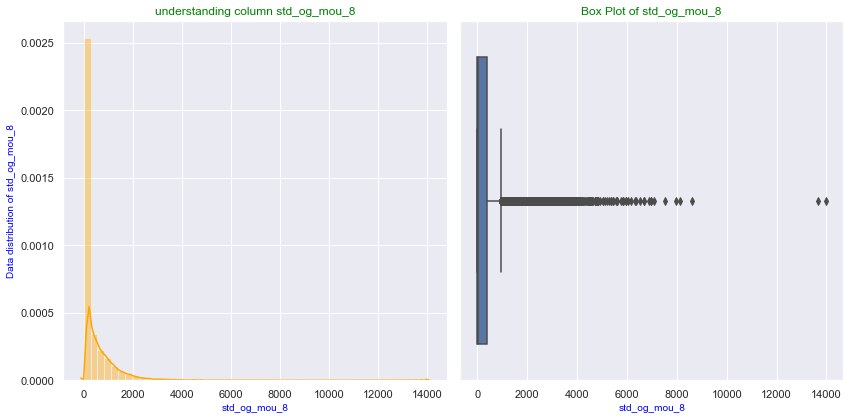

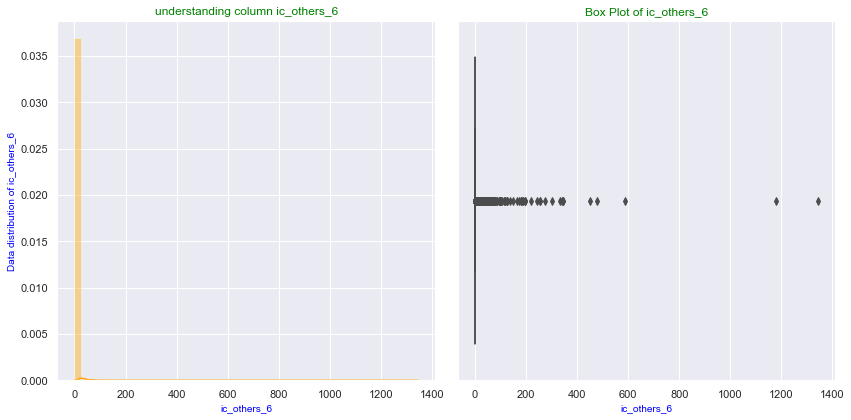

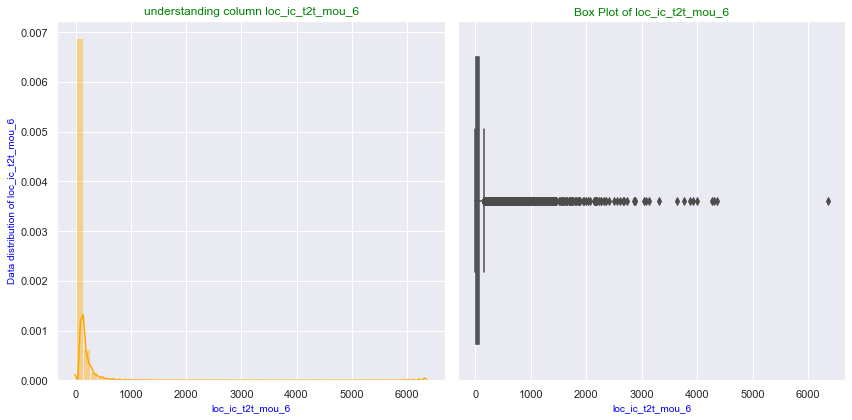

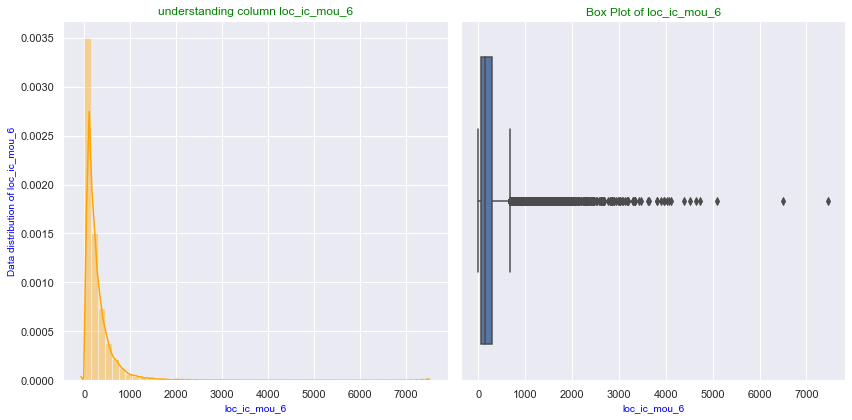

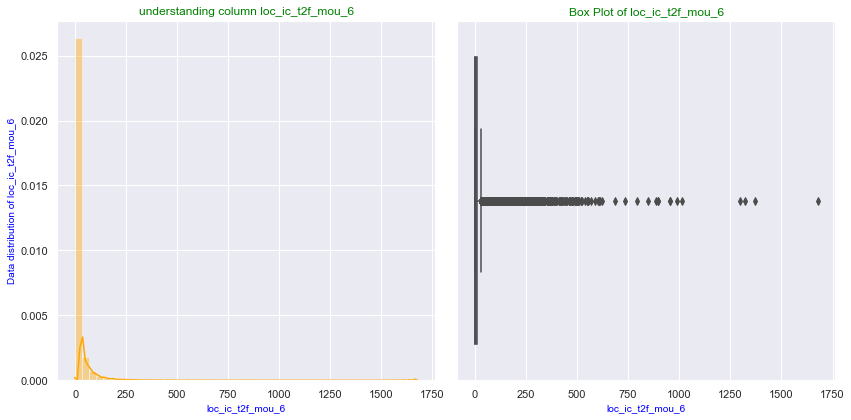

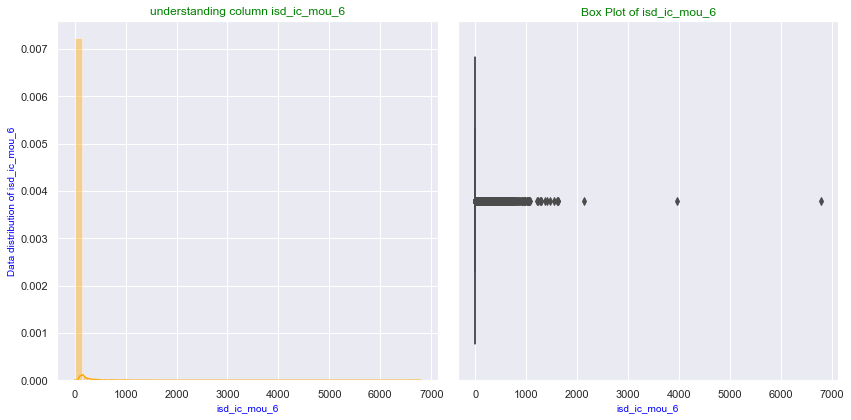

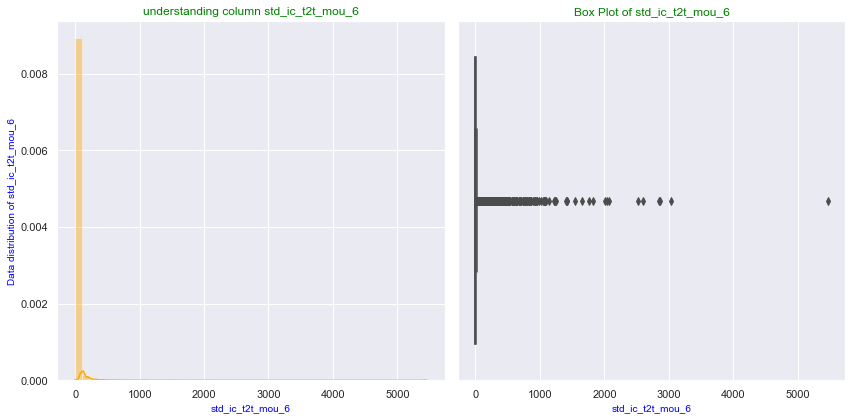

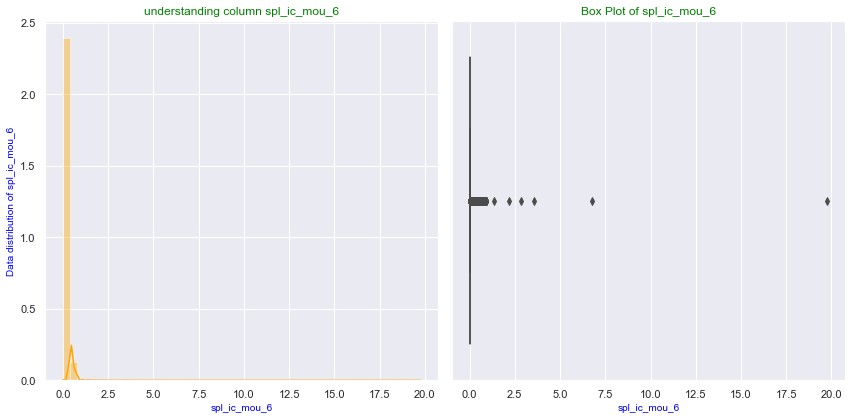

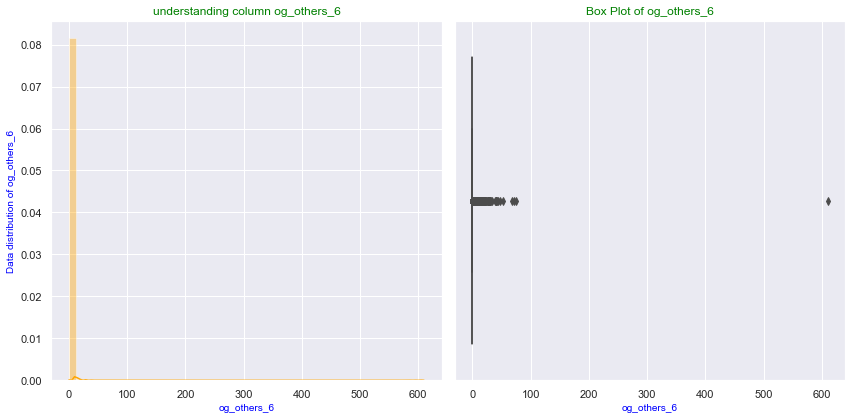

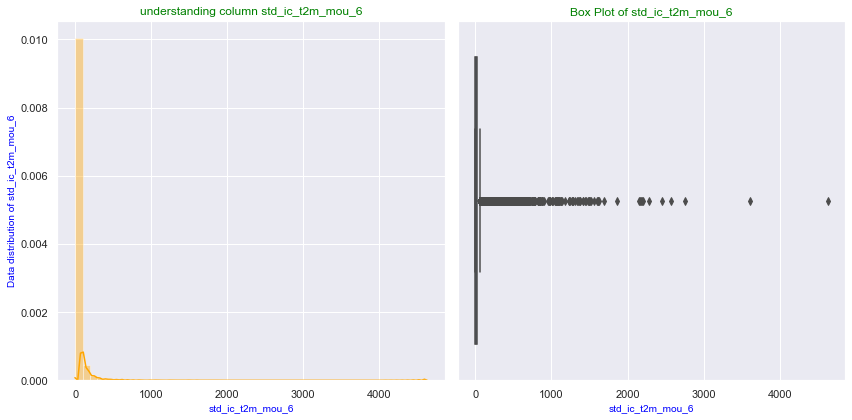

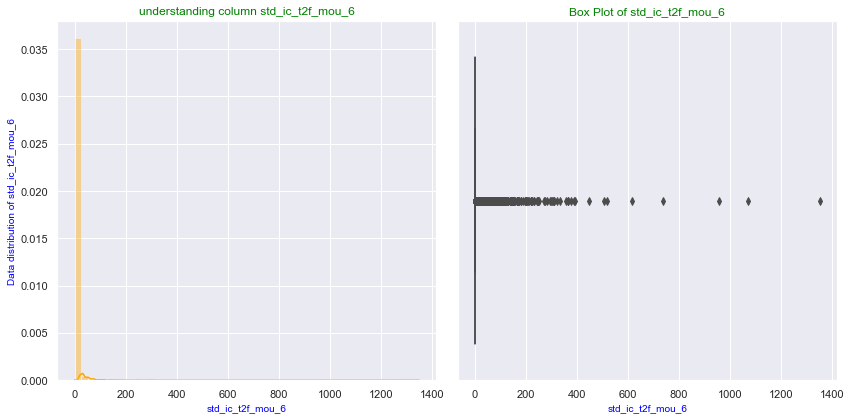

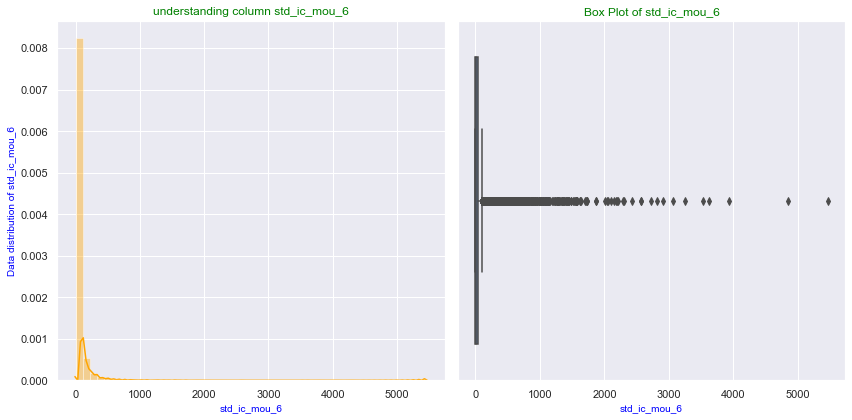

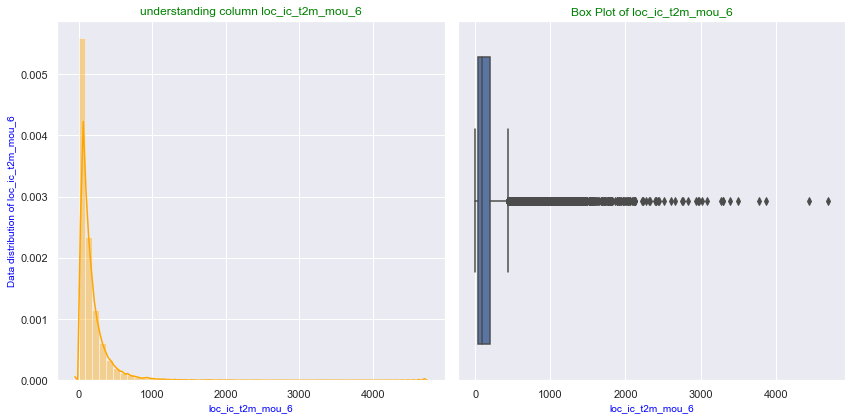

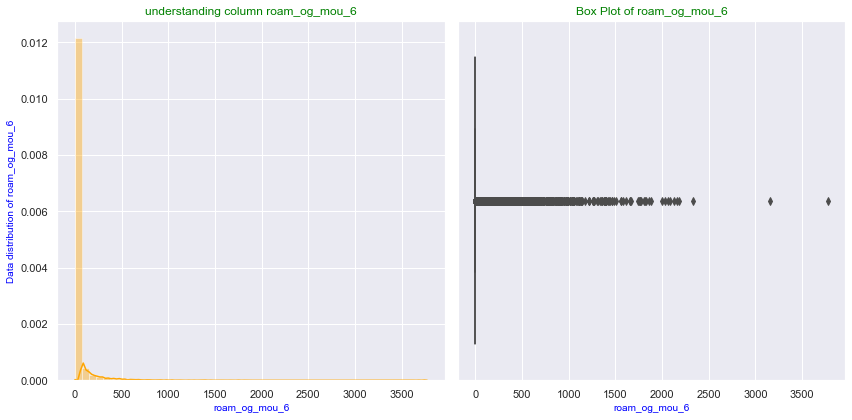

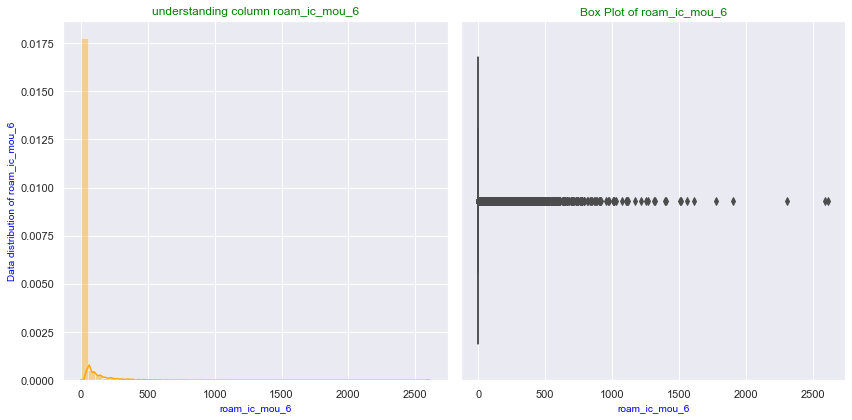

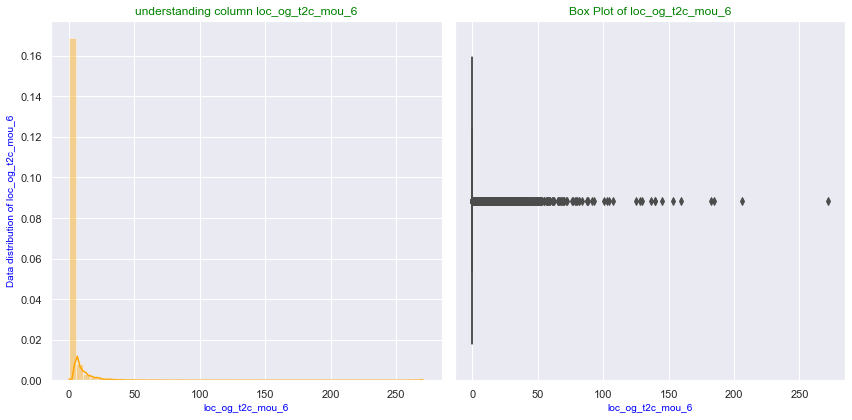

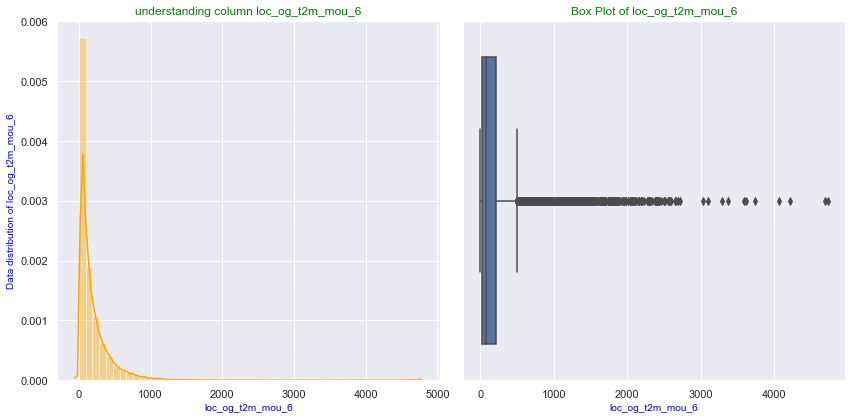

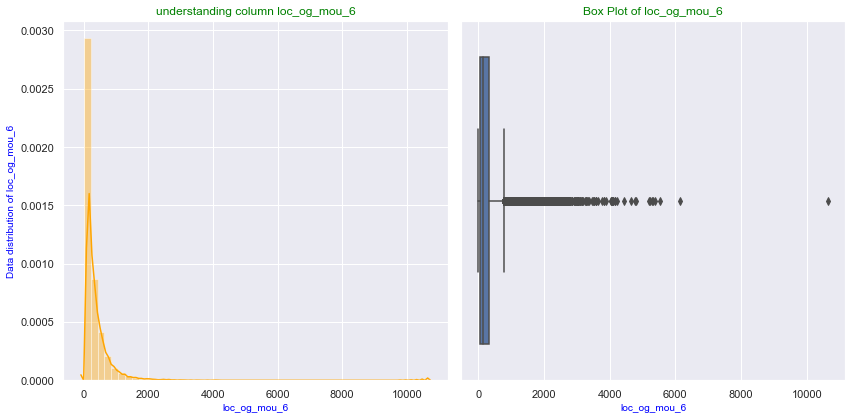

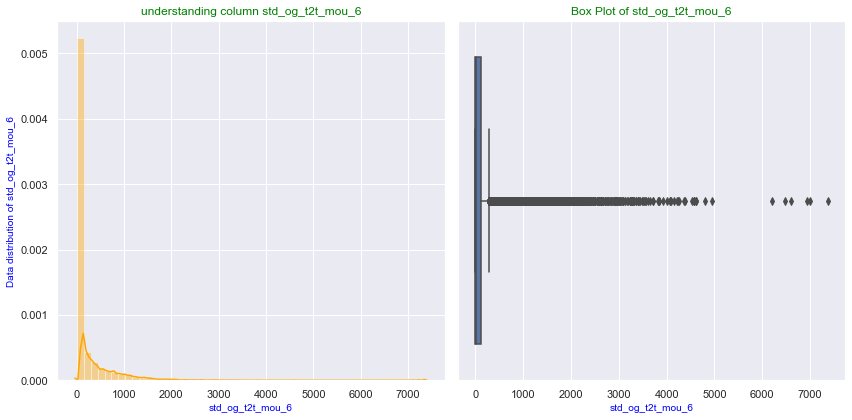

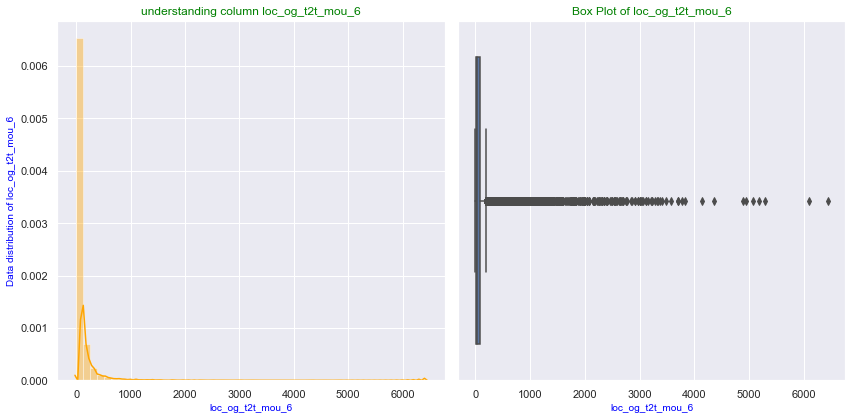

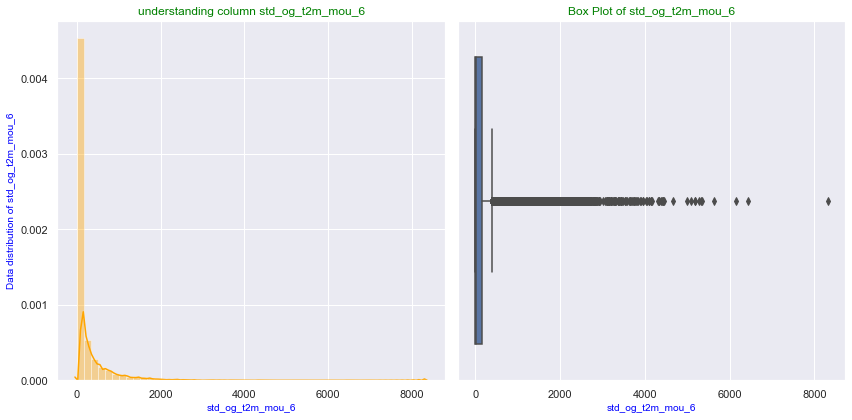

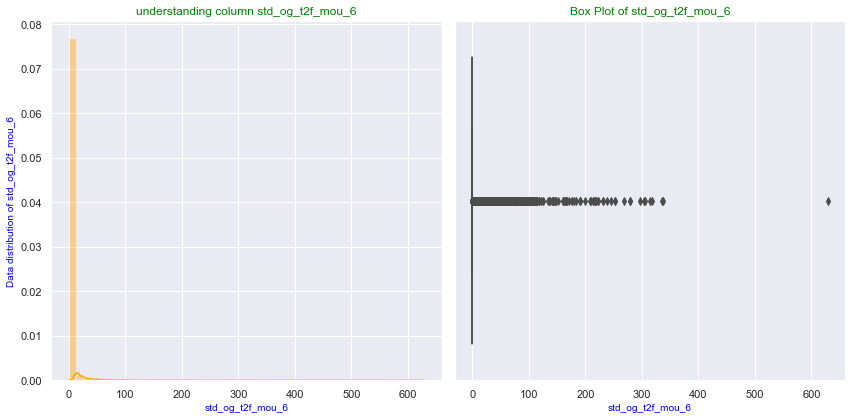

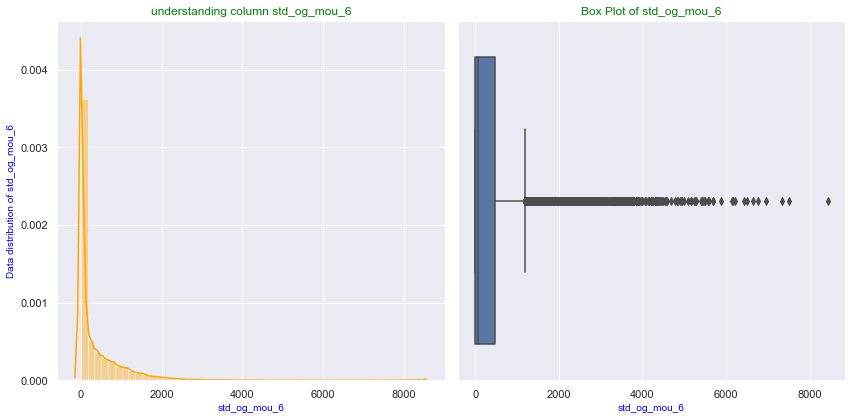

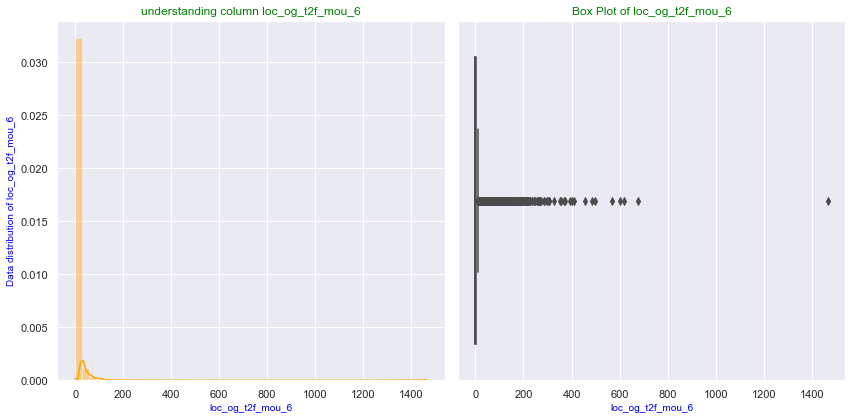

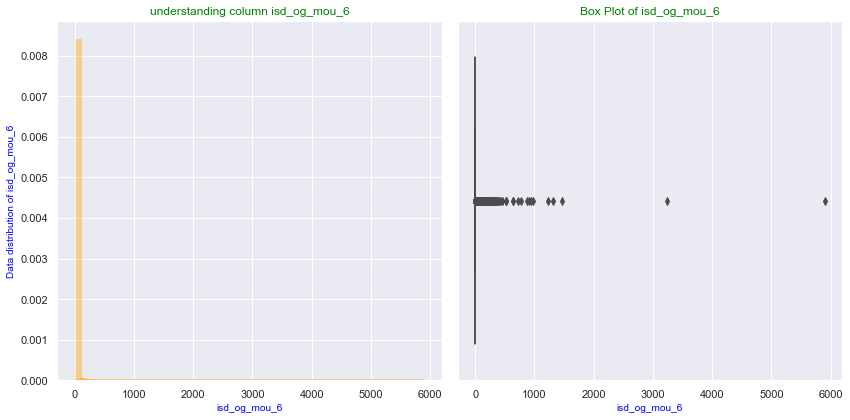

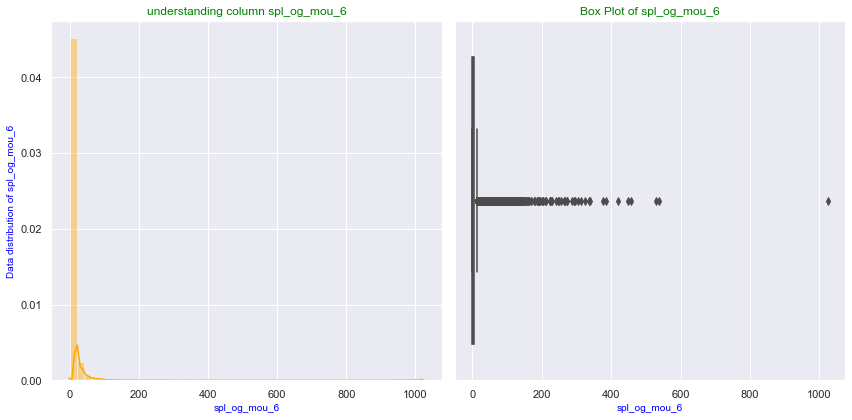

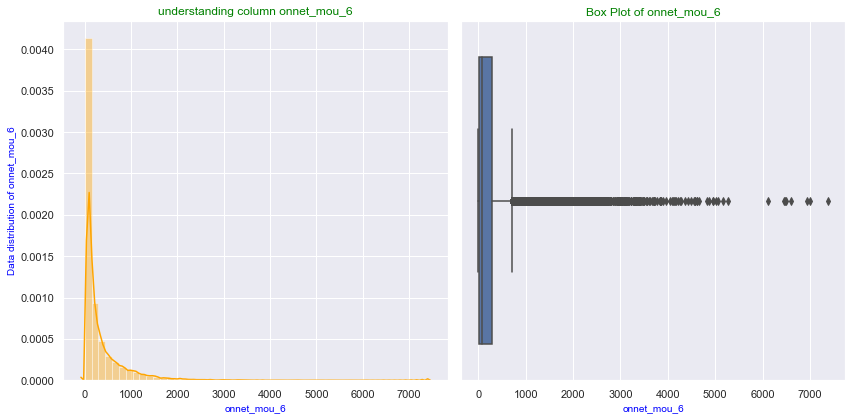

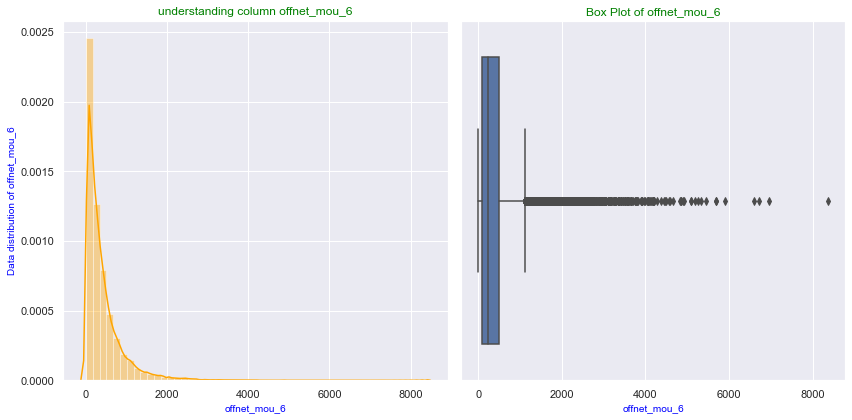

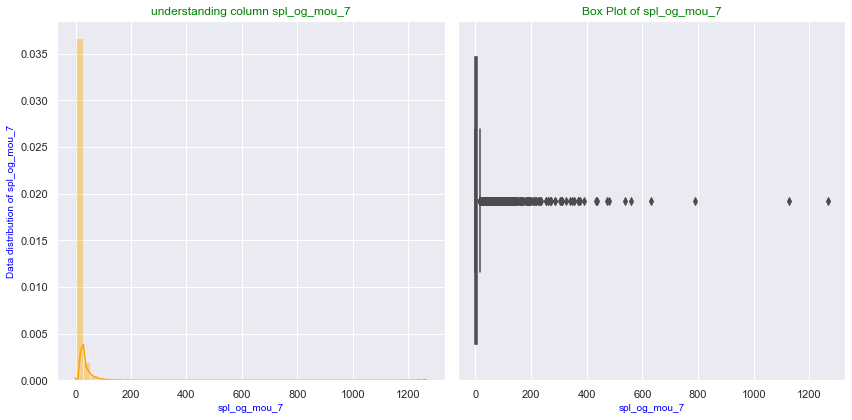

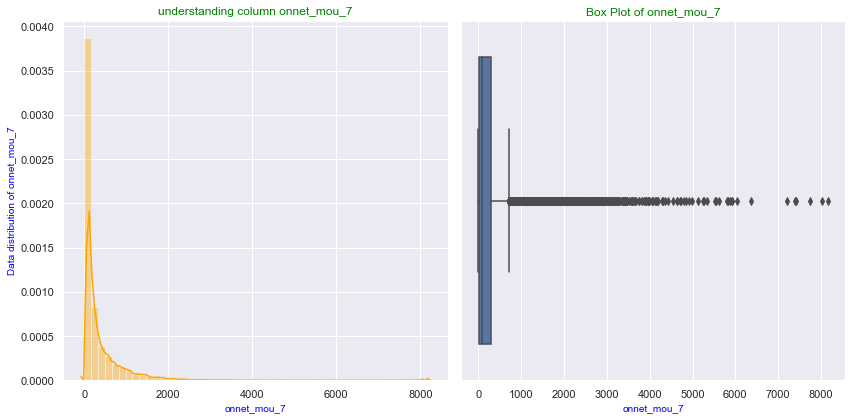

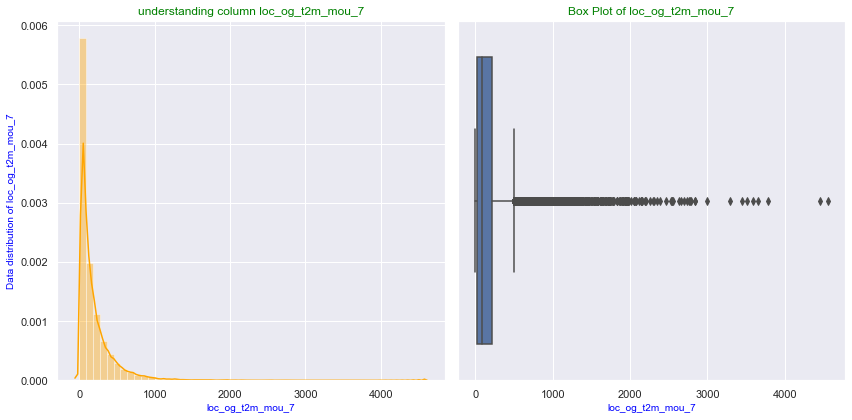

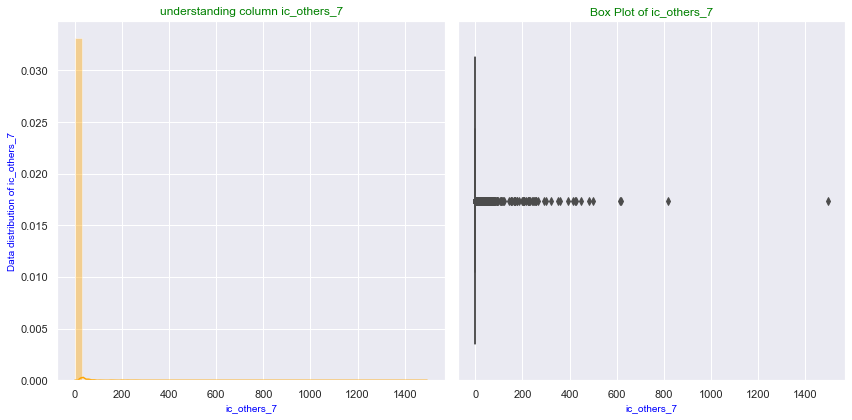

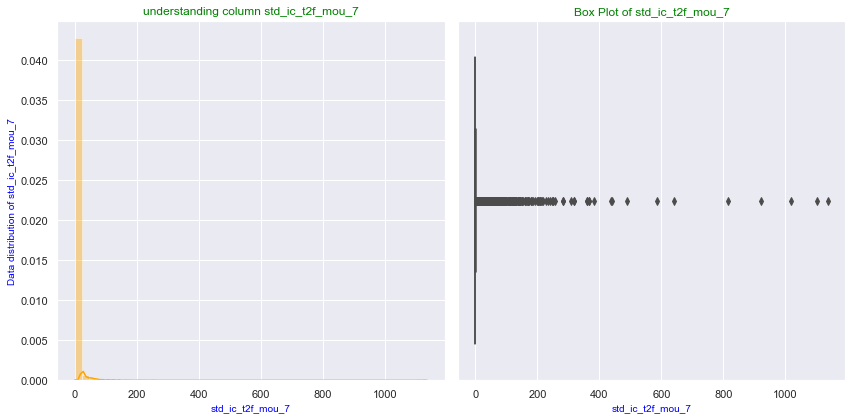

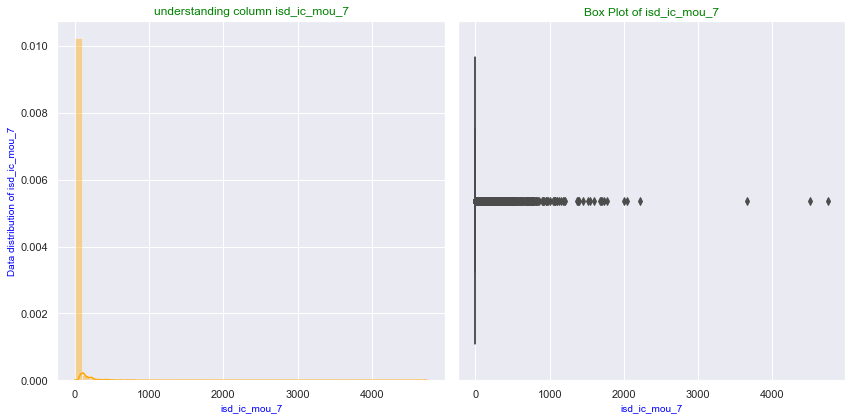

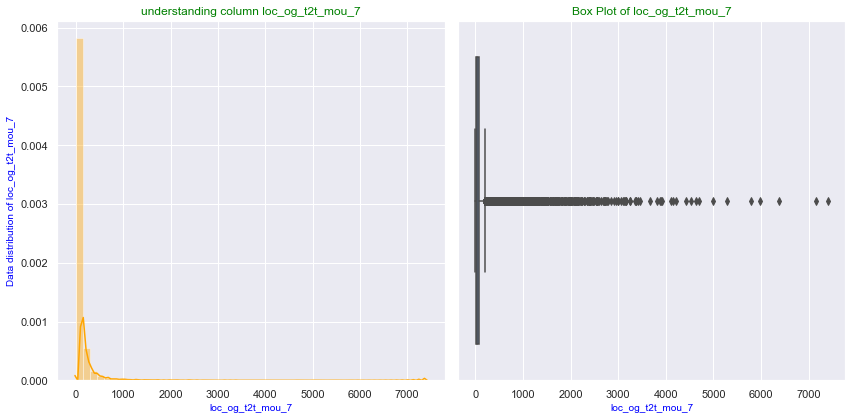

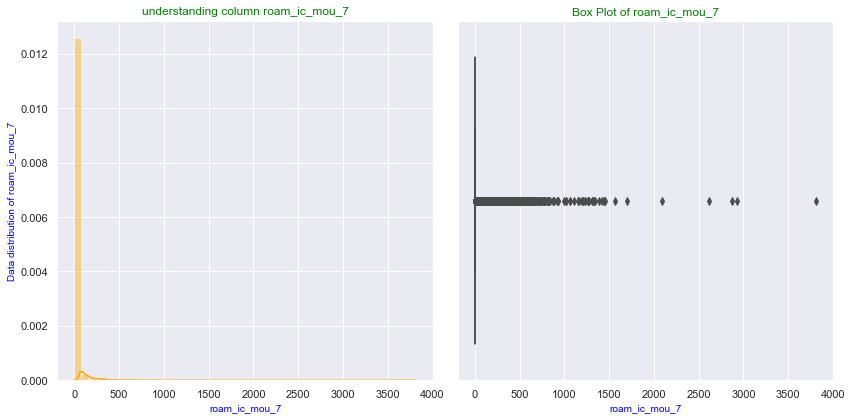

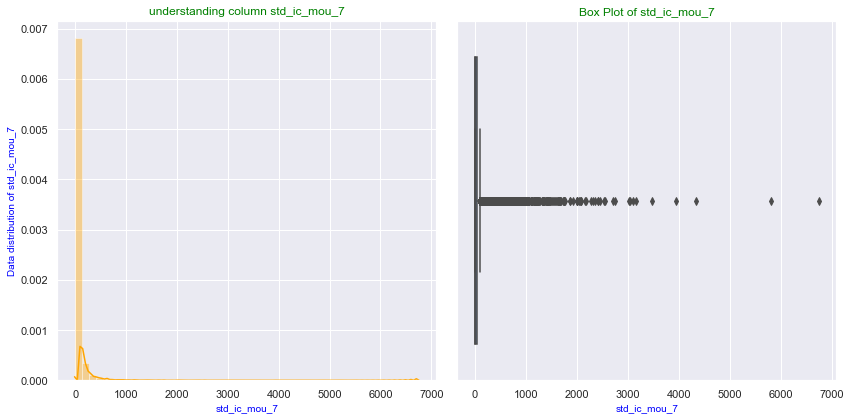

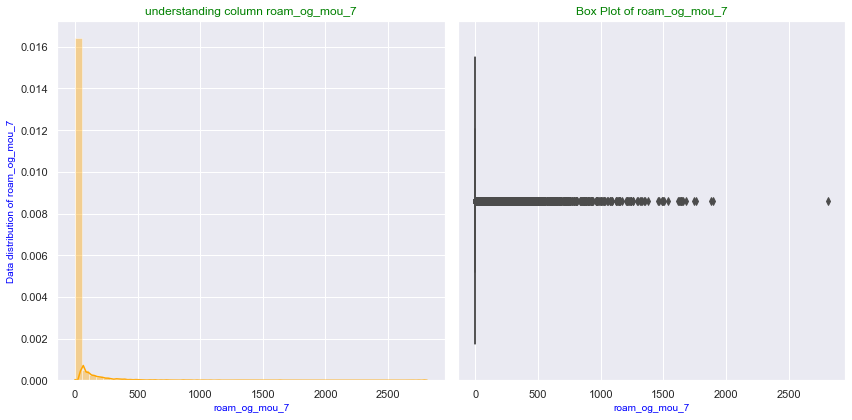

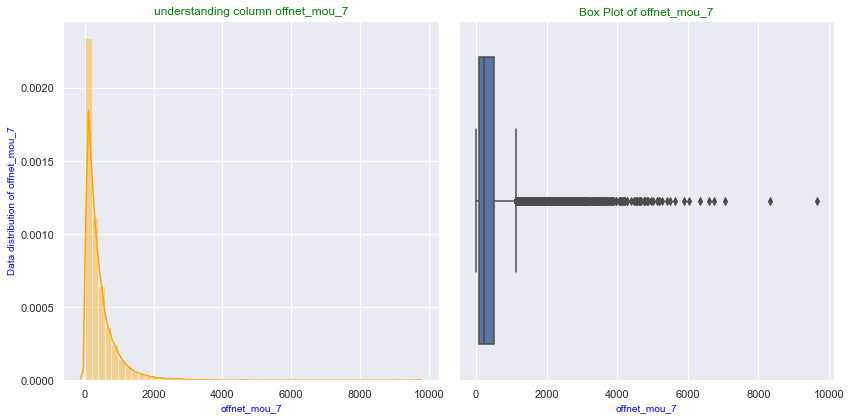

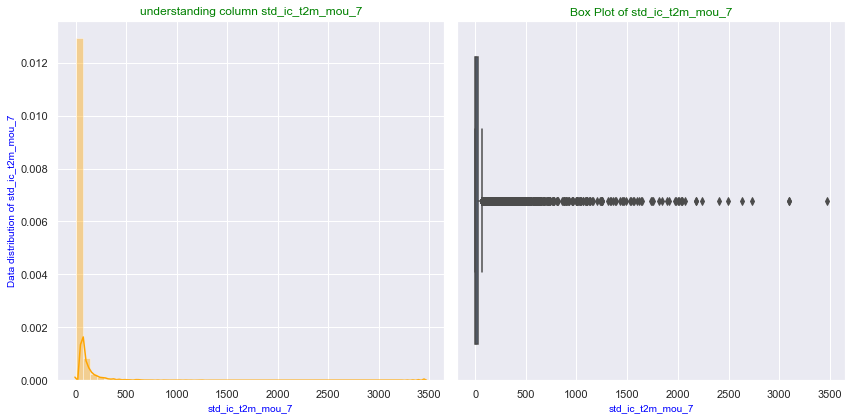

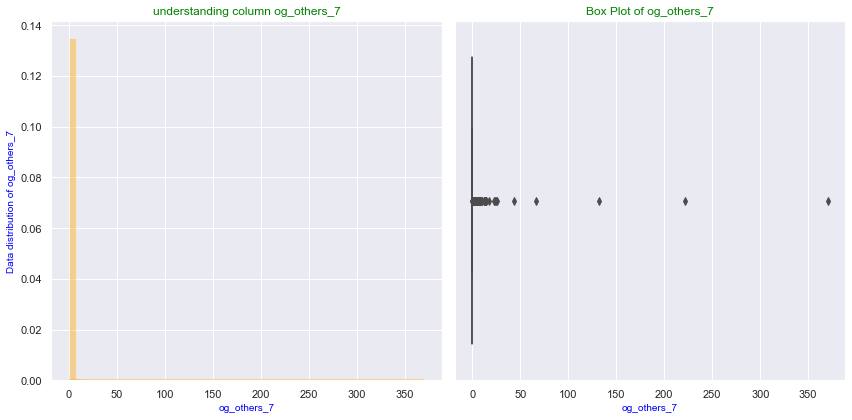

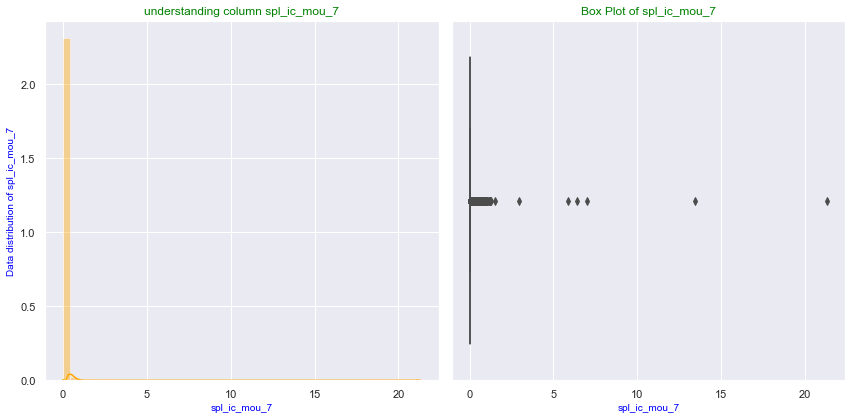

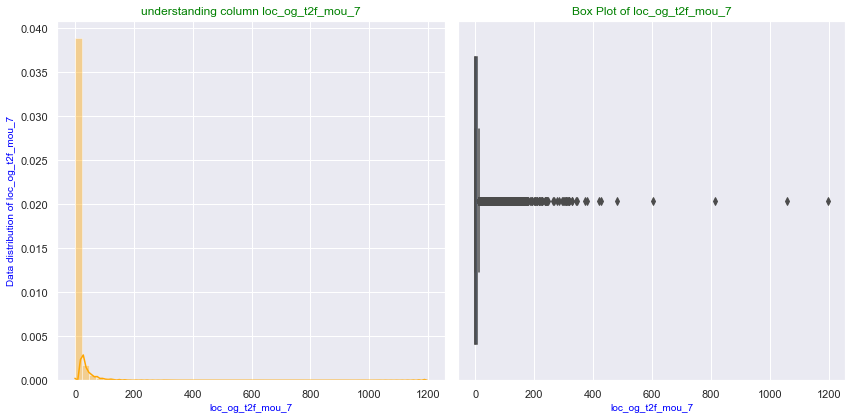

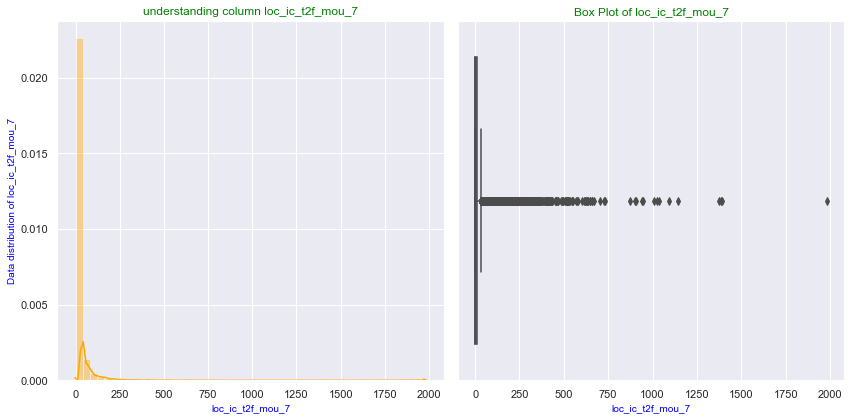

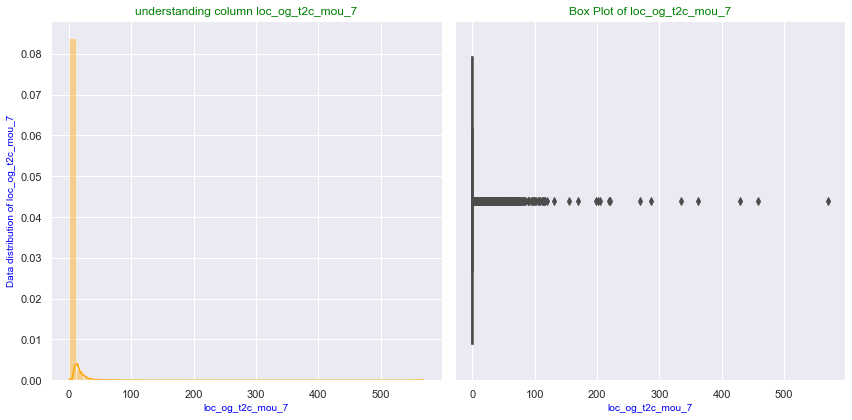

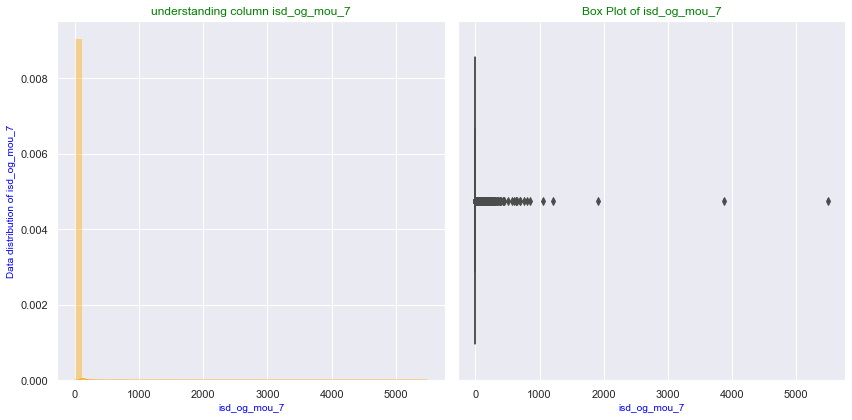

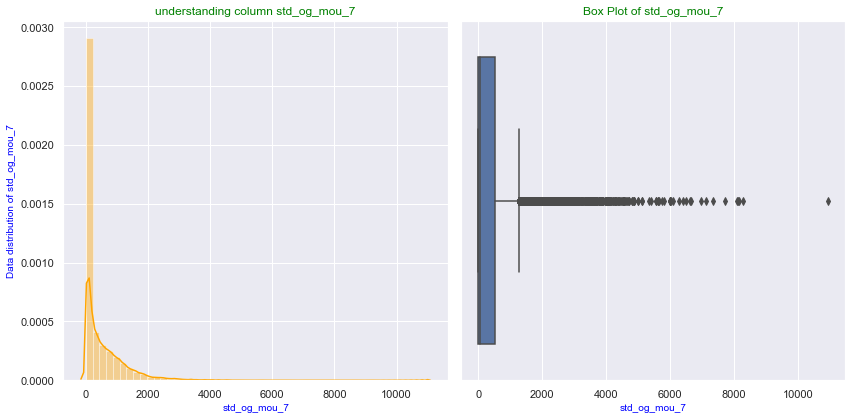

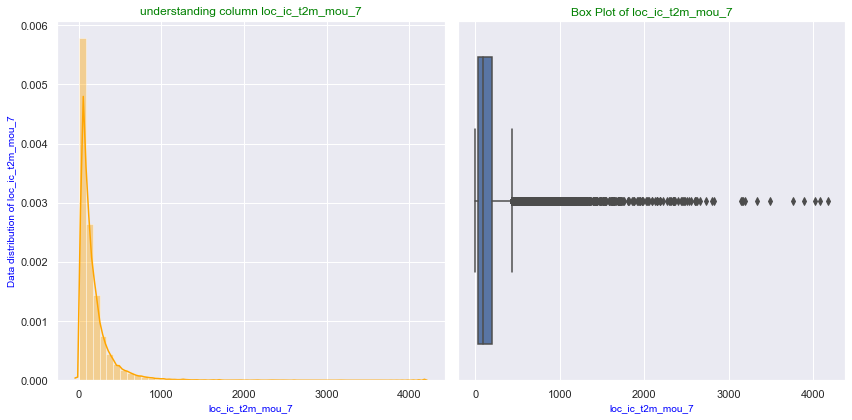

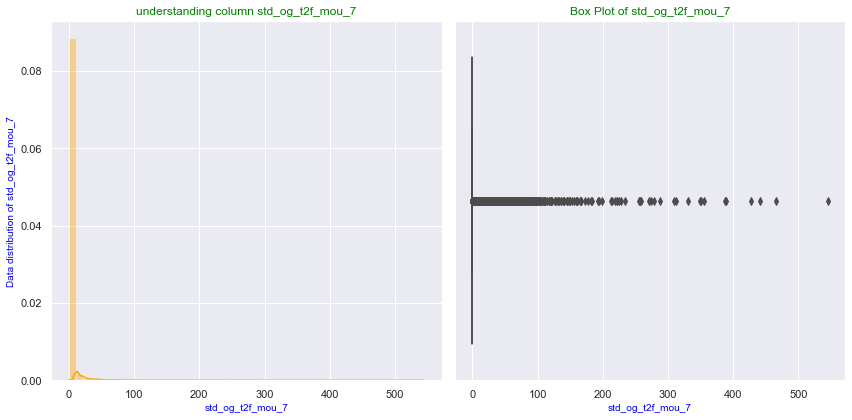

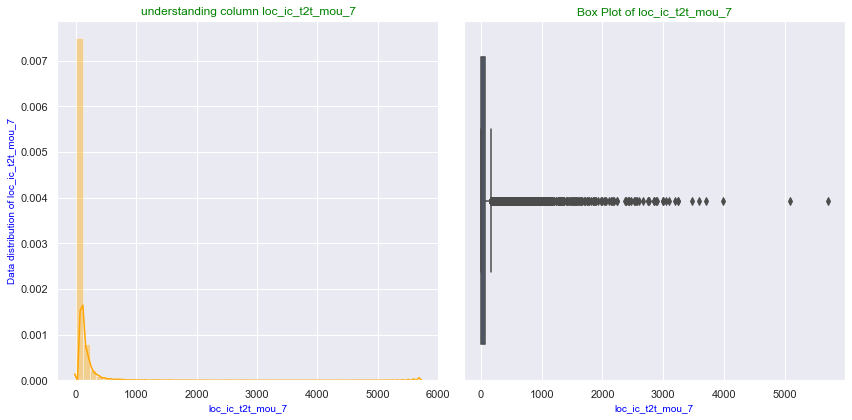

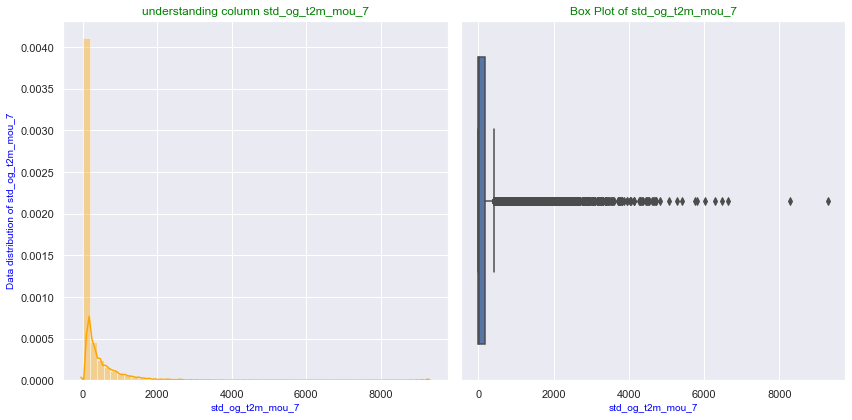

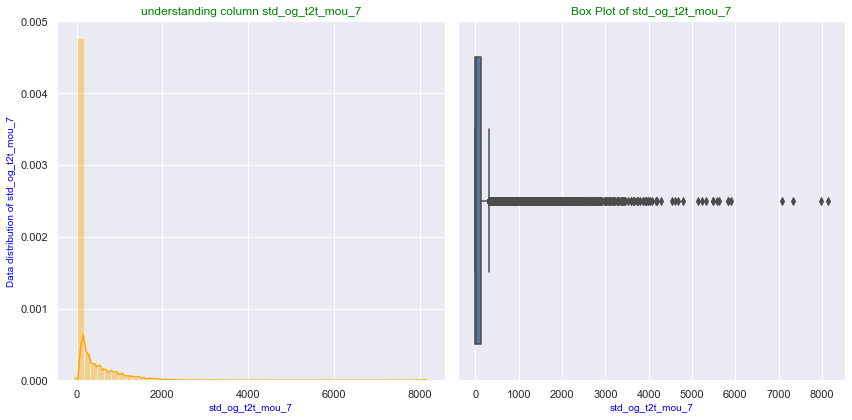

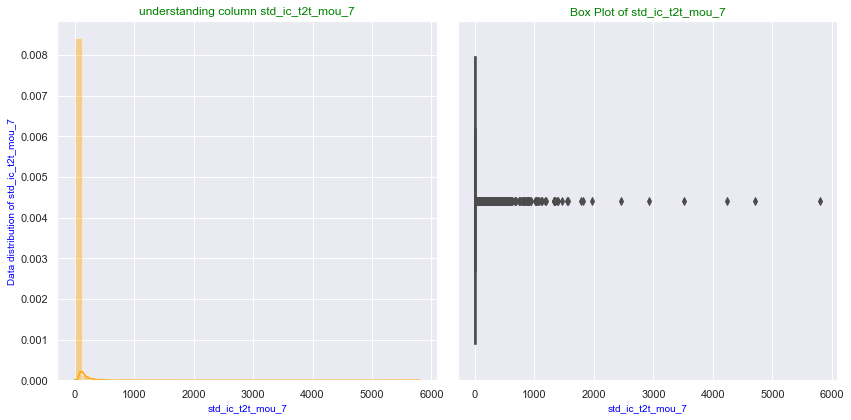

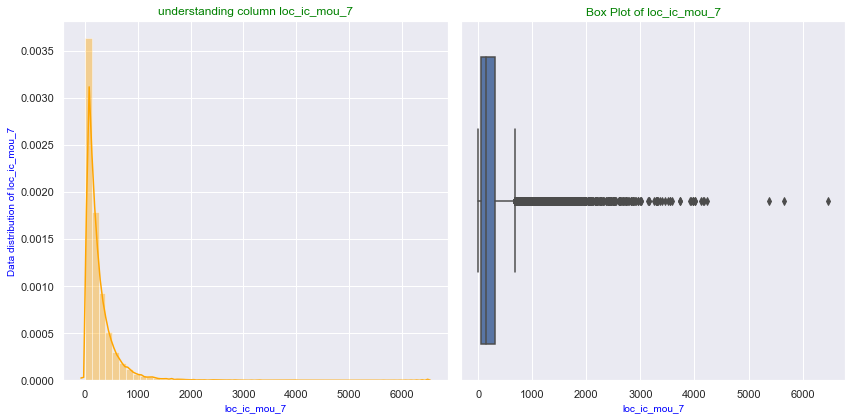

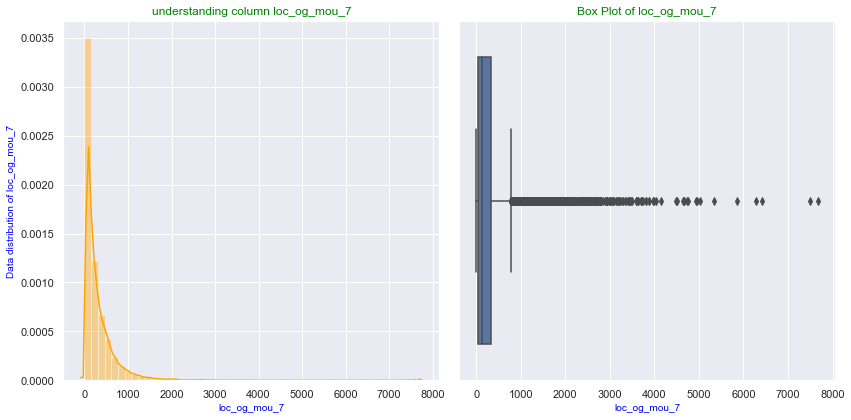

In [29]:
# Plotting Numerical columns to handle missing values.
for col in data_Missvalue:
    Numeric_distplot(Telecom_Highchurn_df,col)

In [30]:
#Imputing the Missing values through KNN imputer 
from sklearn.impute import KNNImputer

In [31]:
#KNN imputation for data_Missvalue
knn_impu =KNNImputer()
Telecom_Highchurn_df[data_Missvalue] = knn_impu.fit_transform(Telecom_Highchurn_df[data_Missvalue])

In [32]:
#Checking the remaining columns that has missing enteries.
Null_percentage(Telecom_Highchurn_df)[Null_percentage(Telecom_Highchurn_df)>0]

date_of_last_rech_data_9    49.27
date_of_last_rech_data_8    46.83
date_of_last_rech_data_6    44.15
date_of_last_rech_data_7    43.15
date_of_last_rech_9          2.72
date_of_last_rech_8          1.94
date_of_last_rech_7          0.33
date_of_last_rech_6          0.24
dtype: float64

- Since there is no information on last date of recharge it is better to drop the date column for further analysis.

In [33]:
#Dropping the date columns for further analysis.
last_date_col = Null_percentage(Telecom_Highchurn_df)[Null_percentage(Telecom_Highchurn_df)>0].index

Telecom_Highchurn_df.drop(columns = last_date_col,inplace=True)

In [34]:
#Checking the Missing enteries.
Null_percentage(Telecom_Highchurn_df)[Null_percentage(Telecom_Highchurn_df)>0]

Series([], dtype: float64)

In [35]:
#Checking the shape of the Telecom_Highchurn_df
Telecom_Highchurn_df.shape

(30001, 202)

### 3.3 Finding Churn customer using mobile activity, like call and internet data usage.
- Churn customers most likley do not use the mobile services like voice calls and internet data that is ,
   - if total_ic_mou_9 = 0 and total_og_mou_9 =0 and vol_2g_mb_9 =0 and vol_3g_mb_9=0 -> 1 (churn)
   - Else --> 0 (No - Churn) 

In [36]:
# Assigning Churn and Non-Churn Label.

Telecom_Highchurn_df['Churn'] = Telecom_Highchurn_df.apply(lambda row: 1 if ((row.total_ic_mou_9 + row.total_og_mou_9 + row.vol_2g_mb_9+ row.vol_3g_mb_9)  == 0) else 0, axis=1)

In [37]:
#Finding Percentage of Churn VS Non -Churn Customers
print(round(Telecom_Highchurn_df['Churn'].value_counts(normalize=True)*100,2))

0    91.86
1     8.14
Name: Churn, dtype: float64


- Data shows high class imbalance and thus it has to be taken care during model building.

In [38]:
#Droping data columns that coressponds to month 9 behaviour .
Telecom_Highchurn_df = Telecom_Highchurn_df.filter(regex='[^9]$', axis=1)
Telecom_Highchurn_df.head(5)

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.803        0.402         0.00   
1     7000701601  1069.180  1349.850  3171.480       57.840        54.68   
2     7001524846   378.721   492.223   137.362      413.690       351.03   
3     7002124215   514.453   597.753   637.760      102.410       132.11   
4     7000887461    74.350   193.897   366.966       48.960        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00         2.176          2.21          0.00           0.00   
1        52.29       453.430        567.16        325.91          16.23   
2        35.08        94.660         80.63        136.48           0.00   
3        85.14       757.930        896.68        983.39           0.00   
4        33.58        85.410         89.36        205.89           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             0.402              0.00              0.00             1.098   
1            51.390             31.38             40.28           308.630   
2           297.130            217.59             12.49            80.960   
3             4.480              6.16             23.34            91.810   
4            48.960             50.66             33.58            82.940   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             0.106              0.00              0.00              0.07   
1           447.380            162.28             62.13             55.14   
2            70.580             50.54              0.00              0.00   
3            87.930            104.81              0.75              0.00   
4            83.010            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00             1.078             0.566              0.00   
1             53.23             0.000             0.000              0.00   
2              0.00             0.000             0.000              7.15   
3              1.58             0.000             0.000              0.00   
4              0.00             0.000             0.000             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          1.50         0.176          0.00              0.00   
1        422.16       533.910        255.79              4.30   
2        378.09       288.180         63.04            116.56   
3         97.04        94.090        129.74             97.93   
4        131.91       133.680        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00        

In [39]:
#Droping data columns sep_vbc_3g
Telecom_Highchurn_df.drop(columns = 'sep_vbc_3g',inplace=True)

In [40]:
#Checking the shape of Telecom_Highchurn_df
Telecom_Highchurn_df.shape

(30001, 153)

In [41]:
#Mobile Number corresponds to unique USER ID and thus it will not be useful in model building and thus droping mobile_number
Telecom_Highchurn_df.drop(columns = 'mobile_number',inplace=True)

### 3.4 Univariate and Bivariate  Analysis.

##### 3.4.1 Numerical Data.

In [42]:
# Defining custom BOX plot to check on different attributes for 3 months
def Numeric_UnivBoxplot(df,col,Target):
    plt.figure(figsize=[12,6])
      
    ax1 = plt.subplot(2,2,1)
    sns.boxplot(x=Target,y=col+'_6' ,data=df)
    plt.title("Box Plot of {}_6".format(col),color='green',fontsize =12)
    plt.ylabel("{}_6".format(col),color='blue',fontsize =10)
    plt.xlabel(Target,color='blue',fontsize =10)
    
    ax2 = plt.subplot(2,2,2)
    sns.boxplot(x=Target,y=col+'_7' ,data=df)
    plt.title("Box Plot of {}_7".format(col),color='green',fontsize =12)
    plt.ylabel("{}_7".format(col),color='blue',fontsize =10)
    plt.xlabel(Target,color='blue',fontsize =10)
    
    ax3 = plt.subplot(2,2,3)
    sns.boxplot(x=Target,y=col+'_8' ,data=df)
    plt.title("Box Plot of {}_8".format(col),color='green',fontsize =12)
    plt.ylabel("{}_8".format(col),color='blue',fontsize =10)
    plt.xlabel(Target,color='blue',fontsize =10)
    
    plt.tight_layout()
    plt.show();

In [43]:
#Extracting common column Charachteristics.
month6_col = Telecom_Highchurn_df.select_dtypes(include=['int64','float64']).filter(regex='[6]$', axis=1).columns

def montransfcol(col):
    lst = []
    for idc in col:
        lst.append(idc.split("_6")[0])
        
    return lst

month_col = montransfcol(month6_col)

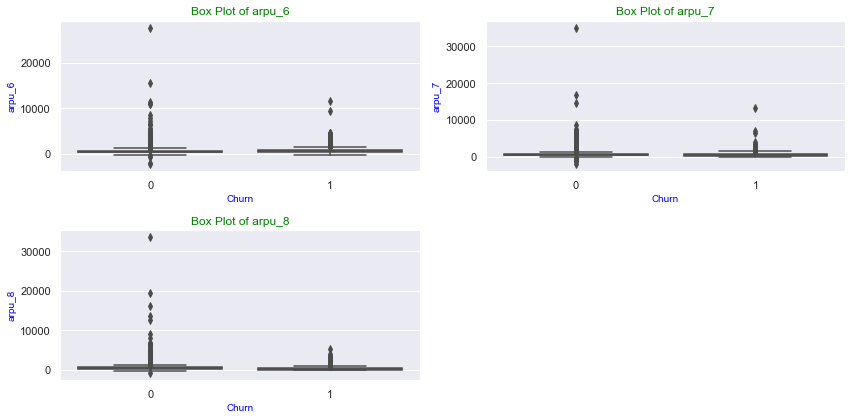

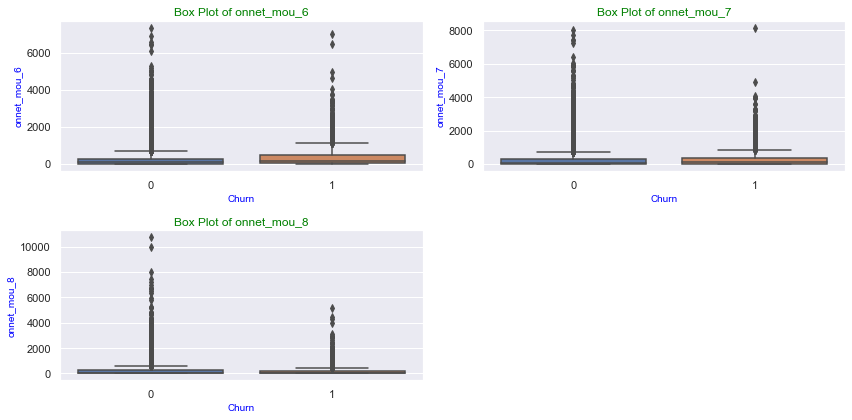

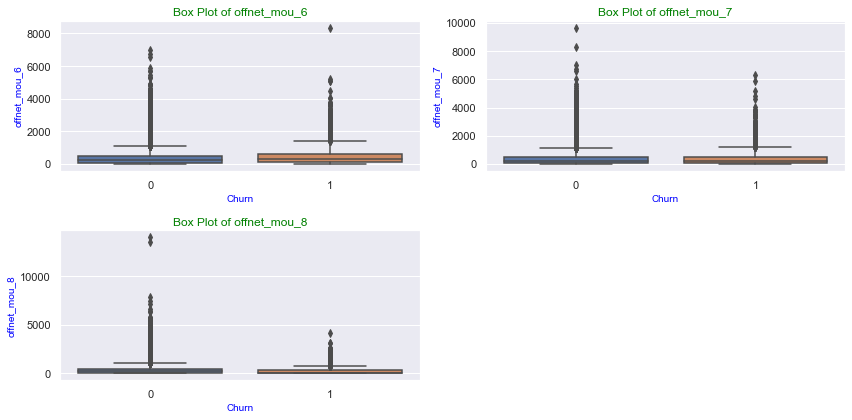

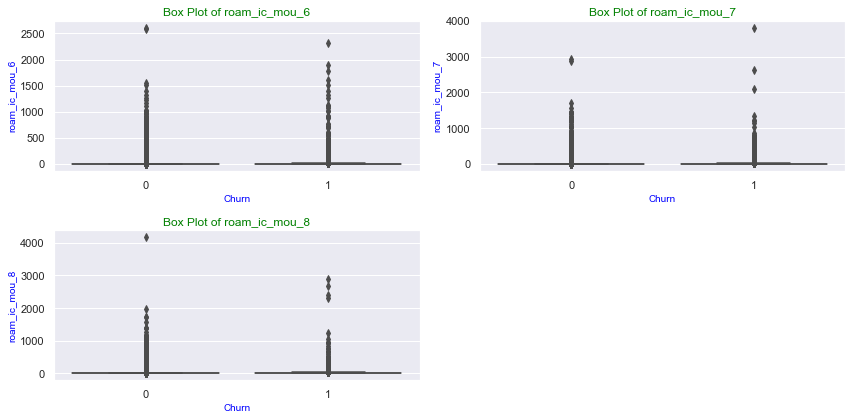

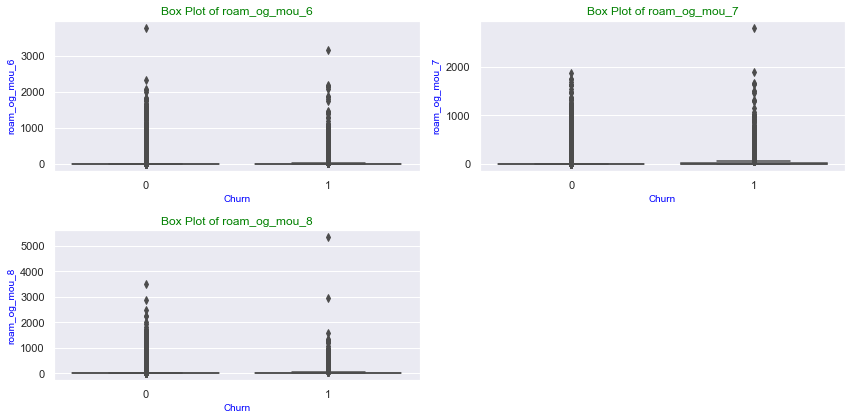

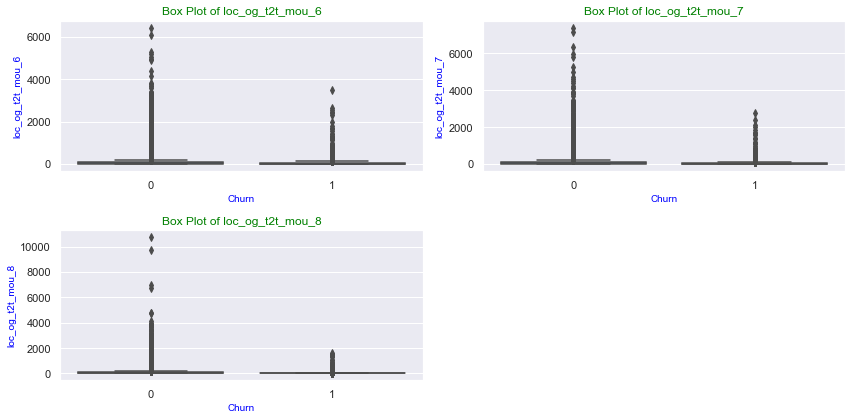

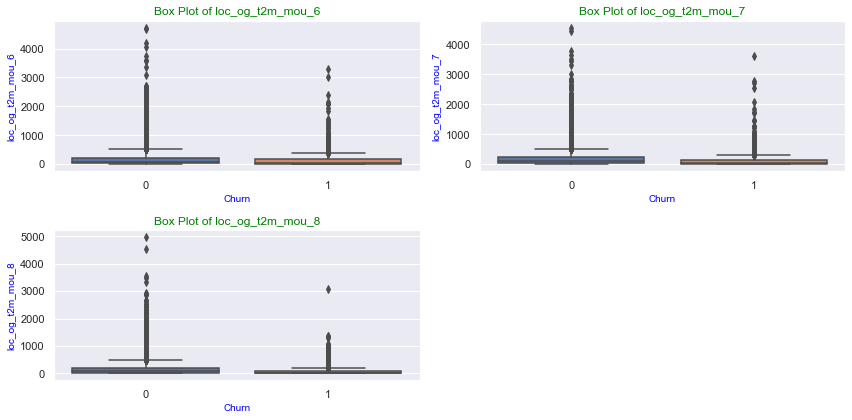

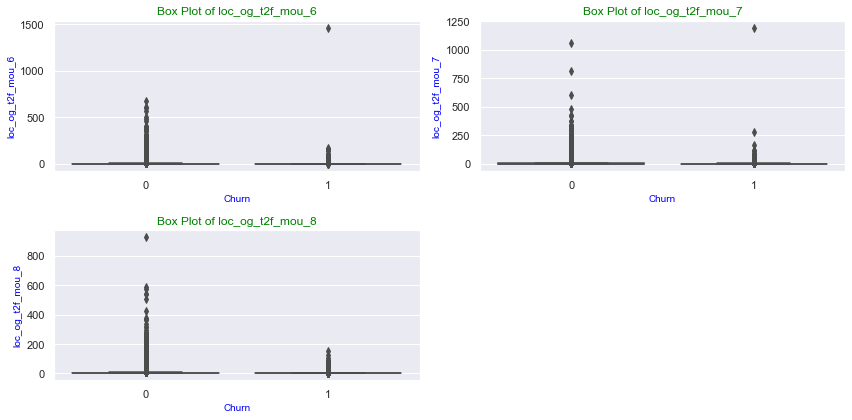

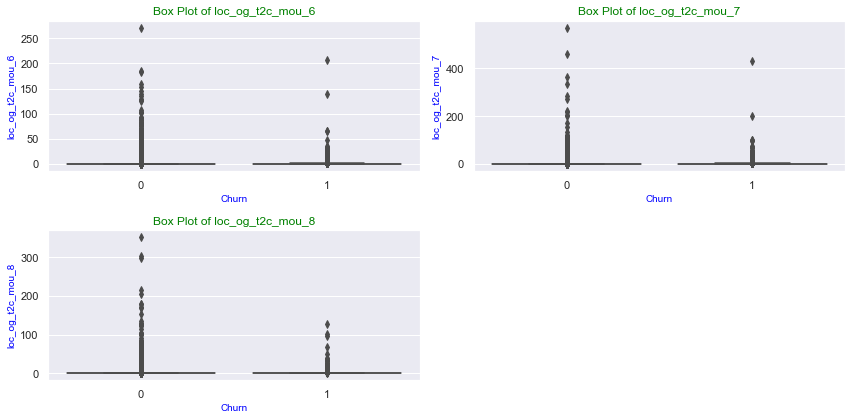

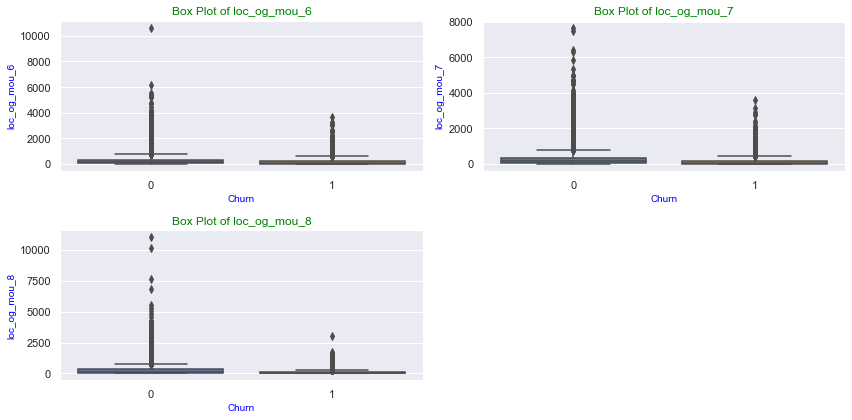

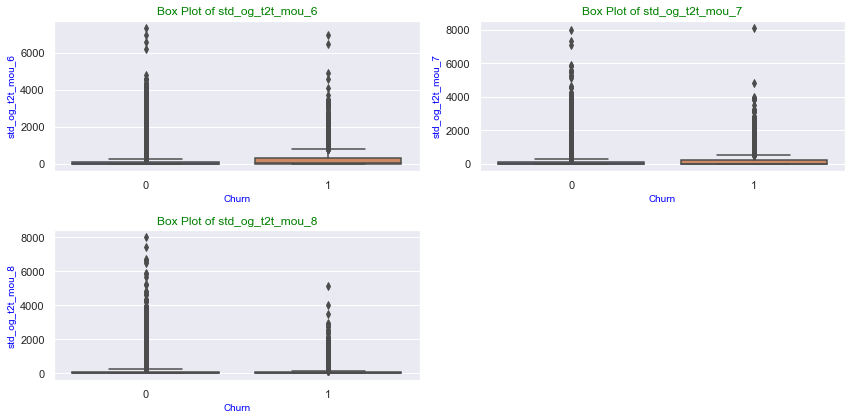

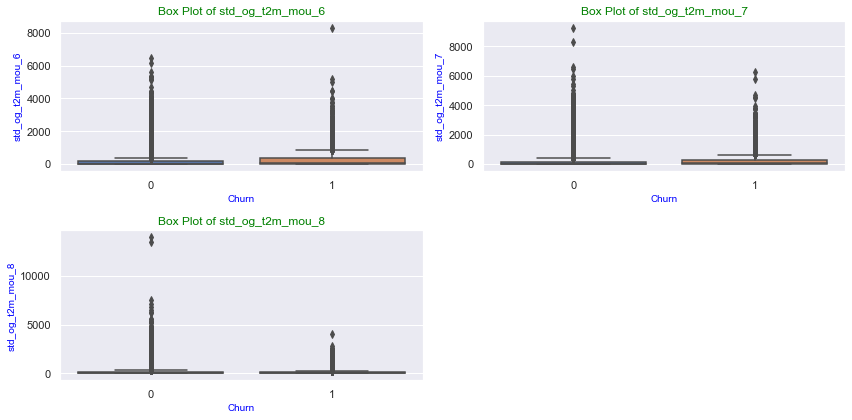

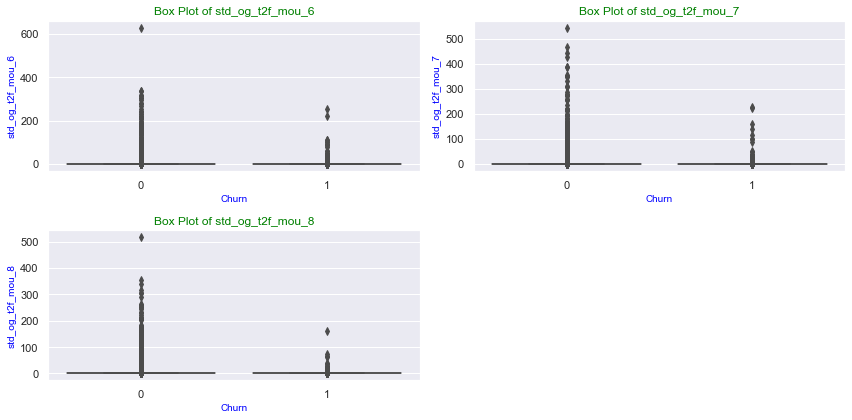

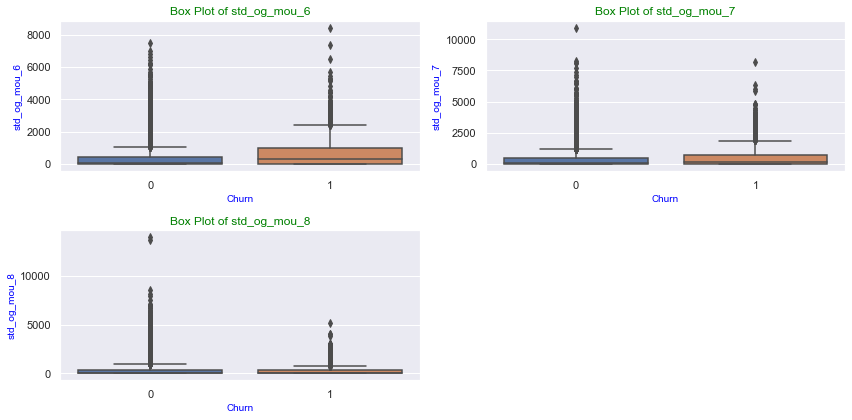

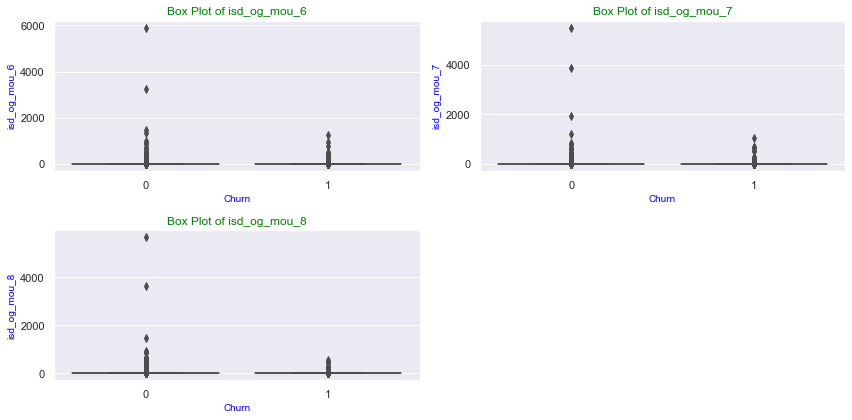

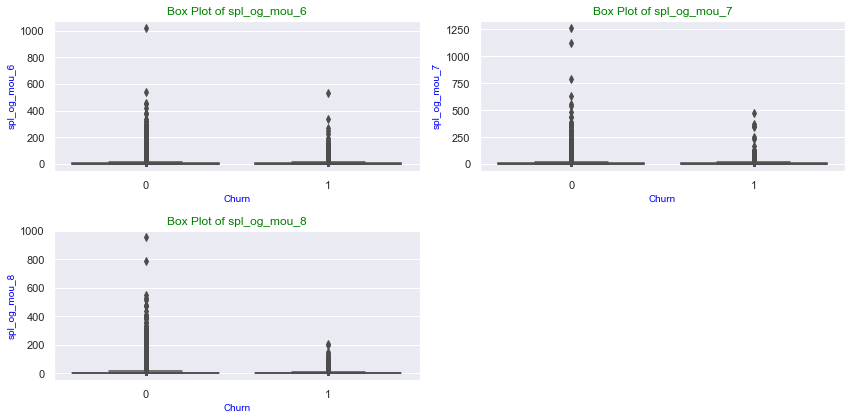

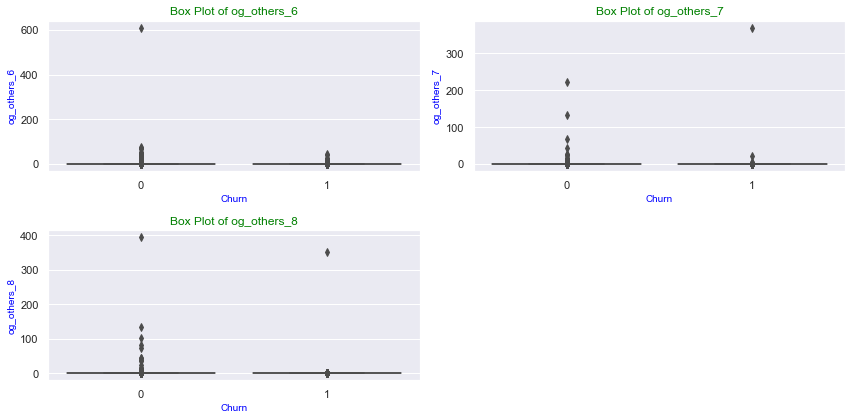

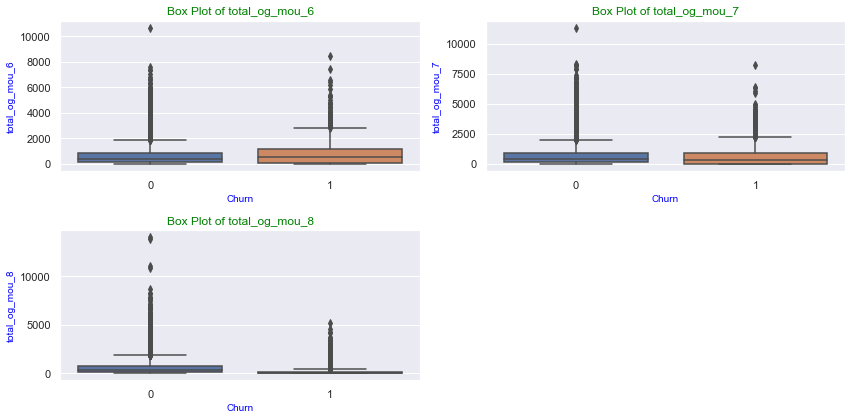

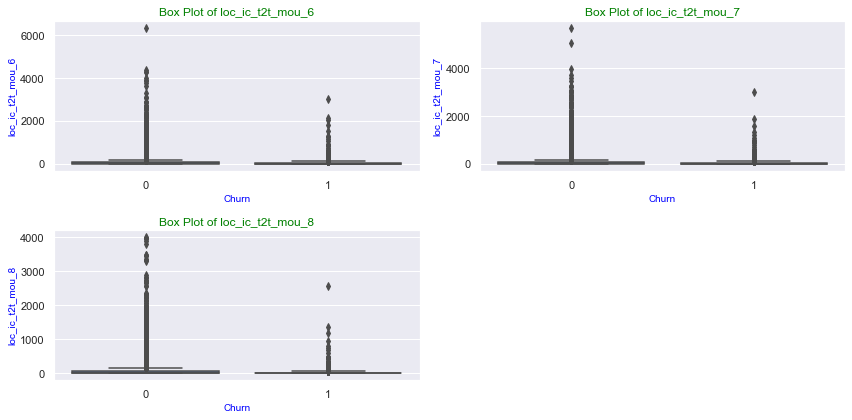

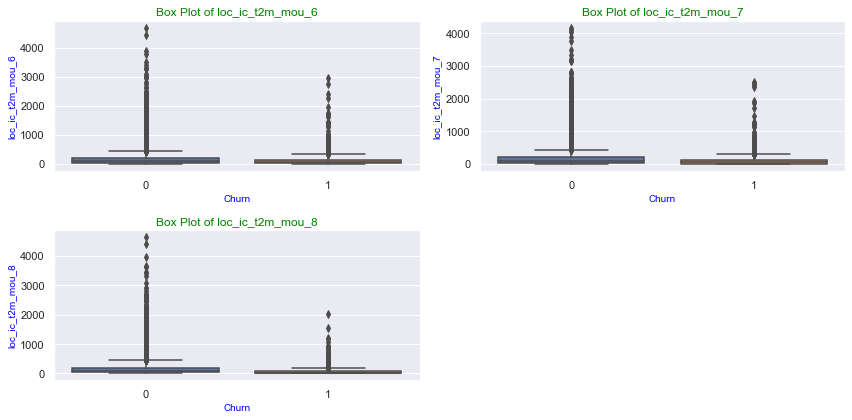

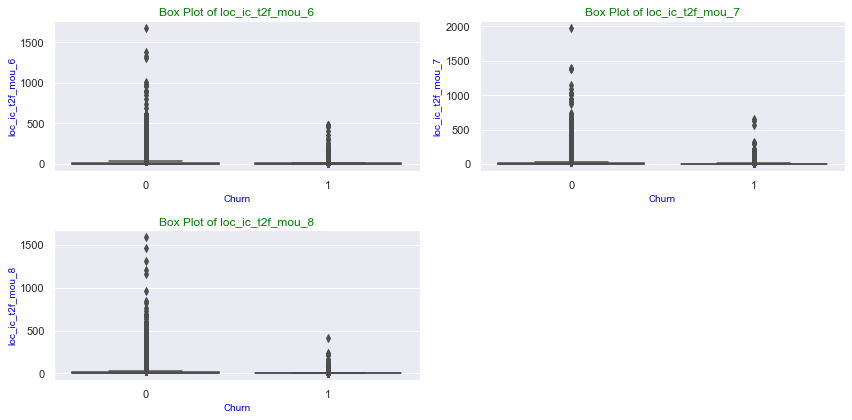

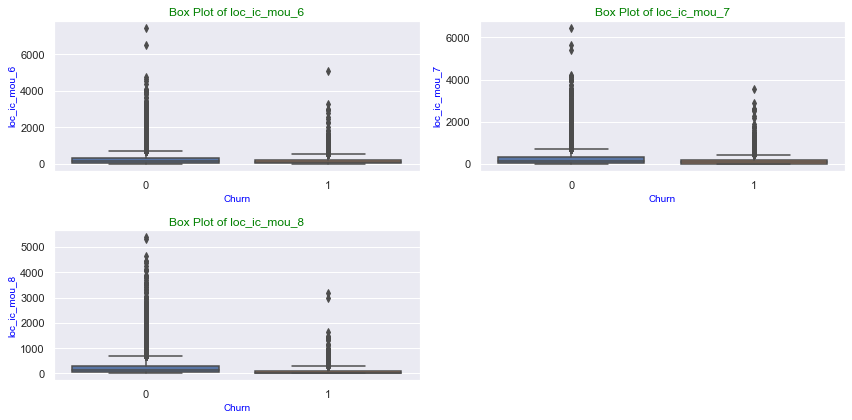

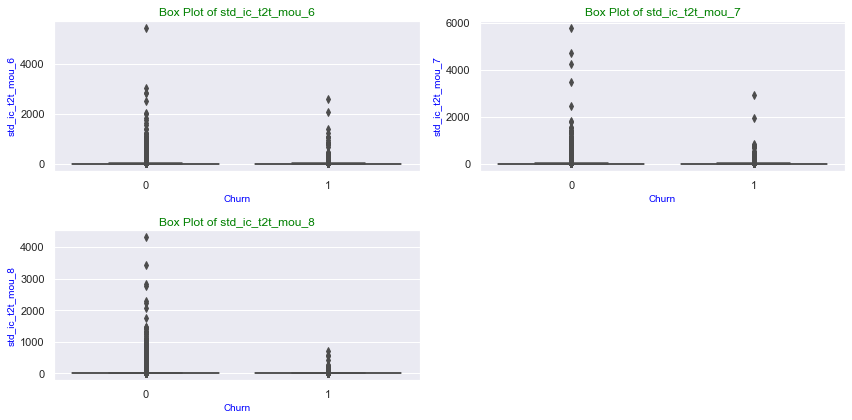

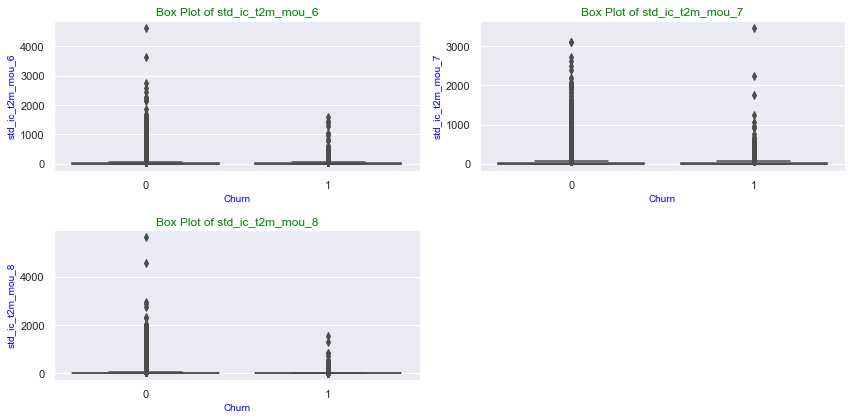

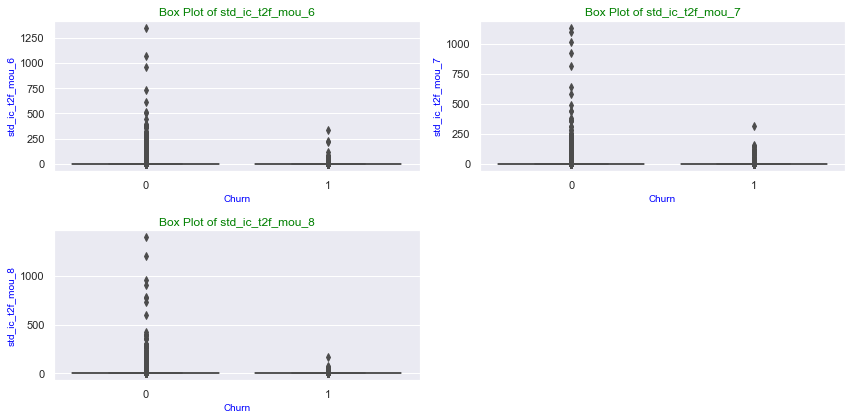

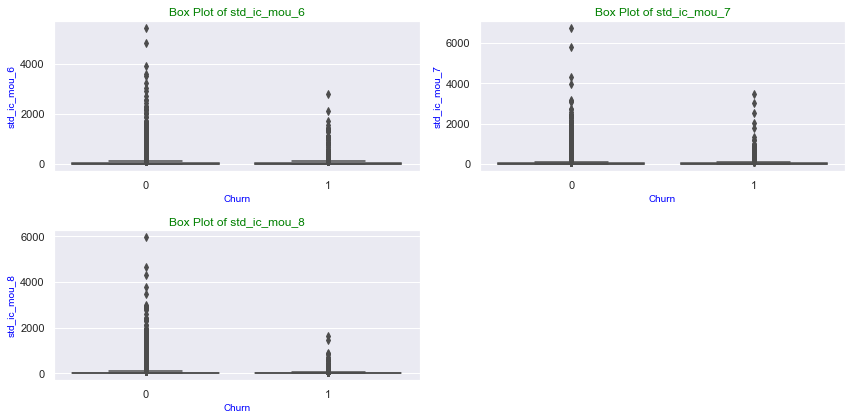

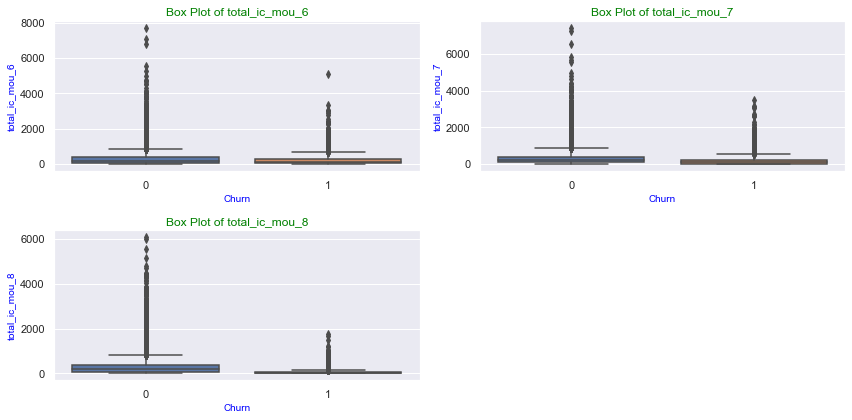

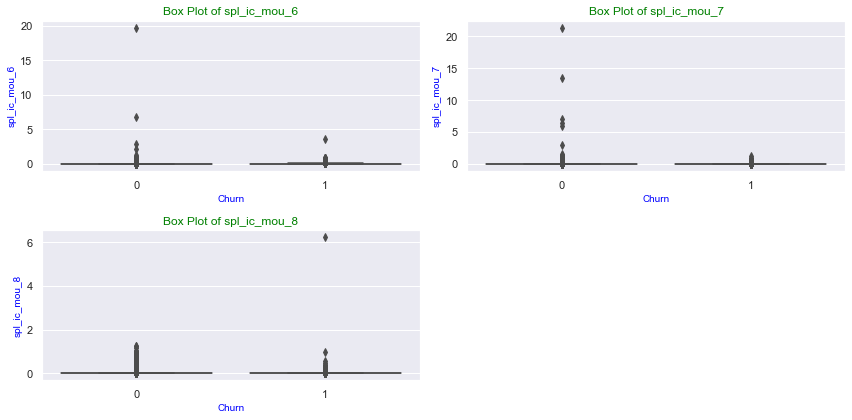

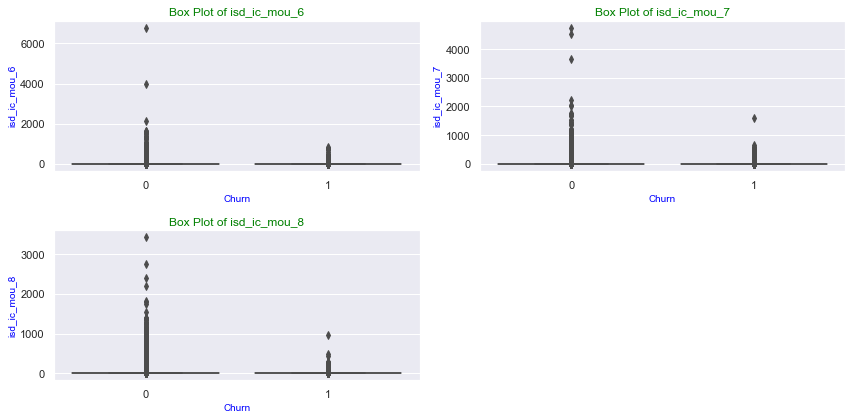

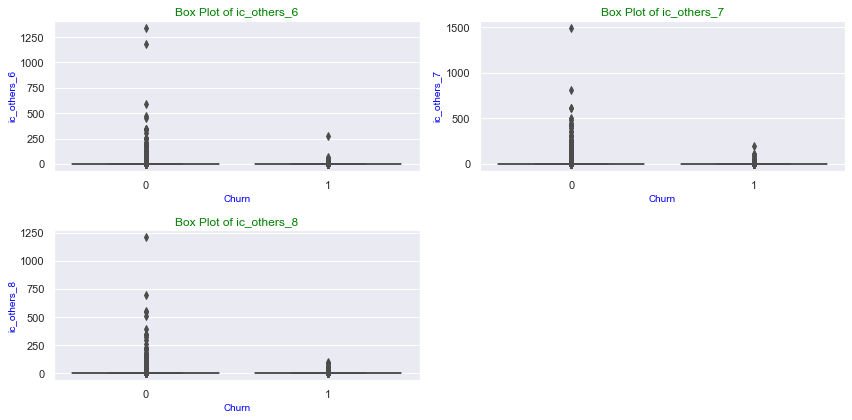

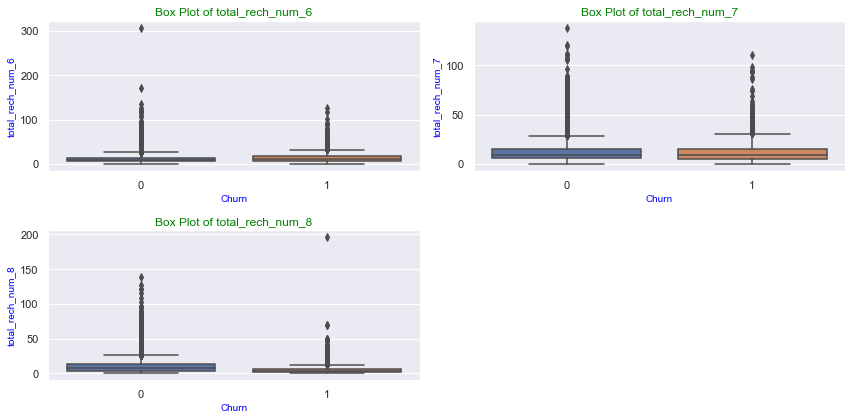

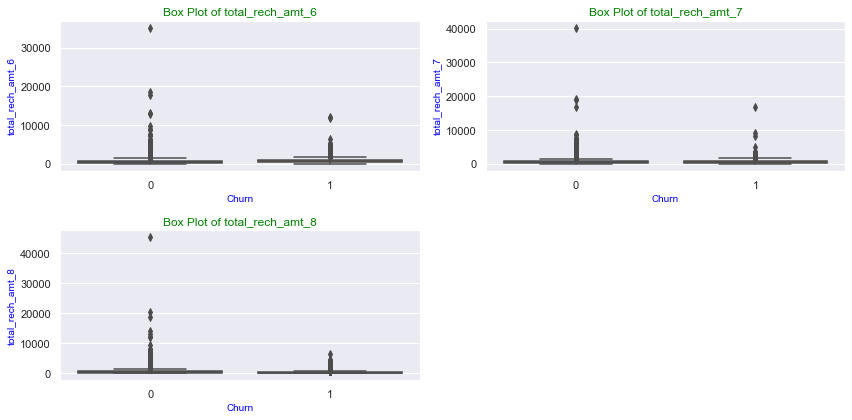

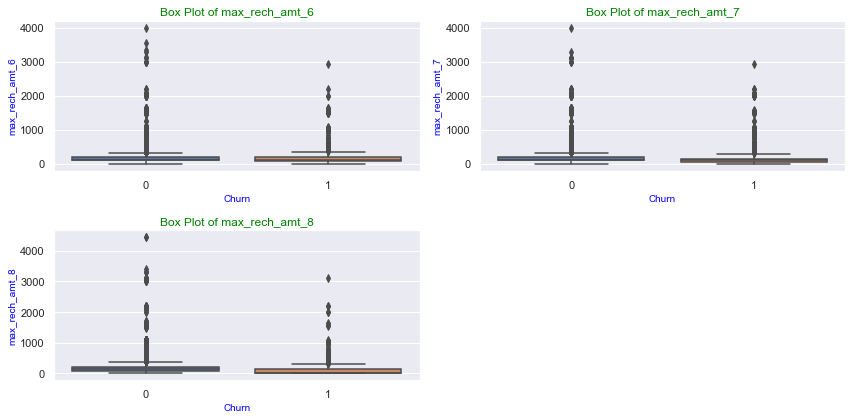

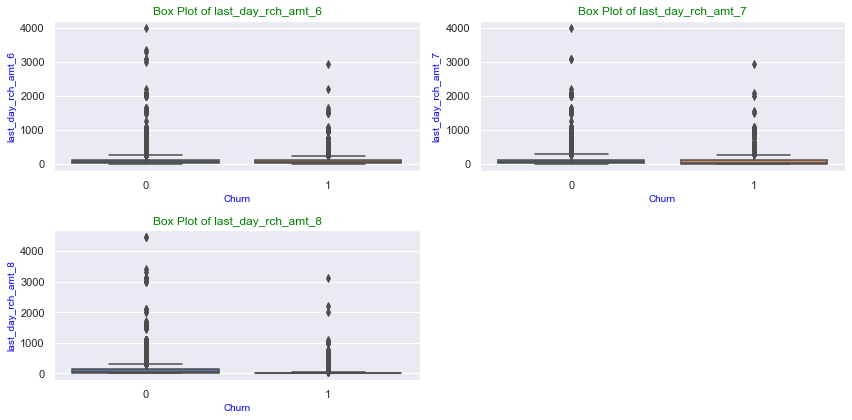

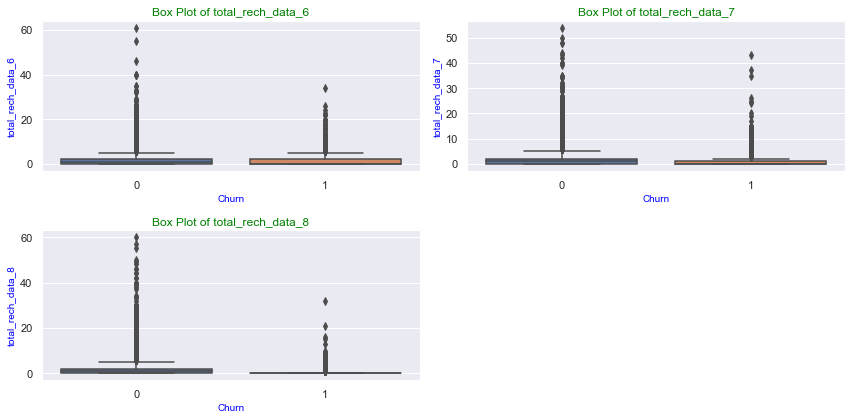

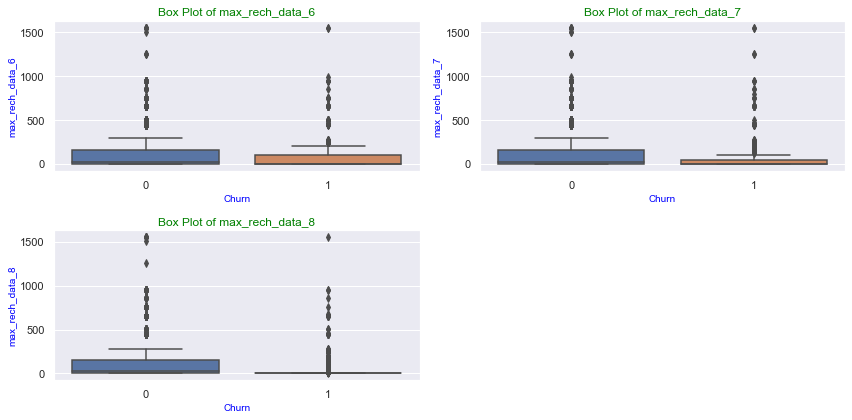

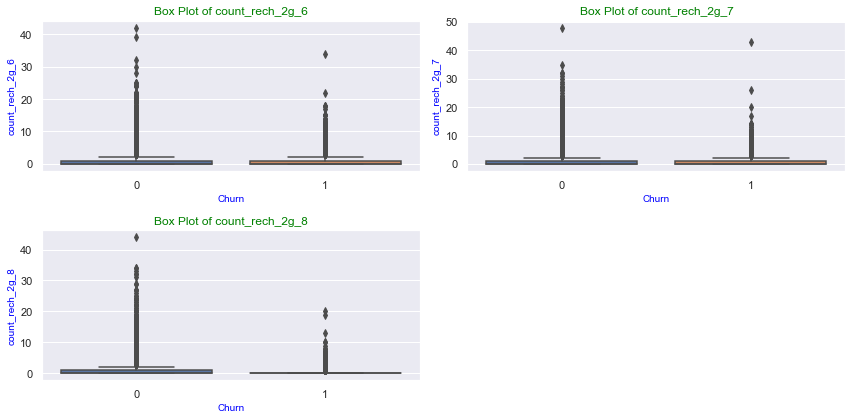

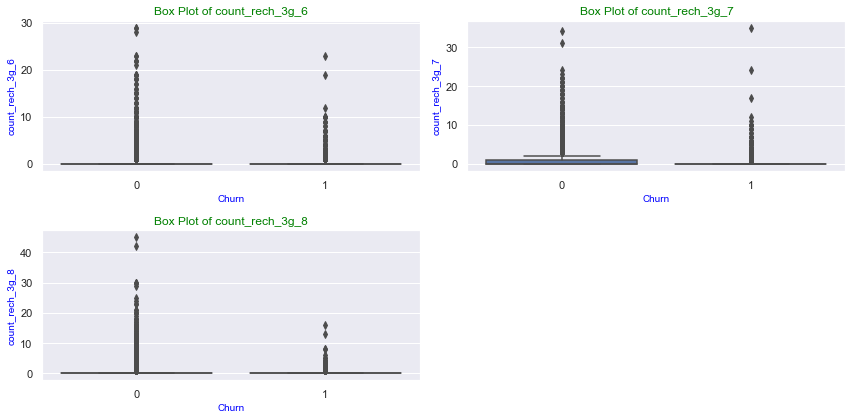

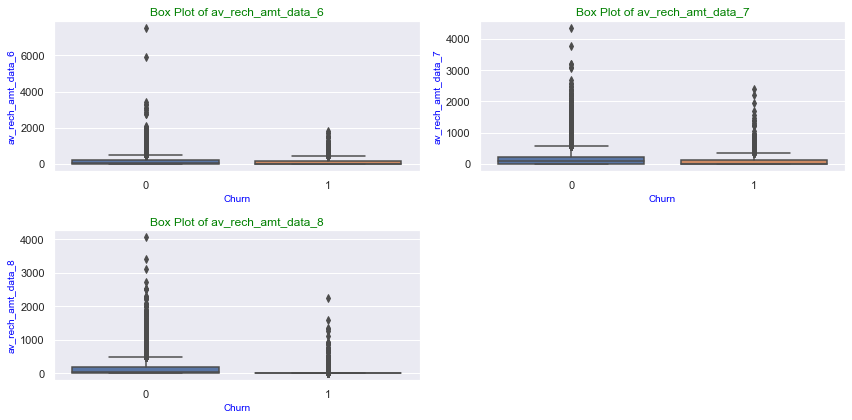

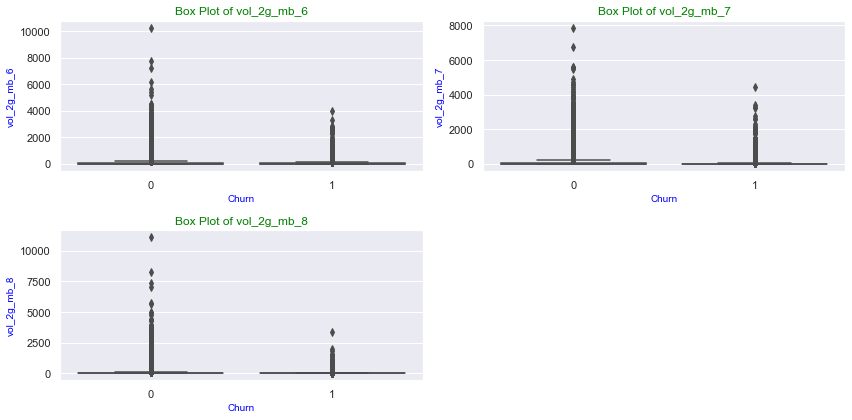

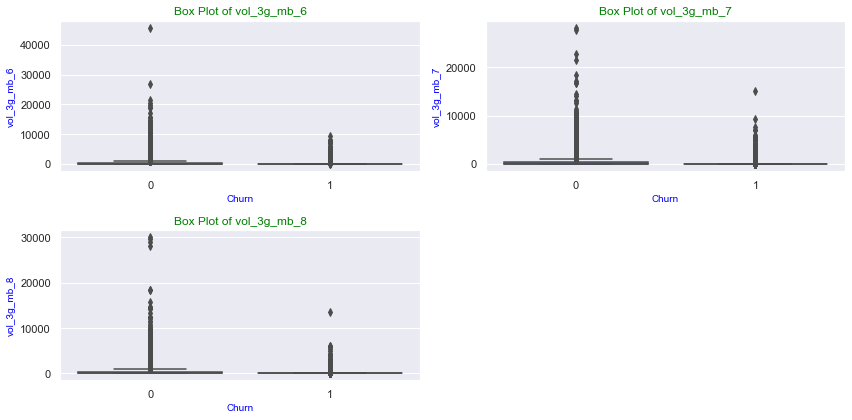

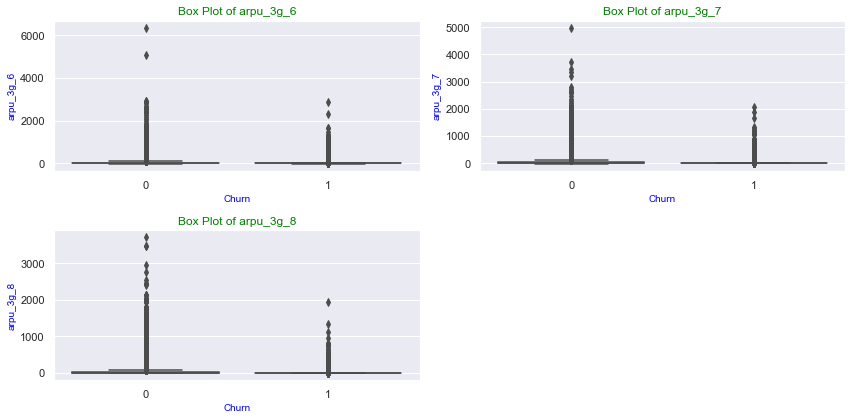

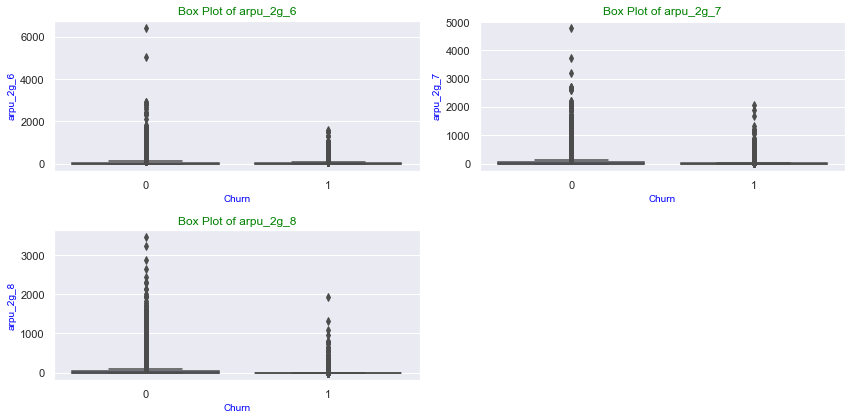

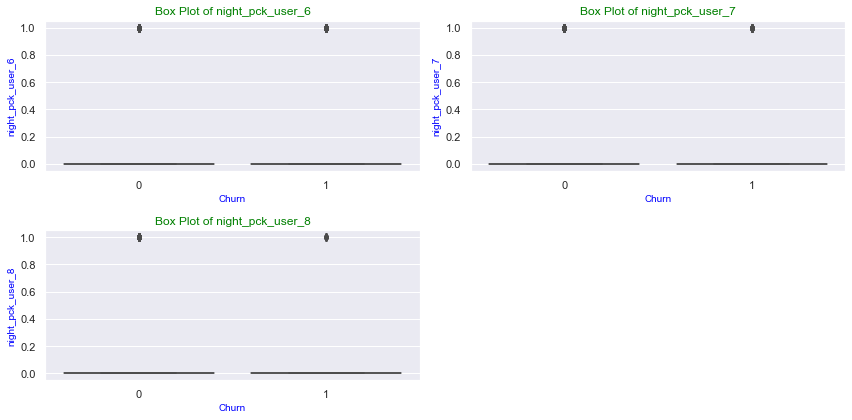

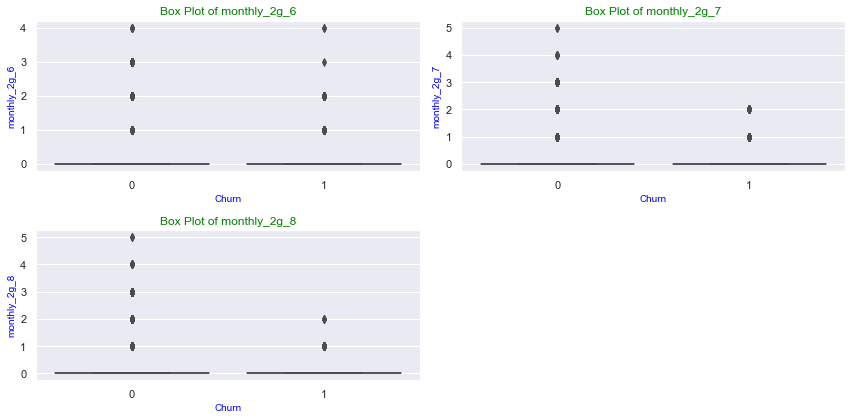

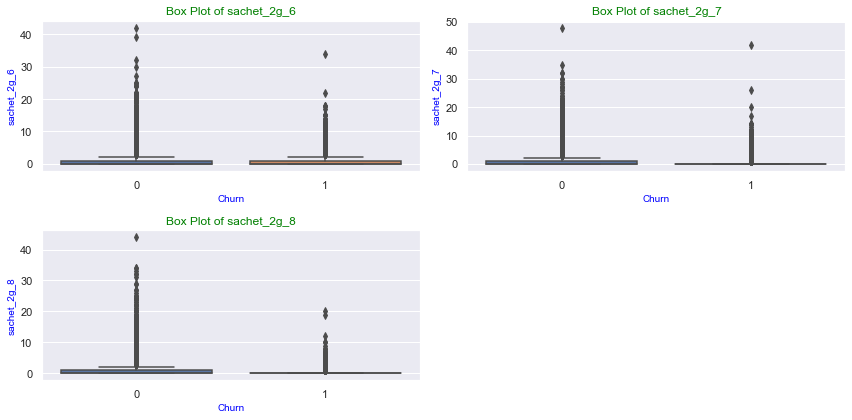

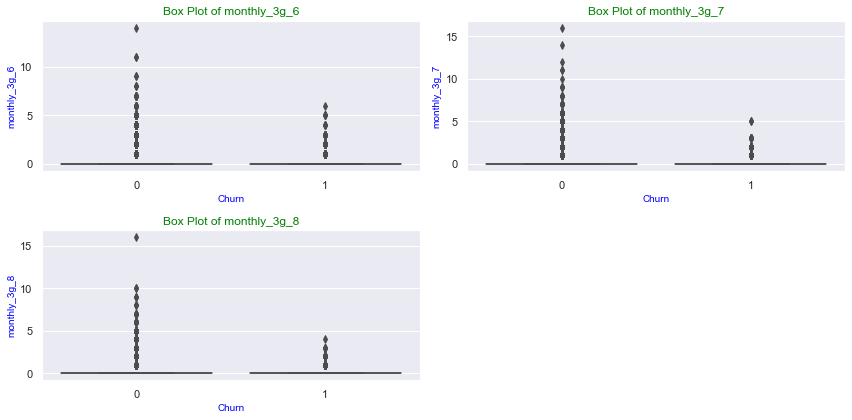

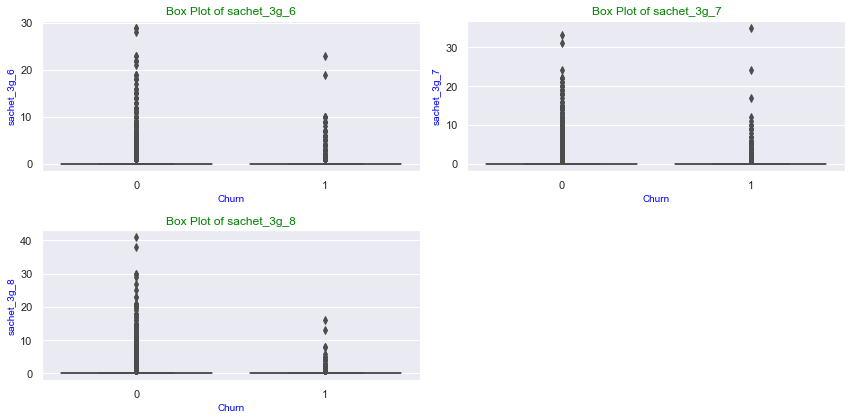

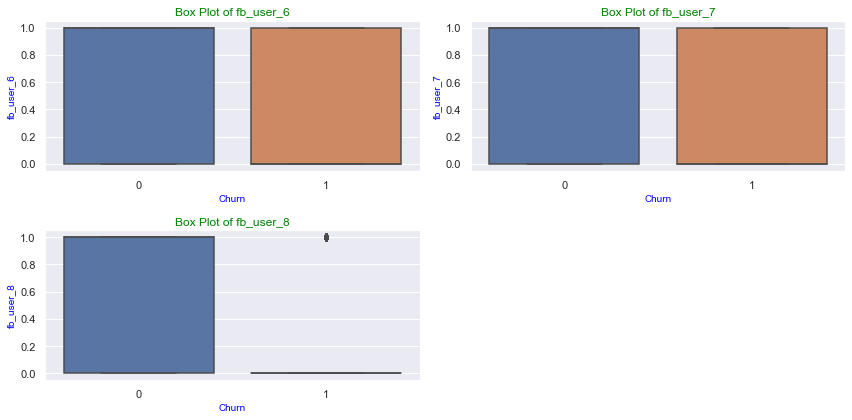

In [44]:
#Checking the Box plot of the columns.
for col in month_col:
    Numeric_UnivBoxplot(Telecom_Highchurn_df,col,'Churn')

- Capping all the outliers to 99 percentile quantile value.

In [45]:
for col in month_col:
    q4 = Telecom_Highchurn_df[col+'_6'].quantile(0.99)
    Telecom_Highchurn_df[col+'_6'][Telecom_Highchurn_df[col+'_6']>=q4] = q4

    q4 = Telecom_Highchurn_df[col+'_7'].quantile(0.99)
    Telecom_Highchurn_df[col+'_7'][Telecom_Highchurn_df[col+'_7']>=q4] = q4
    
    q4 = Telecom_Highchurn_df[col+'_8'].quantile(0.99)
    Telecom_Highchurn_df[col+'_8'][Telecom_Highchurn_df[col+'_8']>=q4] = q4


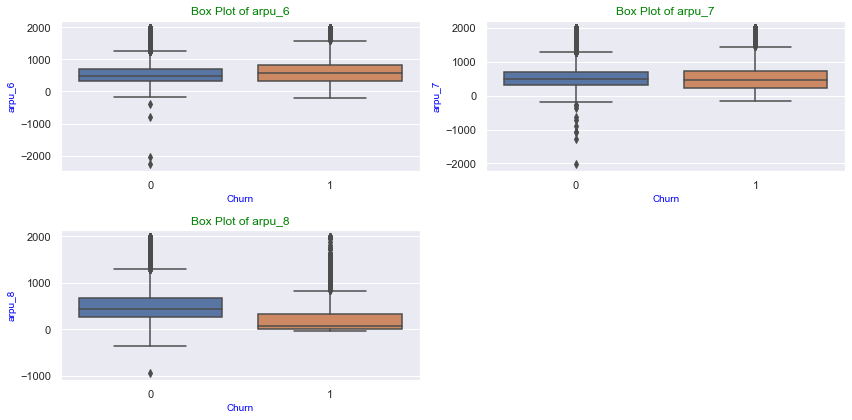

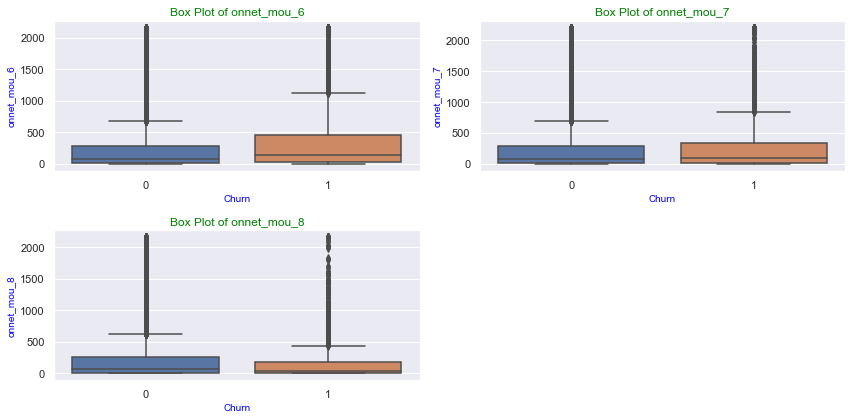

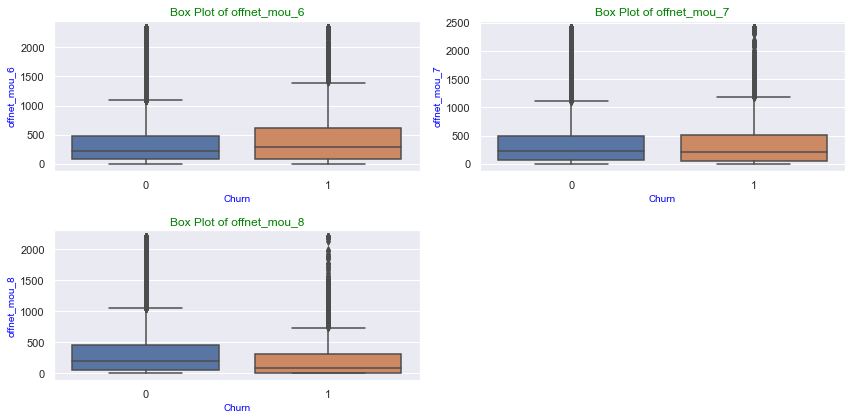

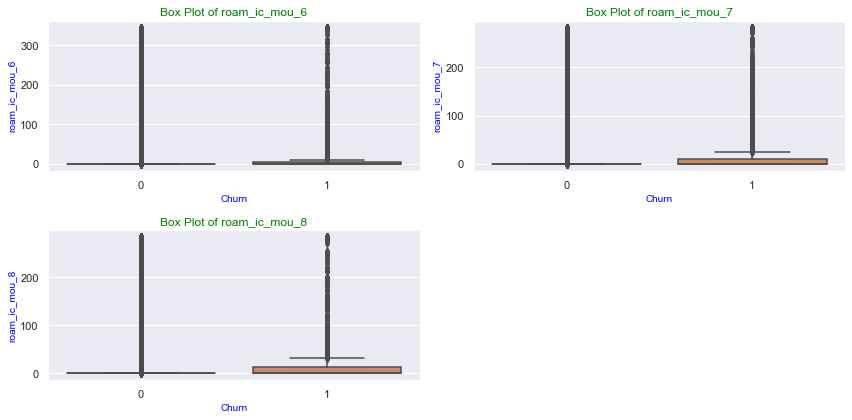

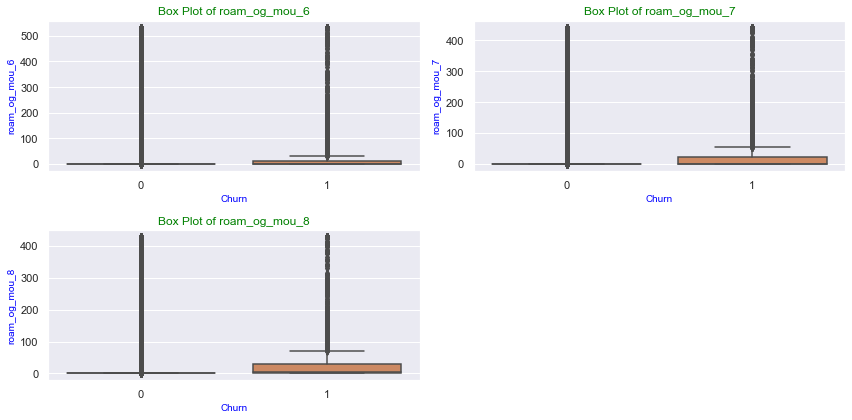

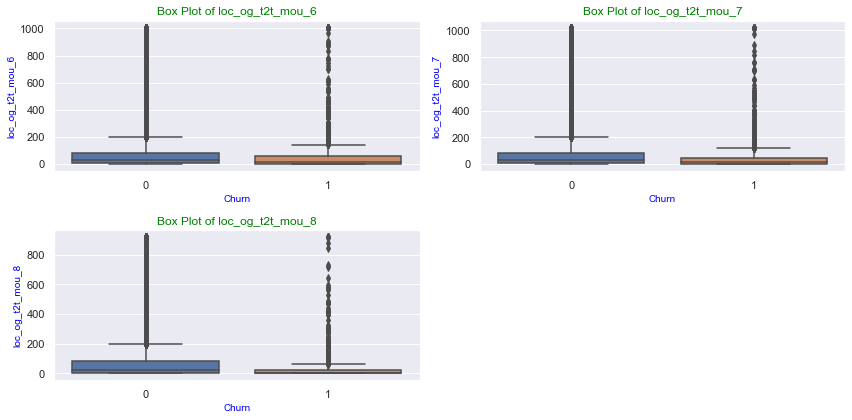

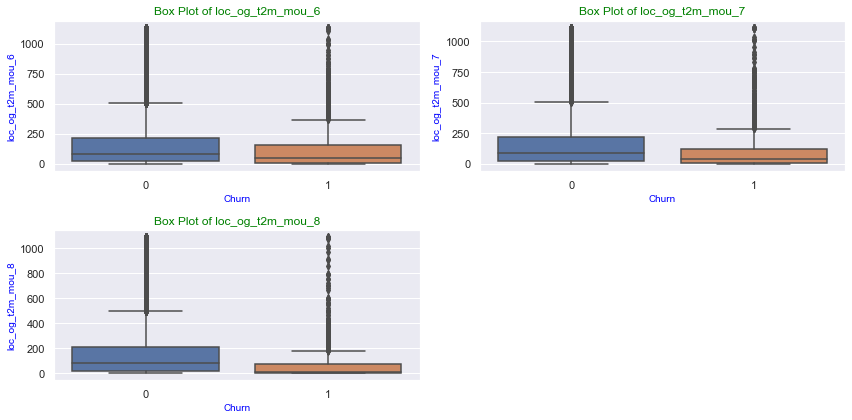

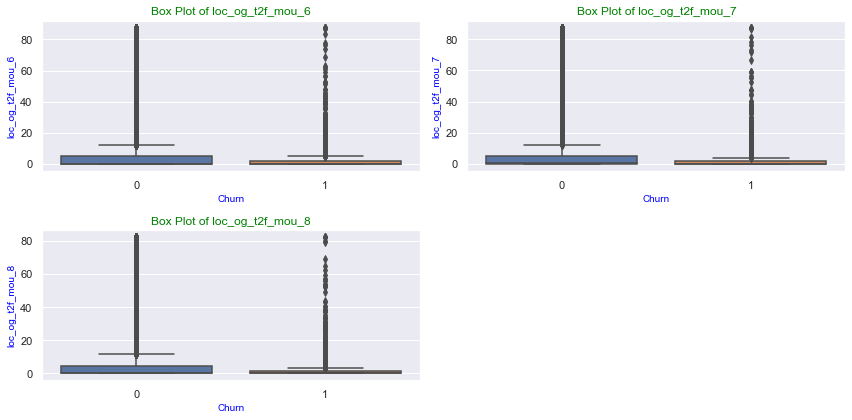

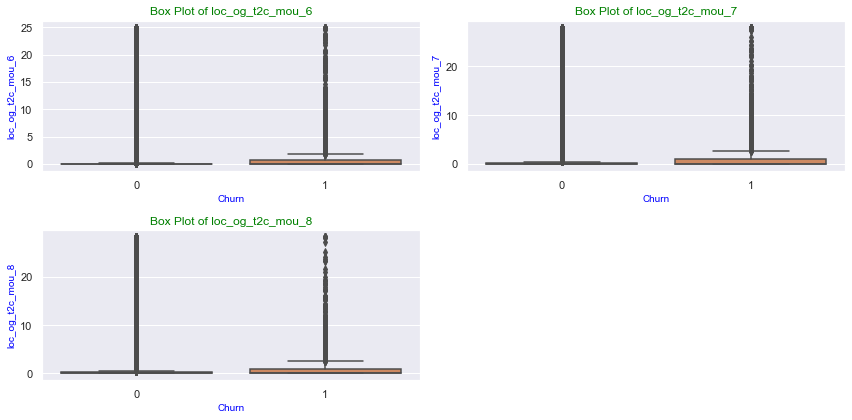

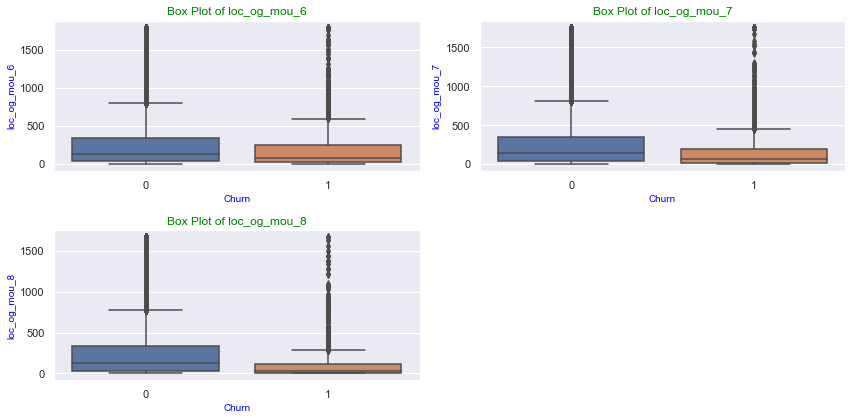

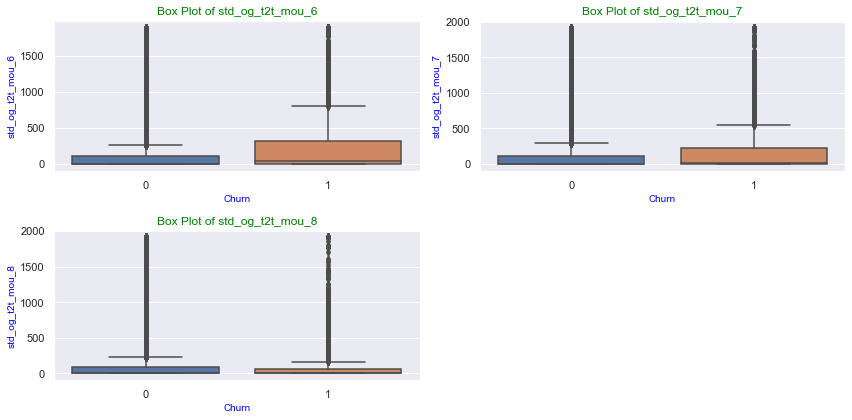

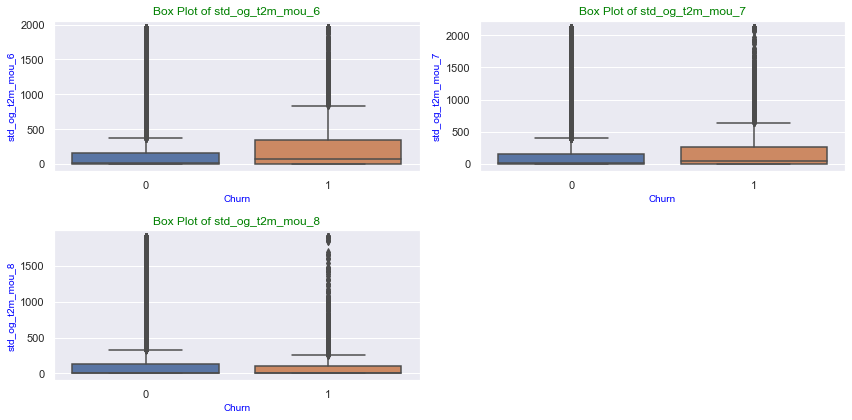

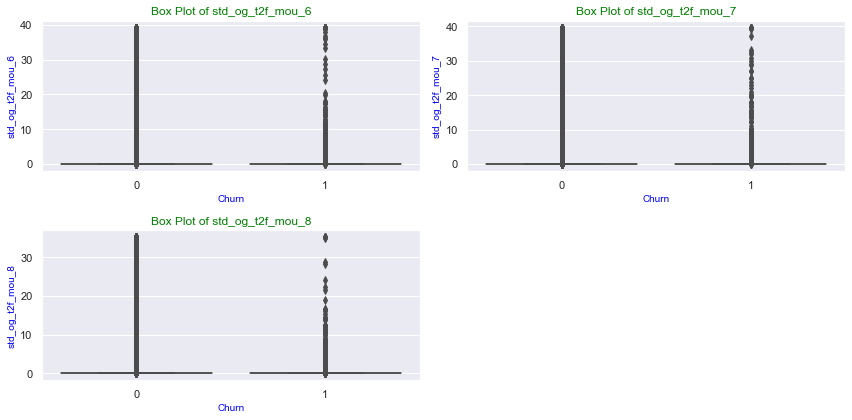

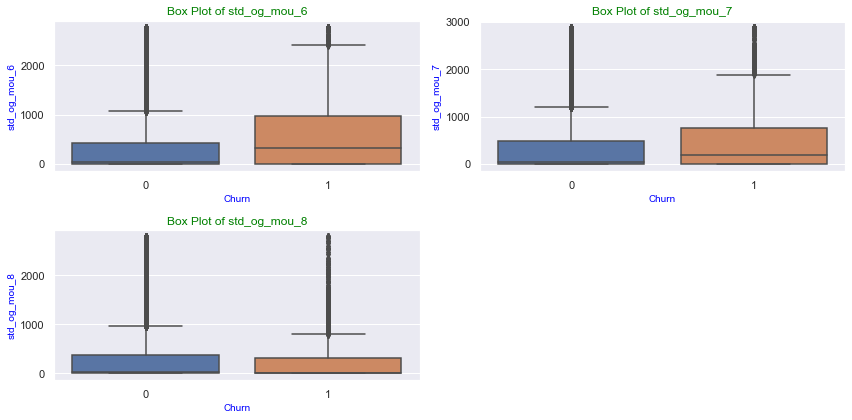

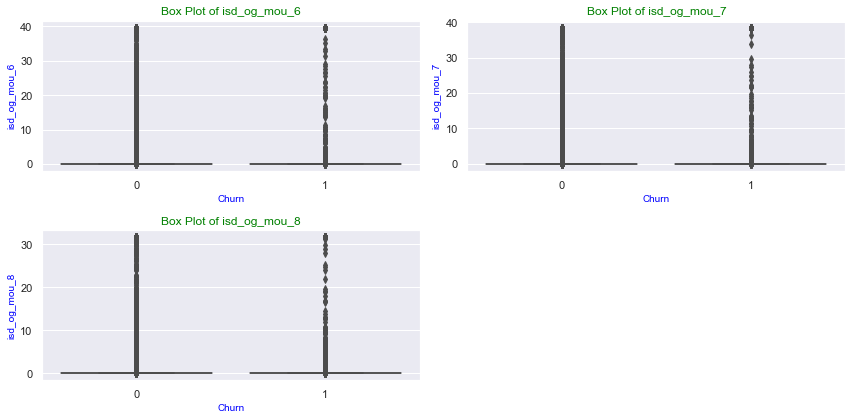

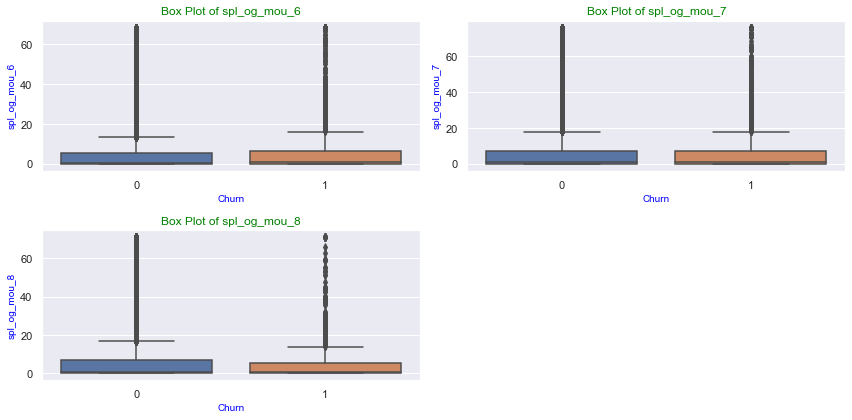

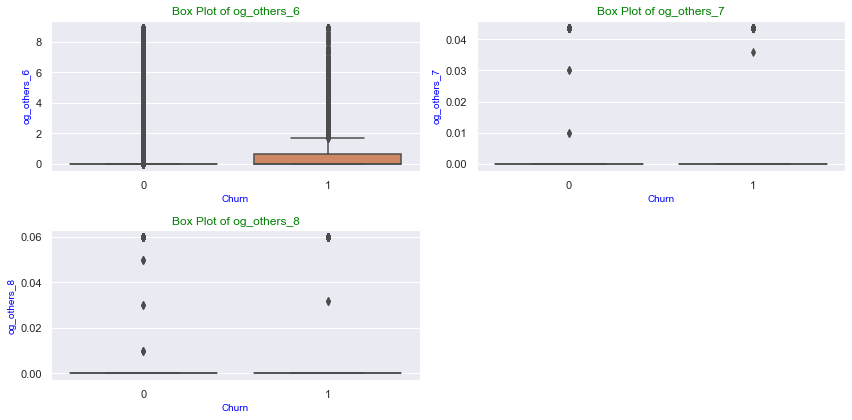

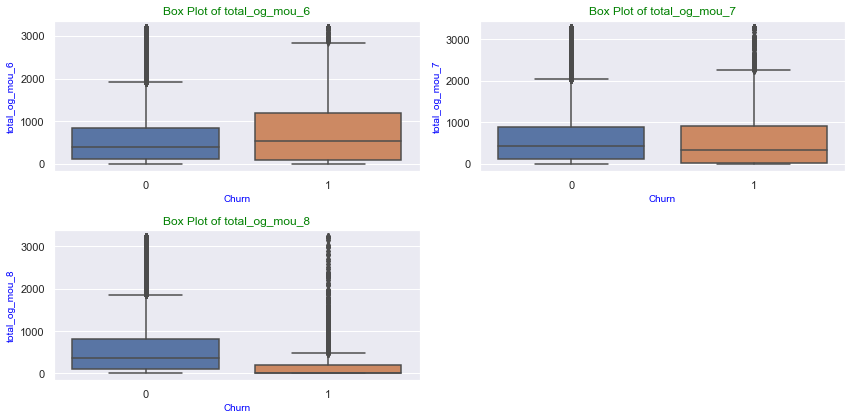

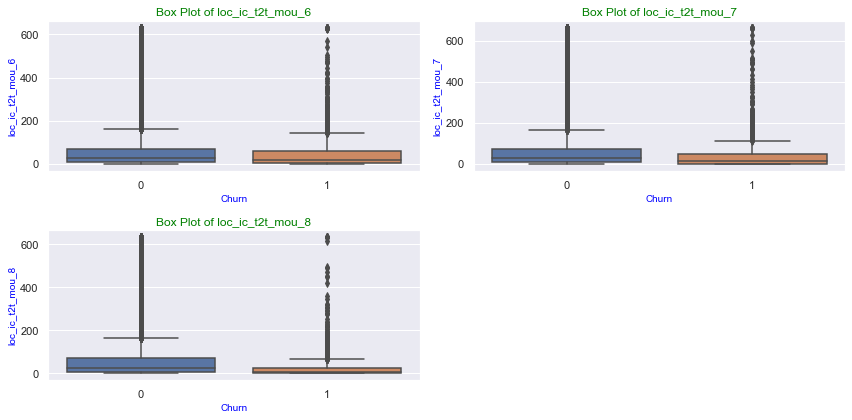

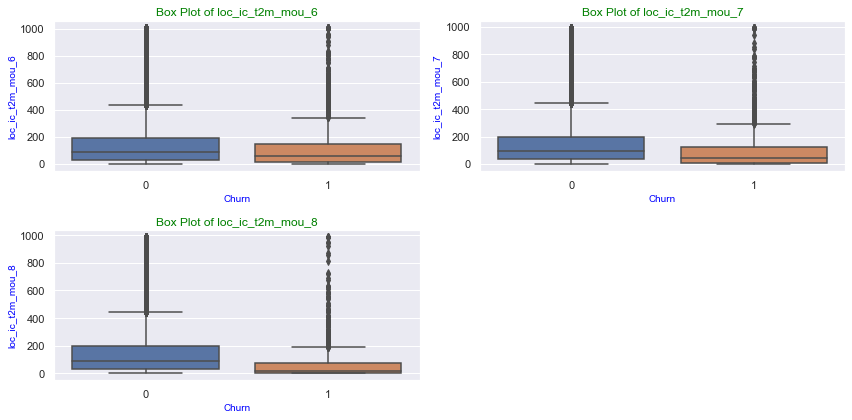

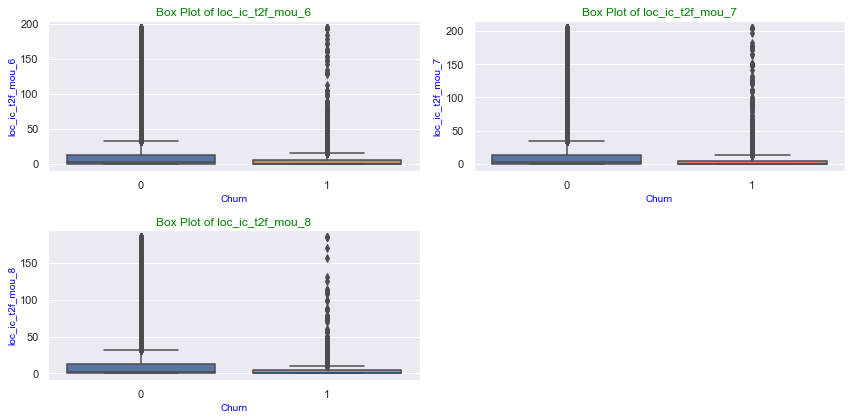

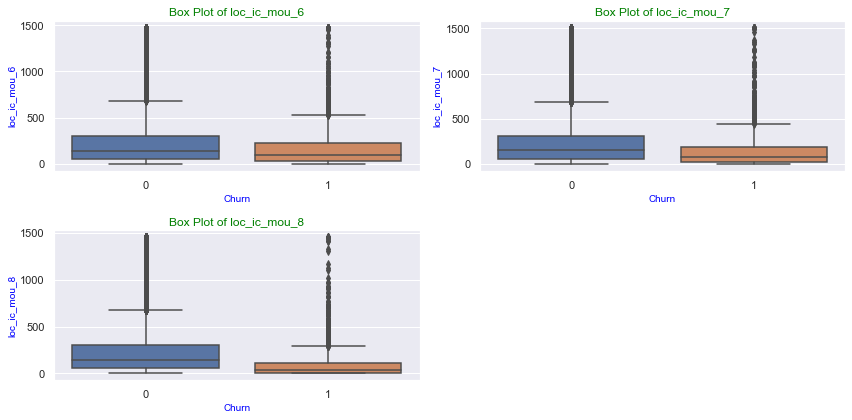

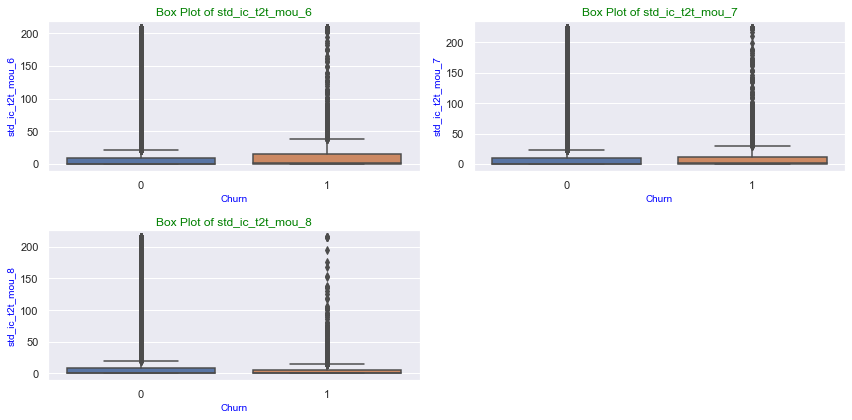

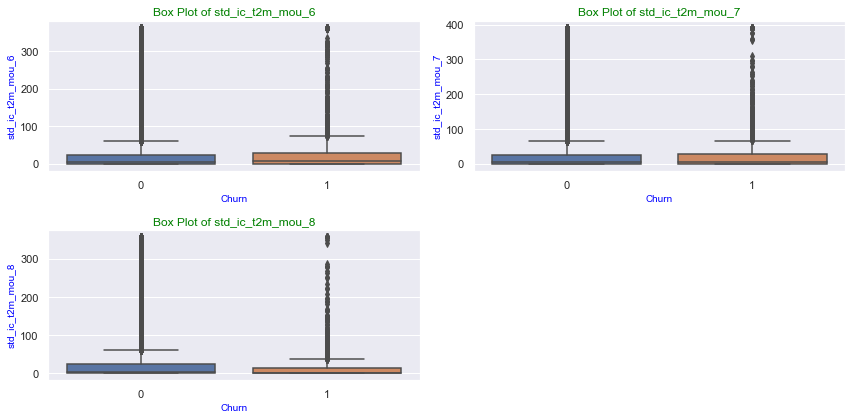

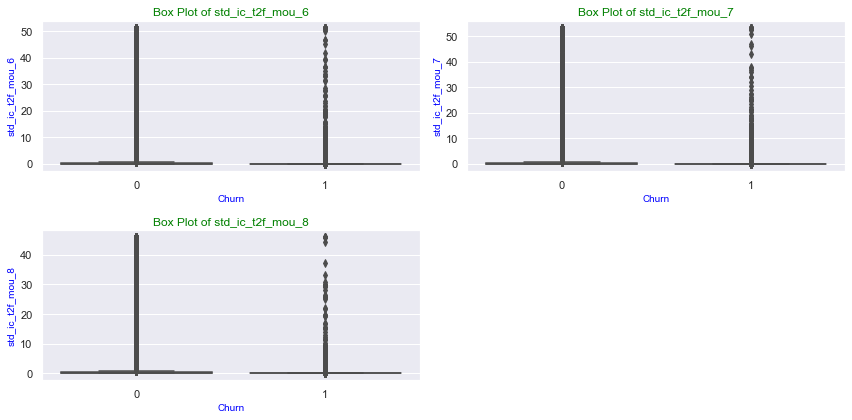

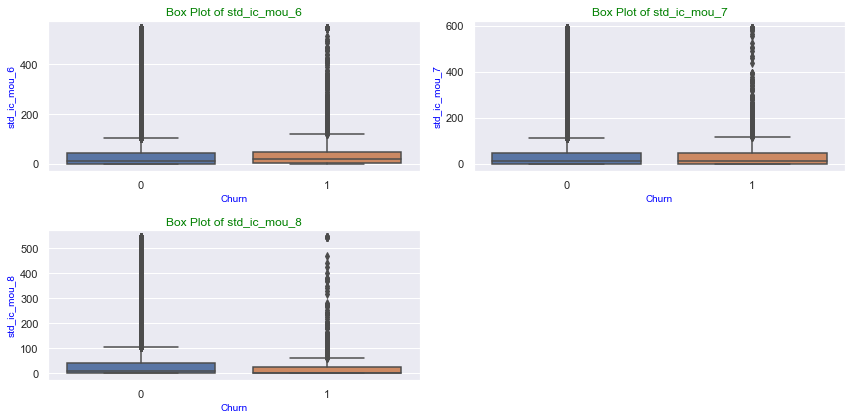

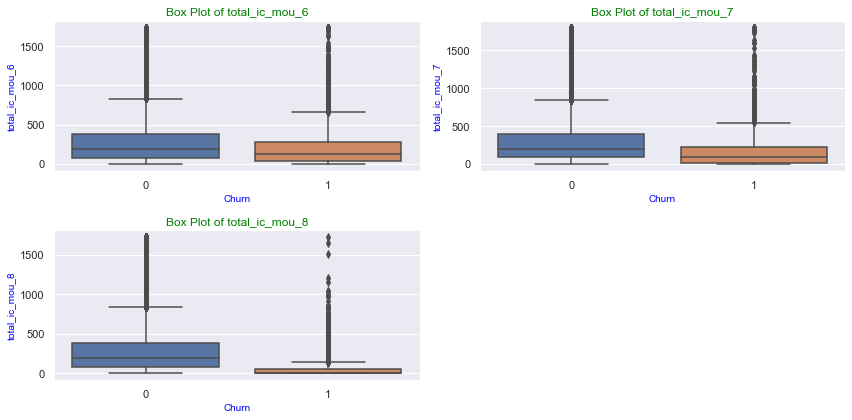

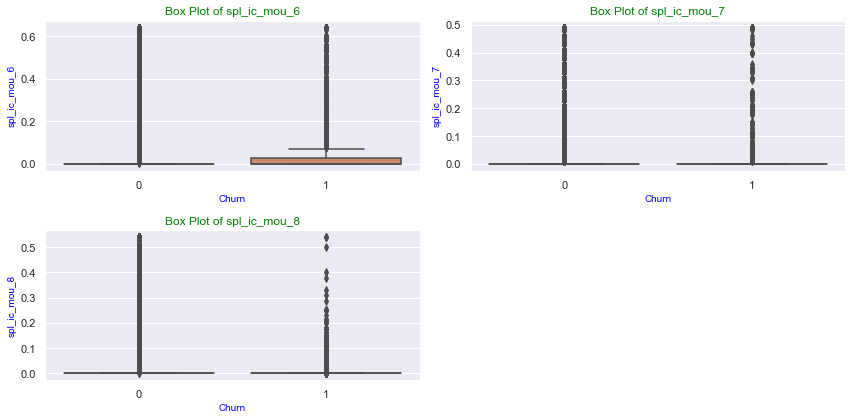

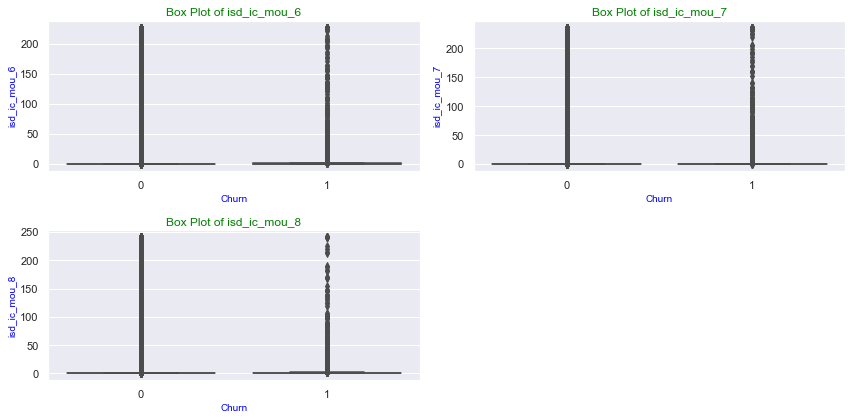

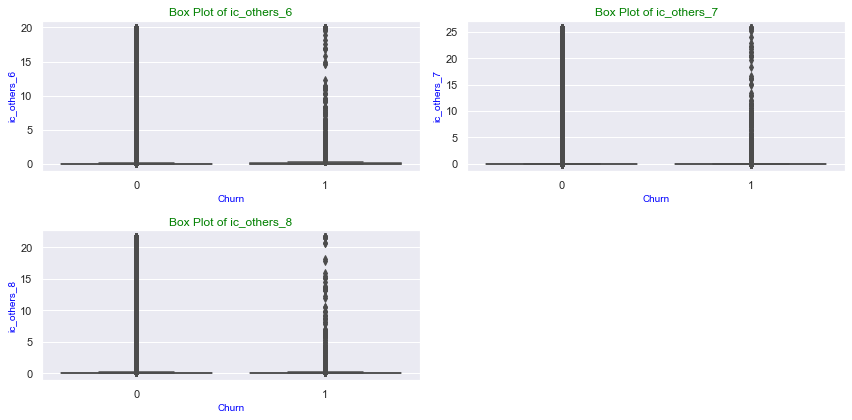

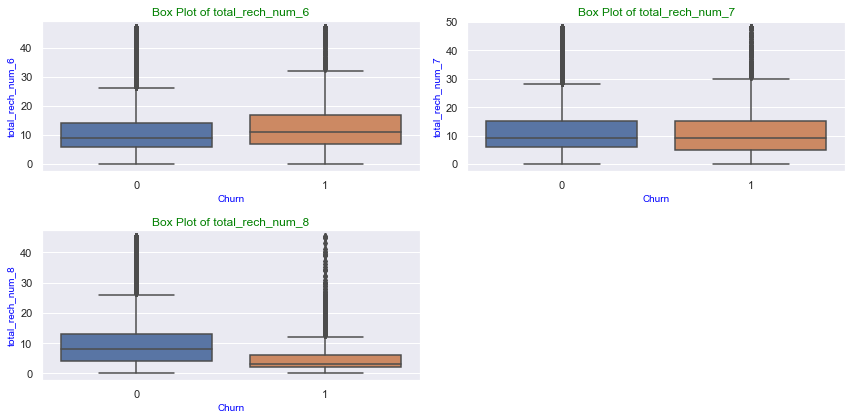

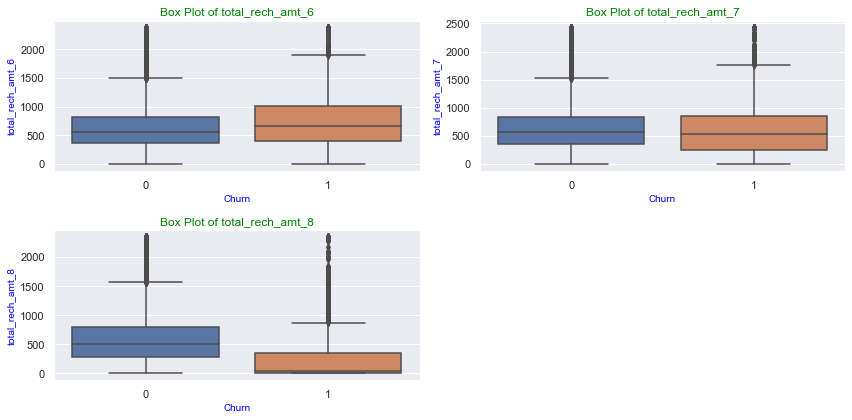

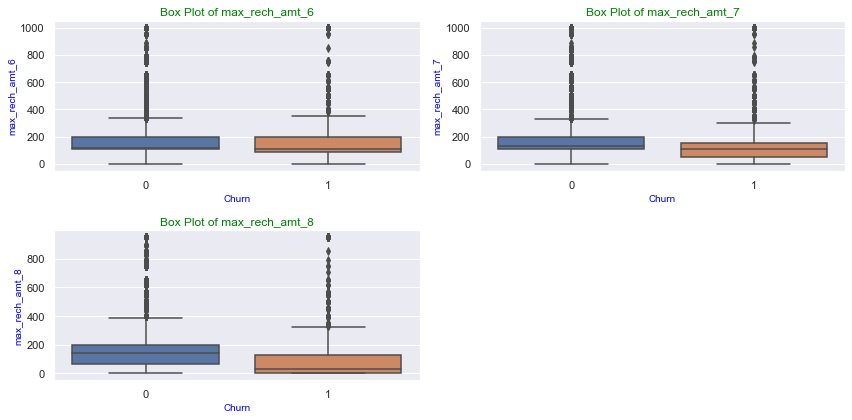

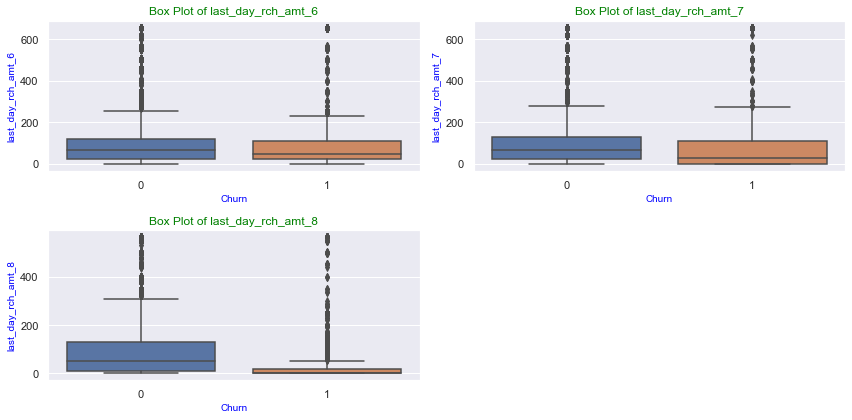

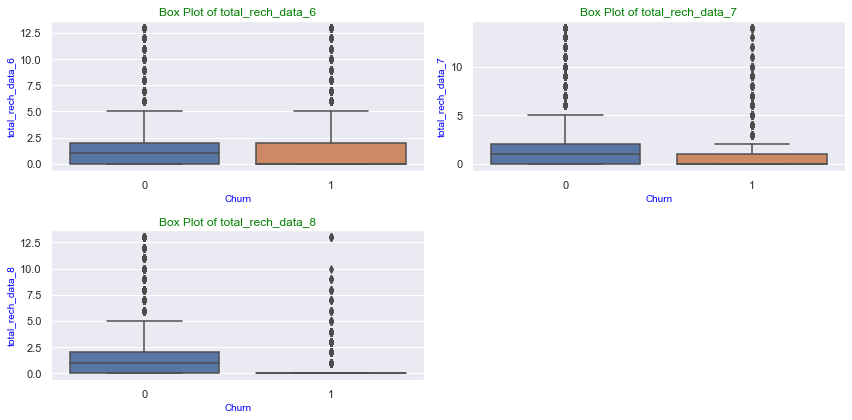

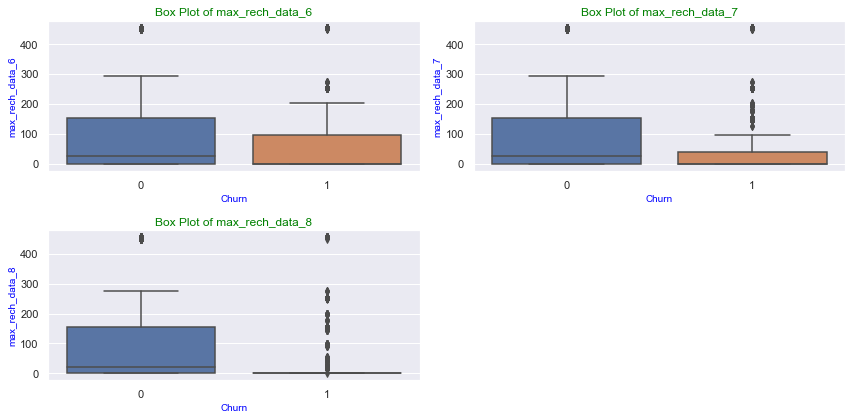

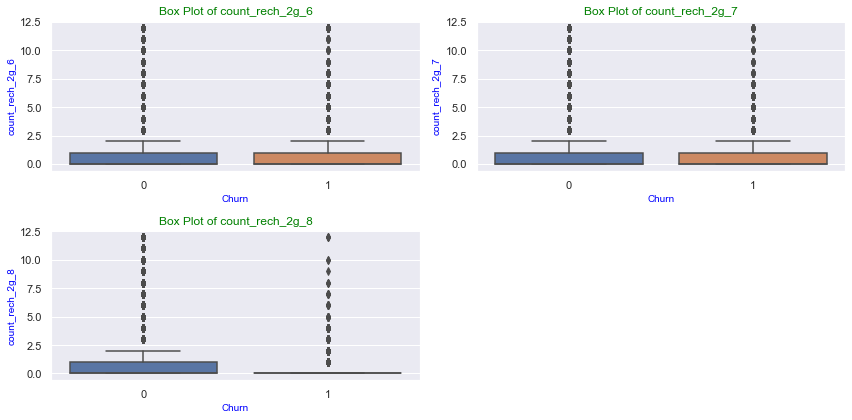

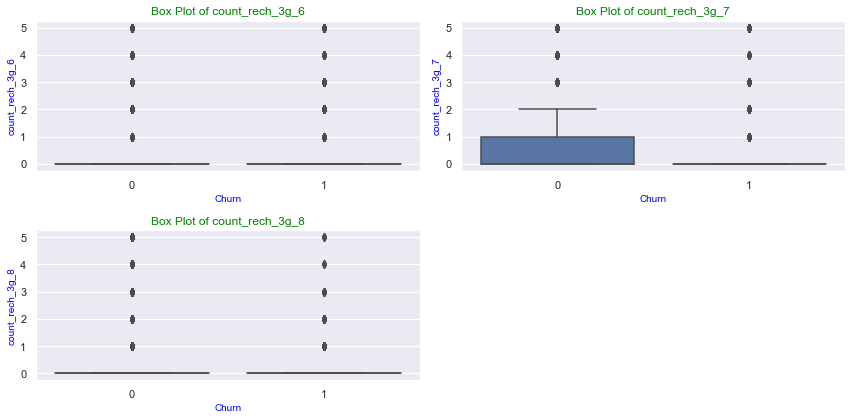

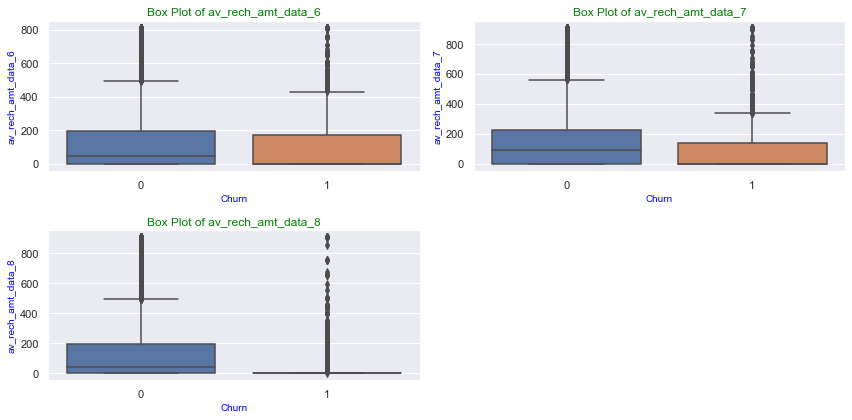

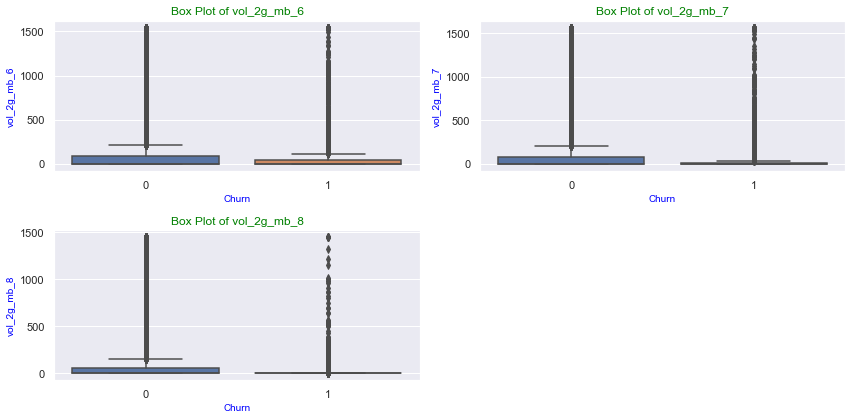

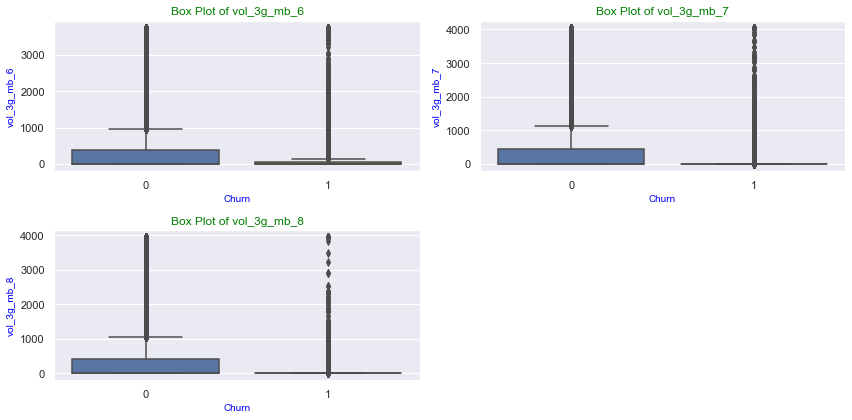

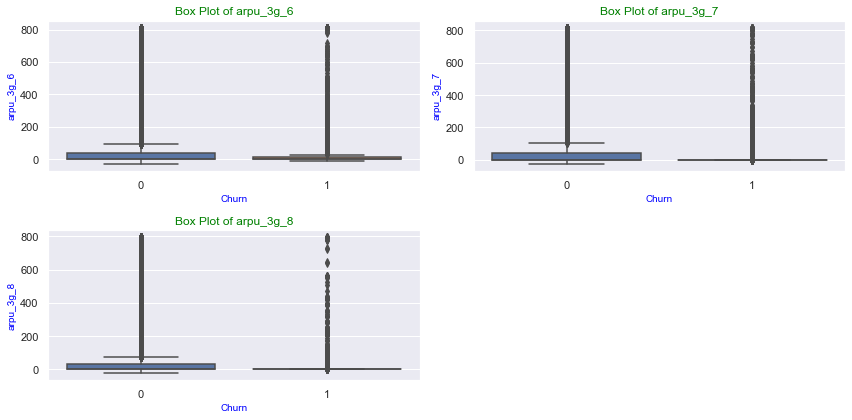

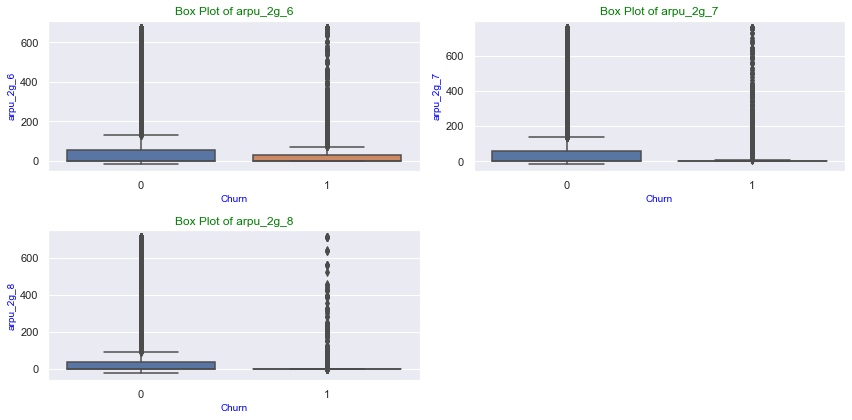

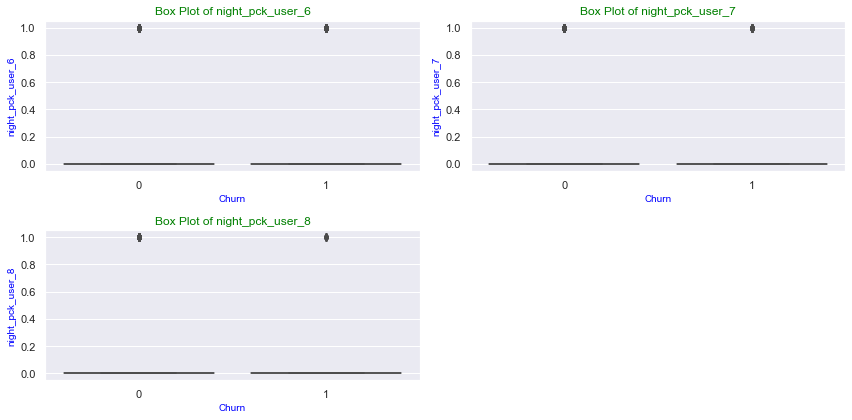

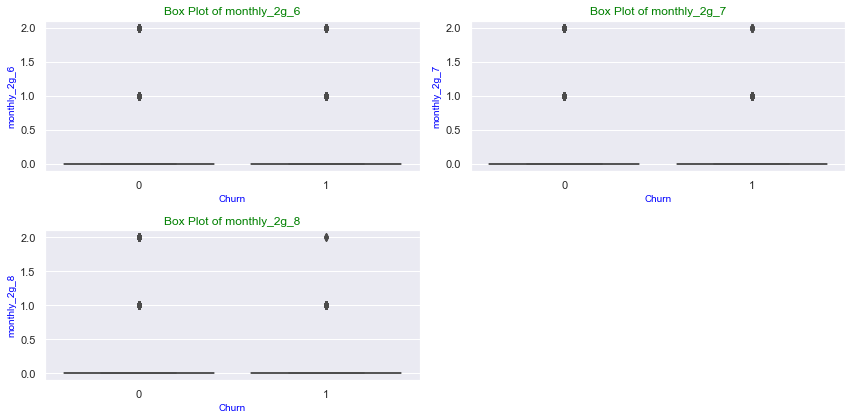

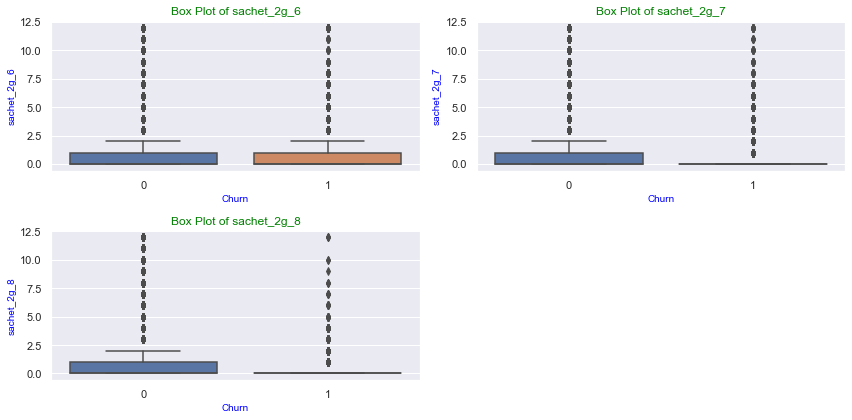

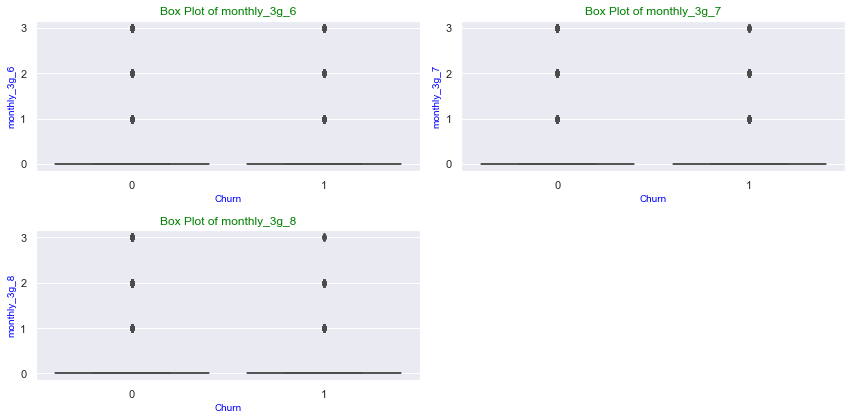

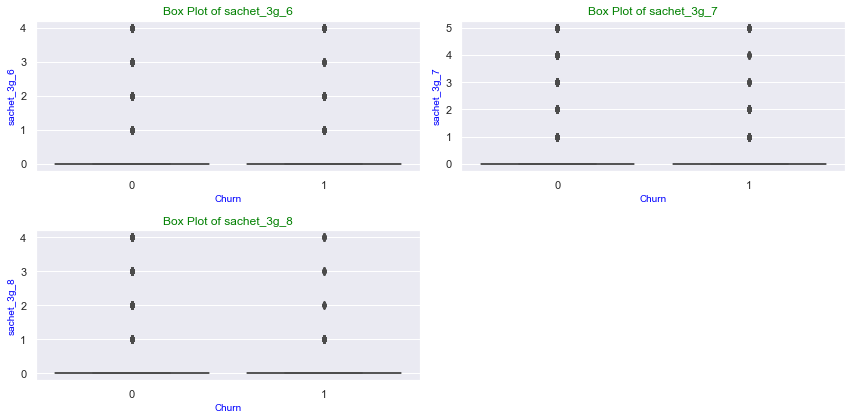

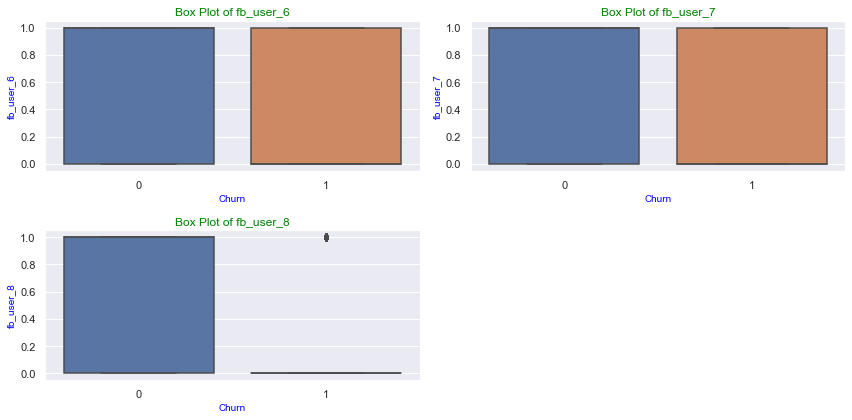

In [46]:
#Checking the Box plot of the columns.
for col in month_col:
    Numeric_UnivBoxplot(Telecom_Highchurn_df,col,'Churn')

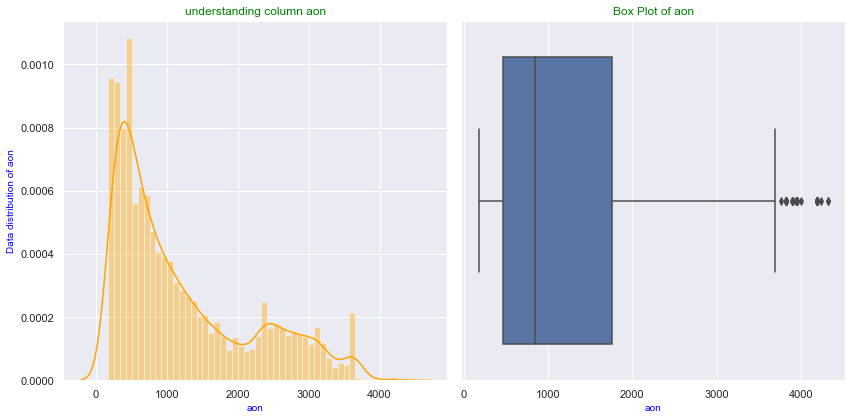

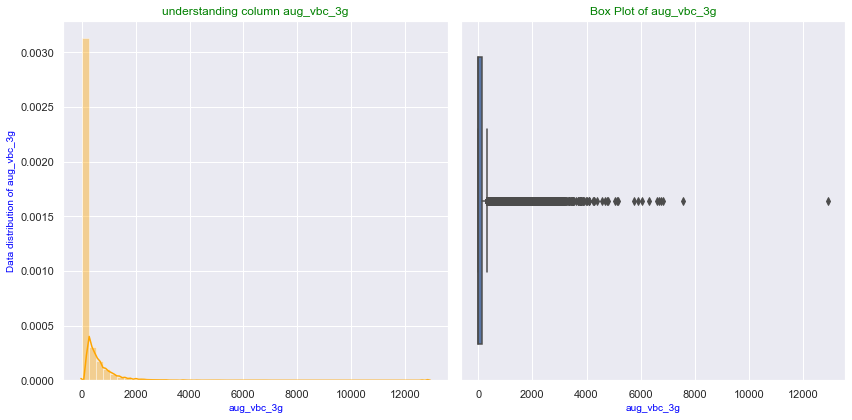

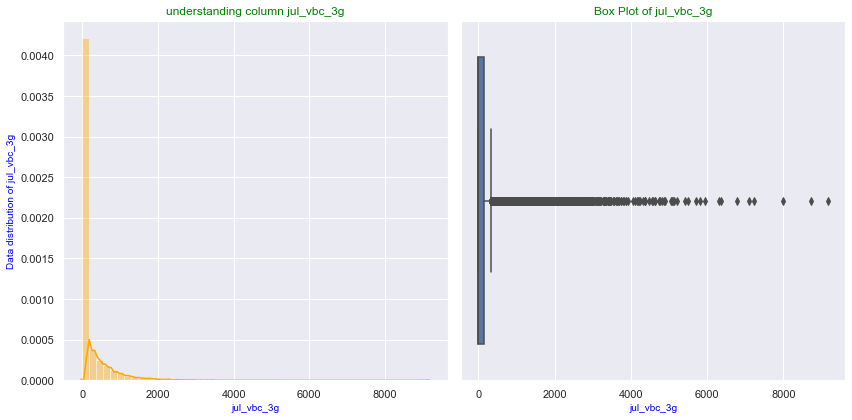

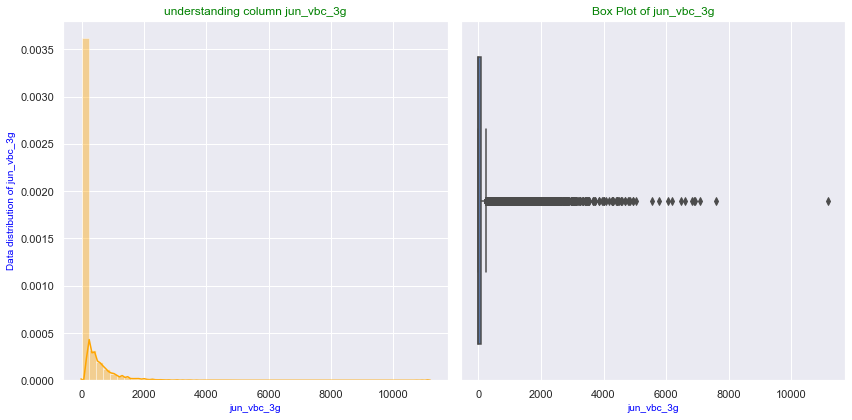

In [47]:
#checking box plot of remaining column:
remn_coln = ['aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']
for col in remn_coln:
    Numeric_distplot(Telecom_Highchurn_df,col)

In [48]:
#Capping the outliers of remaining coulmn.
for col in remn_coln:
    q4 = Telecom_Highchurn_df[col].quantile(0.99)
    Telecom_Highchurn_df[col][Telecom_Highchurn_df[col]>=q4] = q4

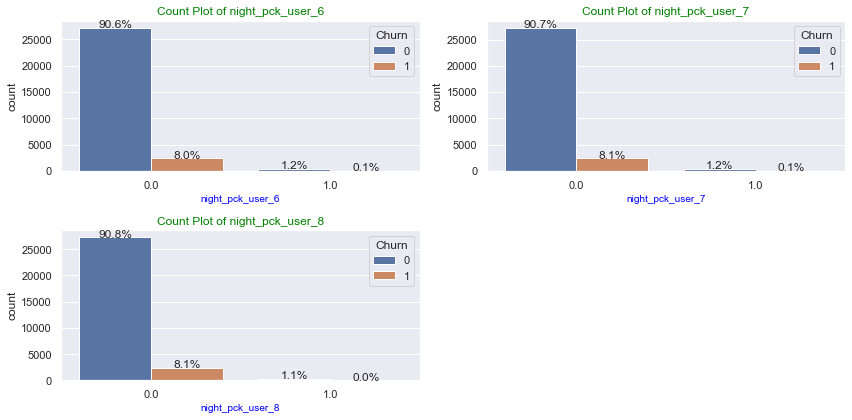

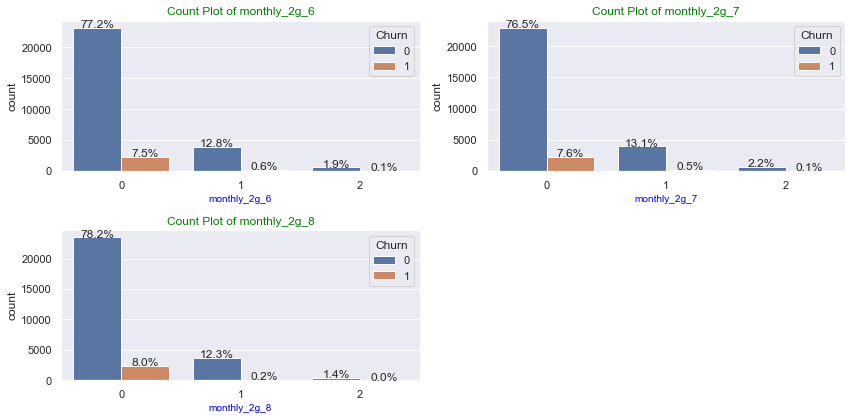

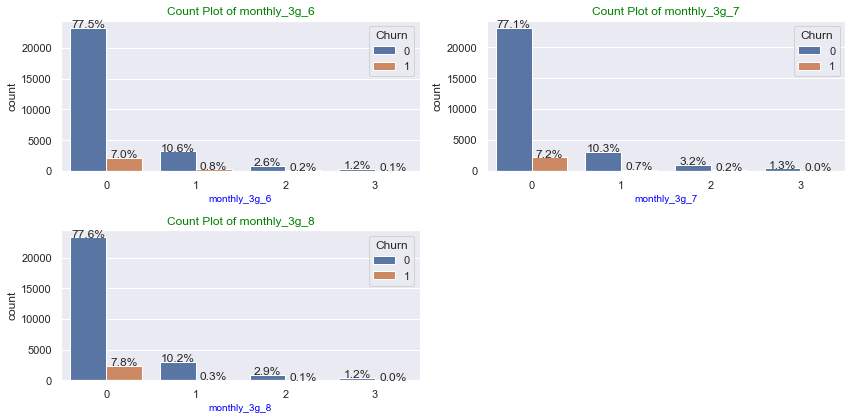

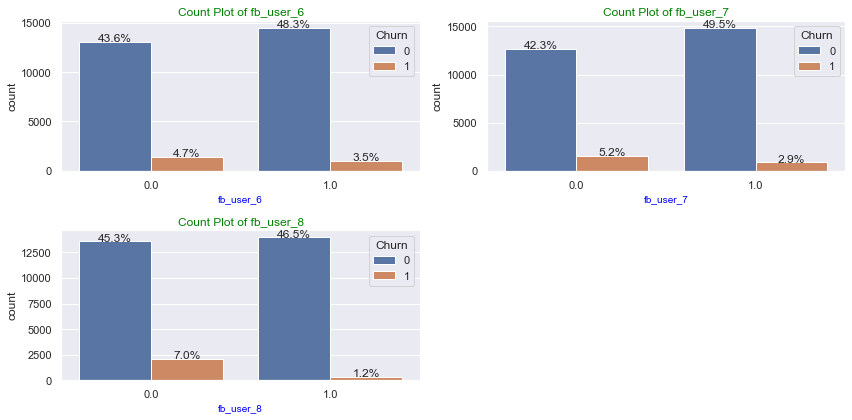

In [49]:
cat_col = ['night_pck_user','monthly_2g','monthly_3g','fb_user']

def catplot(df,col):
    plt.figure(figsize=[12,6])
    
    ax1 = plt.subplot(2,2,1)
    sns.countplot(x=col+'_6',hue='Churn',data=df)
    plt.title("Count Plot of {}_6".format(col),color='green',fontsize =12)
    plt.xlabel("{}_6".format(col),color='blue',fontsize =10)
    for pt in ax1.patches:
        height = pt.get_height()
        ax1.text(pt.get_x()+pt.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(height/len(df) * 100),
                ha="center")
        
    ax2 = plt.subplot(2,2,2)
    sns.countplot(x=col+'_7',hue='Churn',data=df)
    plt.title("Count Plot of {}_7".format(col),color='green',fontsize =12)
    plt.xlabel("{}_7".format(col),color='blue',fontsize =10)
    for pt in ax2.patches:
        height = pt.get_height()
        ax2.text(pt.get_x()+pt.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(height/len(df) * 100),
                ha="center")
        
    ax3 = plt.subplot(2,2,3)
    sns.countplot(x=col+'_8',hue='Churn',data=df)
    plt.title("Count Plot of {}_8".format(col),color='green',fontsize =12)
    plt.xlabel("{}_8".format(col),color='blue',fontsize =10)
    for pt in ax3.patches:
        height = pt.get_height()
        ax3.text(pt.get_x()+pt.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(height/len(df) * 100),
                ha="center")
        
    plt.tight_layout()
    plt.show();
     
for col in cat_col:
    catplot(Telecom_Highchurn_df,col)

Observation :
1. 'arpu' : Churned customers ARPU (Average Revenue per User) has dropped in 8th month.

2. 'onnet_mou': Churned customers onnet mintes of usage has dropped in 8th month.
3. 'offnet_mou': Churned customers offnet mintes of usage has dropped in 8th month.

4. 'roam_ic_mou','roam_og_mou' : Churned customers uses more roaming calls incoming as well as ootgoing .

5. 'loc_og_t2t_mou','loc_og_t2m_mou' : Churned customers outgoing calls has dropped in 8th month.

6. 'loc_og_t2f_mou': Churned customers outgoing calls to fixed lines is comparatively lesser.
7. 'loc_og_t2c_mou': Churned Customers have contacted more to customer care  .

8. 'loc_og_mou': Churned Customers outgoing calls have been dropping over a month.

9. 'std_og_t2t_mou','std_og_t2m_mou': Churned customers have higher STD calls usage but it has dropped in 8th month .

10. 'std_og_mou': Churned customers have higher STD usage but it has dropped in 8th month.

11. 'total_og_mou': Churned Customers outgoing calls usage have been dropping over a month and has dropped significantly in 8th month.

12. 'loc_ic_t2t_mou','loc_ic_t2m_mou': Churned customers incoming  call usage has dropped in 8th month.

13. 'loc_ic_mou': Churned customers incoming  call usage has dropped in 8th month.

14. 'std_ic_t2t_mou','std_ic_t2m_mou' : Churned Customers incoming call usage have been dropping over a month and has dropped significantly in 8th month.

15. 'std_ic_mou','total_ic_mou': Churned Customers STD incoming call usage have been dropping over a month and has dropped significantly in 8th month.

16. 'total_rech_num': Churned Customers recharge number have been dropping over a month and has dropped significantly in 8th month.

17. 'total_rech_amt': Churned customers total recharge amount has dropped in 8th month.

18. 'max_rech_amt': Churned customers max recharge amount has dropped in 8th month.

19. 'last_day_rch_amt': Churned customers last day recharge amount has dropped in 8th month.

20. 'total_rech_data': Churned Customers total recharge data have been dropping over a month and has dropped significantly in 8th month.

21. 'max_rech_data': Churned Customers Max recharge data have been dropping over a month and has dropped significantly in 8th month.

22. 'count_rech_2g': Churned customers count recharge has dropped in 8th month.

23. 'av_rech_amt_data': Churned Customers average recharge amount on data have been dropping over a month and has dropped significantly in 8th month.

24. 'vol_2g_mb','vol_3g_mb' : Churned Customers volume of data have been dropping over a month and has dropped significantly in 8th month.

 25. 'arpu_3g','arpu_2g': Churned Customers ARPU (Average Revenue per User) have been dropping over a month and has dropped significantly in 8th month.

26. 'night_pck_user': data column has High data imbalance.

27. 'fb_user': Churned customers Fb usage has dropped in 8th month.

### 3.5 Feature Engineering.

Combining t2t and t2m network over months since they exhibit similar behaviour with respect to data distribution.

1. 'loc_og_t2t_mou'+'loc_og_t2m_mou' -->'loc_og_t2m_t2t_mou'
2. 'std_og_t2t_mou'+'std_og_t2m_mou' -->'std_og_t2m_t2t_mou'
3. 'loc_ic_t2t_mou'+'loc_ic_t2m_mou' -->'loc_ic_t2m_t2t_mou'
4. 'std_ic_t2t_mou'+'std_ic_t2m_mou' -->'std_ic_t2m_t2t_mou'


Combining 2g and 3g data over months since they exhibit similar behaviour with respect to data distribution.

1. 'vol_2g_mb','vol_3g_mb' --> 'vol_2g_3g_mb'
2. 'arpu_2g','arpu_3g'     --> 'arpu_2g_3g'

In [50]:
#combing the data coulumns.

for col_num in range(6,9):
    Telecom_Highchurn_df['loc_og_t2m_t2t_mou'+'_'+str(col_num)] = (Telecom_Highchurn_df['loc_og_t2t_mou'+'_'+str(col_num)]
                                                                  +Telecom_Highchurn_df['loc_og_t2m_mou'+'_'+str(col_num)])
    Telecom_Highchurn_df['std_og_t2m_t2t_mou'+'_'+str(col_num)] = (Telecom_Highchurn_df['std_og_t2t_mou'+'_'+str(col_num)]
                                                                  +Telecom_Highchurn_df['std_og_t2m_mou'+'_'+str(col_num)])
    Telecom_Highchurn_df['loc_ic_t2m_t2t_mou'+'_'+str(col_num)] = (Telecom_Highchurn_df['loc_ic_t2t_mou'+'_'+str(col_num)]
                                                                  +Telecom_Highchurn_df['loc_ic_t2m_mou'+'_'+str(col_num)])
    Telecom_Highchurn_df['std_ic_t2m_t2t_mou'+'_'+str(col_num)] = (Telecom_Highchurn_df['std_ic_t2t_mou'+'_'+str(col_num)]
                                                                  +Telecom_Highchurn_df['std_ic_t2m_mou'+'_'+str(col_num)])
        
    Telecom_Highchurn_df['vol_2g_3g_mb'+'_'+str(col_num)] = (Telecom_Highchurn_df['vol_2g_mb'+'_'+str(col_num)]
                                                            +Telecom_Highchurn_df['vol_3g_mb'+'_'+str(col_num)])
    Telecom_Highchurn_df['arpu_2g_3g'+'_'+str(col_num)] = (Telecom_Highchurn_df['arpu_2g'+'_'+str(col_num)]
                                                            +Telecom_Highchurn_df['arpu_3g'+'_'+str(col_num)])       

In [51]:
#Dropping columns after combing the features
drp_col=['loc_og_t2t_mou','loc_og_t2m_mou','std_og_t2t_mou','std_og_t2m_mou',
          'loc_ic_t2t_mou','loc_ic_t2m_mou','std_ic_t2t_mou','std_ic_t2m_mou',
          'vol_2g_mb','vol_3g_mb','arpu_2g','arpu_3g']

for col_num in range(6,9):
    for col in drp_col:
        Telecom_Highchurn_df.drop(columns =col+'_'+str(col_num),inplace=True)

In [52]:
#Checking the column shape.
Telecom_Highchurn_df.shape

(30001, 134)

### 4. Test-Train Split.

In [53]:
#Importing sklearn libraries.
from sklearn.model_selection import train_test_split

In [54]:
# Putting feature variable X.
X = Telecom_Highchurn_df.drop(['Churn'], axis=1)
X.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803        0.402         0.00         0.00   
1  1069.180  1349.850  1986.622       57.840        54.68        52.29   
2   378.721   492.223   137.362      413.690       351.03        35.08   
3   514.453   597.753   637.760      102.410       132.11        85.14   
4    74.350   193.897   366.966       48.960        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         2.176          2.21          0.00           0.00           0.00   
1       453.430        567.16        325.91          16.23          33.49   
2        94.660         80.63        136.48           0.00           0.00   
3       757.930        896.68        983.39           0.00           0.00   
4        85.410         89.36        205.89           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0              0.00              0.07              0.00             1.078   
1             62.13             55.14             53.23             0.000   
2              0.00              0.00              0.00             0.000   
3              0.75              0.00              1.58             0.000   
4              0.00              0.00              0.00             0.000   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0             0.566              0.00          1.50         0.176   
1             0.000              0.00        422.16       533.910   
2             0.000              7.15        378.09       288.180   
3             0.000              0.00         97.04        94.090   
4             0.000             17.71        131.91       133.680   

   loc_og_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0          0.00              0.00              0.00              0.00   
1        255.79              6.66             20.08             16.68   
2         63.04              0.00              0.00              0.00   
3        129.74              0.00              0.00              0.00   
4        182.14              0.00              0.00              0.00   

   std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
0          0.00          0.00          0.00           0.0          0.00   
1         60.86         75.14         77.84           0.0          0.18   
2        130.26        143.48         98.28           0.0          0.00   
3        763.29        934.69        938.79           0.0          0.00   
4          2.36          6.35         39.61           0.0          0.01   

   isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0          0.00          1.12         2.752          0.00        0.248   
1         10.01          4.50         0.000          6.50        0.000   
2          0.00          0.00         0.000         10.23        0.000   
3          0.00          0.00         0.000          0.00        0.000   
4          0.00          0.10         0.000         17.71        0.000   

   og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0          0.0          0.0            0.00            0.00            0.00   
1          0.0          0.0          487.53          609.24          350.16   
2          0.0          0.0          508.36          431.66          171.56   
3          0.0          0.0          860.34         1028.79         1068.54   
4          0.0          0.0          134.38          140.04          239.48   

   loc_ic_t2f_mou_

In [55]:
# Putting target variable to y.
y = Telecom_Highchurn_df['Churn']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Churn, dtype: int64

In [56]:
# Splitting the data into train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42,stratify = y)

In [57]:
# Printing shapes of train and test data
print('X_train.shape',X_train.shape)
print('X_test.shape',X_test.shape)
print('y_train.shape',y_train.shape)
print('y_test.shape',y_test.shape)
print('Churn Train%',round(y_train.mean()*100,2),'Non-churn Train%',round((1-y_train.mean())*100,2))
print('Churn Test%',round(y_test.mean()*100,2),'Non-churn Test%',round((1-y_test.mean())*100,2))

X_train.shape (24000, 133)
X_test.shape (6001, 133)
y_train.shape (24000,)
y_test.shape (6001,)
Churn Train% 8.14 Non-churn Train% 91.86
Churn Test% 8.13 Non-churn Test% 91.87


In [58]:
#SMOTE for balancing the data.

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)

# Printing shapes of train and test data
print('X_train.shape',X_train_sm.shape)

print('y_train.shape',y_train_sm.shape)

print('Churn Train%',round(y_train_sm.mean()*100,2),'Non-churn Train%',round((1-y_train_sm.mean())*100,2))

X_train.shape (44094, 133)
y_train.shape (44094,)
Churn Train% 50.0 Non-churn Train% 50.0


### 5. Feature Scaling.

In [59]:
#Importing sklearn StandardScaler.
from sklearn.preprocessing import StandardScaler

In [60]:
#Scaling features.
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [61]:
#SMOTE scaling features.
scaler_sm = StandardScaler()

X_train_sm = scaler_sm.fit_transform(X_train_sm)

X_test_sm = scaler_sm.transform(X_test)

### 6. Model Building.

#### 6.1 PCA - Dimensionality reduction.

In [62]:
from sklearn.decomposition import PCA

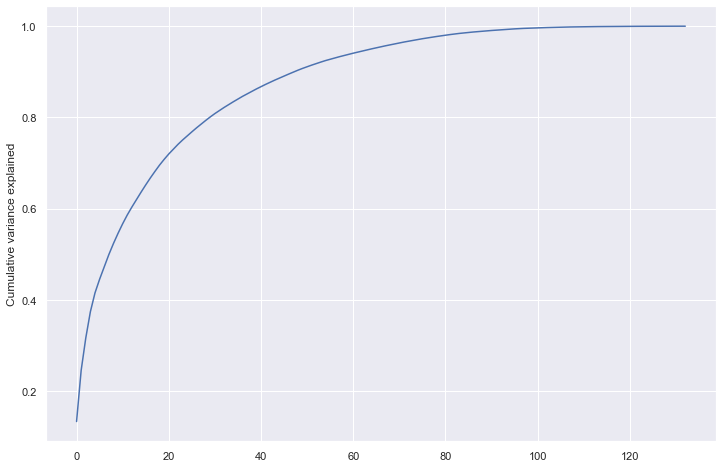

In [63]:
# Running PCA on Train data.
pca = PCA(random_state=42)
pca.fit(X_train)

var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

- Pca components of more than 60 gives a data variance more than 90 percent.

In [64]:
# Importing libraries.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



#### 6.2 PCA with Logistic Regression.

In [65]:
#PCA
pca = PCA(random_state=42)

#Logistic regression with adjusted class weight to handle class imbalance.
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9},random_state=42)

# Pipelining PCA and Logistic regression.
PCA_Logistic = Pipeline([("pca", pca),("logistic", logistic)])

# Tuning Hyperparameter space.
params = {'pca__n_components': [60,70,80], 'logistic__C': [0.001,0.01,0.1, 0.5, 1, 5, 10,100]}

# Creating Stratified 5 fold to create balanced class.
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# GridSearchCV estimation
model_1 = GridSearchCV(estimator=PCA_Logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [66]:
#Fitting the model.
model_1.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100],
                         'pca__n_components': [60, 70, 80]},
             scoring='roc_auc', verbose=1)

In [67]:
#Cross validation outcome
CV1_df = pd.DataFrame(model_1.cv_results_)
CV1_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8        4.747427      0.118646         0.056903        0.013993   
11       4.624839      0.072171         0.054876        0.008022   
14       4.613724      0.062832         0.060166        0.015841   
17       4.776373      0.038759         0.051516        0.009867   
23       3.691209      0.701525         0.022079        0.010091   
20       4.779386      0.019559         0.063648        0.006711   
5        4.619449      0.226205         0.053725        0.006995   
7        3.983211      0.071178         0.059770        0.011924   
10       4.025268      0.064288         0.059634        0.018894   
13       3.988184      0.130318         0.060501        0.012945   
19       4.055358      0.103347         0.069662        0.010843   
16       3.930798      0.142519         0.064513        0.016938   
22       4.002956      0.125568         0.058046        0.012979   
4        3.760008      0.105855         0.052761        0.016245   
6        3.379567      0.348564         0.057402        0.010787   
9        3.368464      0.265868         0.055225        0.008589   
12       3.402864      0.082045         0.044623        0.004906   
15       3.354469      0.043259         0.051065        0.008208   
18       3.313137      0.113902         0.050635        0.009636   
21       3.272564      0.104479         0.051935        0.006462   
3        3.189629      0.281714         0.051250        0.004394   
2        4.282838      0.037626         0.045212        0.003246   
1        3.648324      0.288425         0.054633        0.012525   
0        3.029880      0.022246         0.055421        0.014254   

   param_logistic__C param_pca__n_components  \
8                0.1                      80   
11               0.5                      80   
14                 1                      80   
17                 5                      80   
23               100                      80   
20                10                      80   
5               0.01                      80   
7                0.1                      70   
10               0.5                      70   
13                 1                      70   
19                10                      70   
16                 5                      70   
22               100                      70   
4               0.01                      70   
6                0.1                      60   
9                0.5                      60   
12                 1                      60   
15                 5                      60   
18                10                      60   
21               100                      60   
3               0.01                      60   
2              0.001                      80   
1              0.001                      70   
0              0.001                      60   

                                             params  split0_test_score  \
8     {'logistic__C': 0.1, 'pca__n_components': 80}           0.882478   
11    {'logistic__C': 0.5, 'pca__n_components': 80}           0.882484   
14      {'logistic__C': 1, 'pca__n_components': 80}           0.882452   
17      {'logistic__C': 5, 'pca__n_components': 80}           0.882434   
23    {'logistic__C': 100, 'pca__n_components': 80}           0.882433   
20     {'logistic__C': 10, 'pca__n_components': 80}           0.882434   
5    {'logistic__C': 0.01, 'pca__n_components': 80}           0.881572   
7     {'logistic__C': 0.1, 'pca__n_components': 70}           0.878932   
10    {'logistic__C': 0.5, 'pca__n_components': 70}           0.878730   
13      {'logistic__C': 1, 'pca__n_components': 70}           0.878688   
19     {'logistic__C': 10, 'pca__n_components': 70}           0.878648   
16      {'logistic__C': 5, 'pca__n_components': 70}           0.878652   
22    {'logistic__C': 100, 'pca__n_components': 70}           0.878639   
4    {'logistic__C': 0.01, 'pca__n_components': 70}           0.87

In [68]:
#Checking Best Estimator model.
print("Best Parameters - ",model_1.best_params_)
print("Best Score - ",model_1.best_score_)
print("Best Estimator - ",model_1.best_estimator_)

Best Parameters -  {'logistic__C': 0.1, 'pca__n_components': 80}
Best Score -  0.8853610510235796
Best Estimator -  Pipeline(steps=[('pca', PCA(n_components=80, random_state=42)),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight={0: 0.1, 1: 0.9},
                                    random_state=42))])


In [69]:
#Obtaining the train Prediction dataframe.
y_train_Lrpred = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':model_1.predict_proba(X_train)[:,1]})
y_train_Lrpred

Churn  Churn_Prob
0          0    0.075830
1          0    0.039582
2          0    0.413724
3          0    0.080423
4          0    0.061235
...      ...         ...
23995      0    0.541548
23996      0    0.044427
23997      0    0.054203
23998      0    0.135649
23999      0    0.335653

[24000 rows x 2 columns]

In [70]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_Lrpred[i]= y_train_Lrpred.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_Lrpred.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.075830    1    0    0    0    0    0    0    0    0    0
1      0    0.039582    1    0    0    0    0    0    0    0    0    0
2      0    0.413724    1    1    1    1    1    0    0    0    0    0
3      0    0.080423    1    0    0    0    0    0    0    0    0    0
4      0    0.061235    1    0    0    0    0    0    0    0    0    0

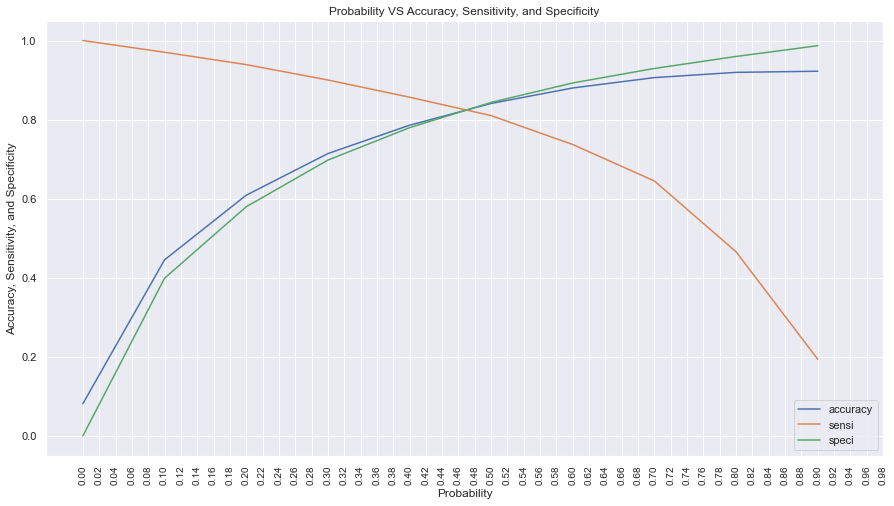

In [71]:
#Plotting Sensitivity Specificity and accuracy curve to decide optimal cut-off point.
def Sens_Acc_Spe_df(y_train_df):
    Sens_Acc_Spe_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_df.Churn,y_train_df[i])
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
    
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        Sens_Acc_Spe_df.loc[i] =[ i ,accuracy,sensi,speci]
    return(Sens_Acc_Spe_df)

cutoff1_df = Sens_Acc_Spe_df(y_train_Lrpred)
cutoff1_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(15,8))
plt.xticks(np.arange(0,1,step=.02), size=10,rotation =90)
plt.ylabel('Accuracy, Sensitivity, and Specificity')
plt.xlabel('Probability')
plt.title('Probability VS Accuracy, Sensitivity, and Specificity')
plt.show()

- Choosing 0.44 has optimal cut-off for the final prediction.Since, detection of churn customers is most important and thus model should have higher sensitivity rate. 

In [72]:
#Churn prediction using the optimal cut-off
y_train_Lrpred['Churn_LR_pred'] = y_train_Lrpred.Churn_Prob.map( lambda x: 1 if x > 0.44 else 0)
y_train_Lrpred.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0      0    0.075830    1    0    0    0    0    0    0    0    0    0   
1      0    0.039582    1    0    0    0    0    0    0    0    0    0   
2      0    0.413724    1    1    1    1    1    0    0    0    0    0   
3      0    0.080423    1    0    0    0    0    0    0    0    0    0   
4      0    0.061235    1    0    0    0    0    0    0    0    0    0   

   Churn_LR_pred  
0              0  
1              0  
2              0  
3              0  
4              0

In [73]:
# Function to Indicate accuracy,Sensitivity,Specificity,True-Positive rate,False-Positive rate of the model.
def Mod_evaluation(actual,predicted):
    # Checking the overall accuracy of the model.
    acc = metrics.accuracy_score(actual, predicted)
    print("Accuracy of model is ", round(acc,2))
    # Checking the confusion matrix of the model.
    conf = metrics.confusion_matrix(actual, predicted)
    TP = conf[1,1] # True Positive.
    TN = conf[0,0] # True Negative.
    FP = conf[0,1] # False Positive.
    FN = conf[1,0] # False Negative.
    # Sensitivity of the Model.
    print("Sensitivity of model is ", round(TP / float(TP+FN),2))
    # Specificity of the Model.
    print("Specificity of model is ", round(TN / float(TN+FP),2))
    # True-Positive rate of the Model.
    print("True-Positive rate of model is ", round(TP / float(TP+FN),2))
    # False-Positive rate of the Model. 
    print("False-Positive rate of model is ", round(FP / float(TN+FP),2))
    # precision score
    precision = precision_score(actual, predicted)
    print("precision_score is ", round(precision,2))
    # Recall Score.
    recall = recall_score(actual, predicted)
    print("recall_score is ", round(recall,2))
    # F1-score.
    f1_score = metrics.f1_score(actual, predicted, average='weighted')
    print("f1_score is ", round(f1_score,2))
    #Confusion Matrix.
    print("Confusion Matrix is: ")
    print(conf)

In [74]:
#Model Evaluation on train dataset.
Mod_evaluation(y_train_Lrpred.Churn, y_train_Lrpred.Churn_LR_pred)

Accuracy of model is  0.81
Sensitivity of model is  0.84
Specificity of model is  0.81
True-Positive rate of model is  0.84
False-Positive rate of model is  0.19
precision_score is  0.28
recall_score is  0.84
f1_score is  0.85
Confusion Matrix is: 
[[17800  4247]
 [  311  1642]]


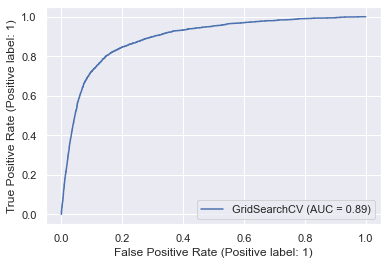

In [75]:
#Plotting ROC curve.
metrics.plot_roc_curve(model_1, X_train, y_train)
plt.show()

- ROC AUC is around 0.89 indicating better predictive model between the classes

#### 6.2.2. Making predictions on the test set.

In [76]:
#Obtaining the train Prediction dataframe.
y_test_Lrpred = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':model_1.predict_proba(X_test)[:,1]})
y_test_Lrpred

Churn  Churn_Prob
0         0    0.211368
1         0    0.494328
2         0    0.189713
3         1    0.773786
4         0    0.124435
...     ...         ...
5996      0    0.109710
5997      0    0.191289
5998      0    0.507214
5999      0    0.365765
6000      1    0.009691

[6001 rows x 2 columns]

In [77]:
#Churn prediction using the optimal cut-off
y_test_Lrpred['Churn_LR_pred'] = y_test_Lrpred.Churn_Prob.map( lambda x: 1 if x > 0.44 else 0)
y_test_Lrpred.head()

Churn  Churn_Prob  Churn_LR_pred
0      0    0.211368              0
1      0    0.494328              1
2      0    0.189713              0
3      1    0.773786              1
4      0    0.124435              0

In [78]:
#Model Evaluation on test dataset.
Mod_evaluation(y_test_Lrpred.Churn, y_test_Lrpred.Churn_LR_pred)

Accuracy of model is  0.81
Sensitivity of model is  0.84
Specificity of model is  0.81
True-Positive rate of model is  0.84
False-Positive rate of model is  0.19
precision_score is  0.28
recall_score is  0.84
f1_score is  0.85
Confusion Matrix is: 
[[4473 1040]
 [  77  411]]


- Model is performing good on both train and test data and thus this model can be used for evaluation.

#### 6.3. PCA with Random Forest

In [79]:
#PCA
pca = PCA(random_state=42)

#RandomForestClassifier with adjusted class weight to handle class imbalance.
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1, random_state=42)

# Pipelining PCA and RandomForestClassifier.
PCA_RF = Pipeline([("pca", pca),("forest", forest)])

# Tuning Hyperparameter space.
#params = {'pca__n_components': [80], 'forest__max_depth': [20,40],'forest__max_features': [10,20,40],
#          'forest__min_samples_leaf': [30,50],'forest__n_estimators': [30,60,80]}

params = {'pca__n_components': [80], 'forest__max_depth': [20,40],
        'forest__min_samples_leaf': [30,50],'forest__n_estimators': [100,200,300]}

# Creating Stratified 5 fold to create balanced class.
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# GridSearchCV estimation
model_2 = GridSearchCV(estimator=PCA_RF, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [80]:
#Fitting the model.
model_2.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('forest',
                                        RandomForestClassifier(class_weight={0: 0.1,
                                                                             1: 0.9},
                                                               n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'forest__max_depth': [20, 40],
                         'forest__min_samples_leaf': [30, 50],
                         'forest__n_estimators': [100, 200, 300],
                         'pca__n_components': [80]},
             scoring='roc_auc', verbose=1)

In [81]:
#Cross validation outcome
CV_2_df = pd.DataFrame(model_2.cv_results_)
CV_2_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8       58.049685      3.829006         4.037631        0.994382   
2       55.685371      0.988901         3.659139        1.070517   
1       37.635981      1.505774         4.345909        0.896525   
7       41.816842      0.432154         4.281047        0.427263   
6       25.236076      2.974008         3.192946        0.572904   
0       22.944306      2.512621         3.626295        0.737074   
5       54.041324      2.887089         4.324496        1.377751   
11      47.724130      4.110275         1.416981        0.948550   
4       36.883466      3.121235         4.449205        1.046066   
10      36.661573      0.982280         4.894351        0.291961   
3       24.056359      2.773474         2.601105        1.076052   
9       25.105435      2.484200         3.486553        0.896408   

   param_forest__max_depth param_forest__min_samples_leaf  \
8                       40                             30   
2                       20                             30   
1                       20                             30   
7                       40                             30   
6                       40                             30   
0                       20                             30   
5                       20                             50   
11                      40                             50   
4                       20                             50   
10                      40                             50   
3                       20                             50   
9                       40                             50   

   param_forest__n_estimators param_pca__n_components  \
8                         300                      80   
2                         300                      80   
1                         200                      80   
7                         200                      80   
6                         100                      80   
0                         100                      80   
5                         300                      80   
11                        300                      80   
4                         200                      80   
10                        200                      80   
3                         100                      80   
9                         100                      80   

                                               params  split0_test_score  \
8   {'forest__max_depth': 40, 'forest__min_samples...           0.877900   
2   {'forest__max_depth': 20, 'forest__min_samples...           0.877749   
1   {'forest__max_depth': 20, 'forest__min_samples...           0.877835   
7   {'forest__max_depth': 40, 'forest__min_samples...           0.877877   
6   {'forest__max_depth': 40, 'forest__min_samples...           0.875810   
0   {'forest__max_depth': 20, 'forest__min_samples...           0.875846   
5   {'forest__max_depth': 20, 'forest__min_samples...           0.876332   
11  {'forest__max_depth': 40, 'forest__min_samples...           0.876332   
4   {'forest__max_depth': 20, 'forest__min_samples...           0.877052   
10  {'forest__max_depth': 40, 'forest__min_samples...           0.877052   
3   {'forest__max_depth': 20, 'forest__min_samples...           0.875772   
9   {'forest__max_depth': 40, 'forest__min_samples...           0.875772   

    split1_test_score  split2_test_score  split3_test_score  \
8            0.884018           0.880281           0.870544   
2            0.884080           0.880336           0.870641   
1            0.884119           0.878540           0.870622   
7            0.884173           0.878509           0.870425   
6            0.884886           0.877249           0.869452   
0            0.884782           0.877219           0.869452   
5            0.882258           0.877932           0.870229   
11           0.882262           0.877966           0.870134   
4            0.882665      

In [82]:
#Checking Best Estimator model.
print("Best Parameters - ",model_2.best_params_)
print("Best Score - ",model_2.best_score_)
print("Best Estimator - ",model_2.best_estimator_)

Best Parameters -  {'forest__max_depth': 40, 'forest__min_samples_leaf': 30, 'forest__n_estimators': 300, 'pca__n_components': 80}
Best Score -  0.8775699028373024
Best Estimator -  Pipeline(steps=[('pca', PCA(n_components=80, random_state=42)),
                ('forest',
                 RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                        max_depth=40, min_samples_leaf=30,
                                        n_estimators=300, n_jobs=-1,
                                        random_state=42))])


In [83]:
#Obtaining the train Prediction dataframe.
y_train_RFpred = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':model_2.predict_proba(X_train)[:,1]})
y_train_RFpred

Churn  Churn_Prob
0          0    0.148466
1          0    0.105520
2          0    0.213185
3          0    0.273441
4          0    0.201676
...      ...         ...
23995      0    0.557679
23996      0    0.032818
23997      0    0.110158
23998      0    0.277780
23999      0    0.172241

[24000 rows x 2 columns]

In [84]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_RFpred[i]= y_train_RFpred.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_RFpred.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.148466    1    1    0    0    0    0    0    0    0    0
1      0    0.105520    1    1    0    0    0    0    0    0    0    0
2      0    0.213185    1    1    1    0    0    0    0    0    0    0
3      0    0.273441    1    1    1    0    0    0    0    0    0    0
4      0    0.201676    1    1    1    0    0    0    0    0    0    0

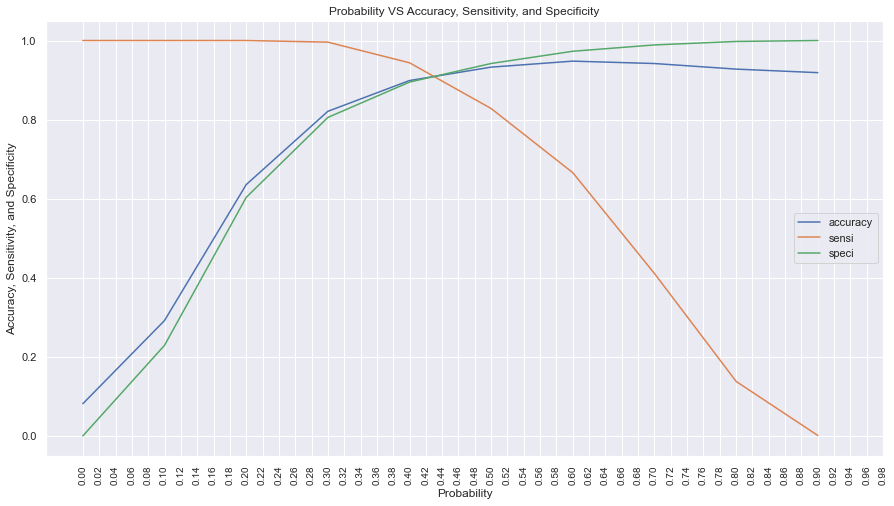

In [85]:
#Plotting Sensitivity Specificity and accuracy curve to decide optimal cut-off point.

cutoff2_df = Sens_Acc_Spe_df(y_train_RFpred)
cutoff2_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(15,8))
plt.xticks(np.arange(0,1,step=.02), size=10,rotation =90)
plt.ylabel('Accuracy, Sensitivity, and Specificity')
plt.xlabel('Probability')
plt.title('Probability VS Accuracy, Sensitivity, and Specificity')
plt.show()

- Choosing 0.32 has optimal cut-off for the final prediction.Since, detection of churn customers is most important and thus model should have higher sensitivity rate. 

In [86]:
#Churn prediction using the optimal cut-off
y_train_RFpred['Churn_RF_pred'] = y_train_RFpred.Churn_Prob.map( lambda x: 1 if x > 0.32 else 0)
y_train_RFpred.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0      0    0.148466    1    1    0    0    0    0    0    0    0    0   
1      0    0.105520    1    1    0    0    0    0    0    0    0    0   
2      0    0.213185    1    1    1    0    0    0    0    0    0    0   
3      0    0.273441    1    1    1    0    0    0    0    0    0    0   
4      0    0.201676    1    1    1    0    0    0    0    0    0    0   

   Churn_RF_pred  
0              0  
1              0  
2              0  
3              0  
4              0

In [87]:
#Model Evaluation on train dataset.
Mod_evaluation(y_train_RFpred.Churn, y_train_RFpred.Churn_RF_pred)

Accuracy of model is  0.84
Sensitivity of model is  0.99
Specificity of model is  0.83
True-Positive rate of model is  0.99
False-Positive rate of model is  0.17
precision_score is  0.34
recall_score is  0.99
f1_score is  0.87
Confusion Matrix is: 
[[18279  3768]
 [   19  1934]]


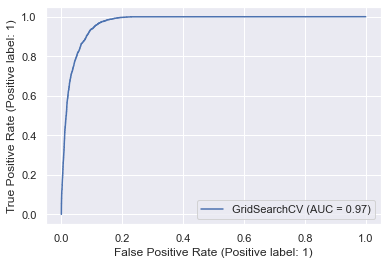

In [88]:
#Plotting ROC curve.
metrics.plot_roc_curve(model_2, X_train, y_train)
plt.show()

- ROC AUC is around 0.97 indicating better predictive model between the classes

#### 6.3.2. Making predictions on the test set.

In [89]:
#Obtaining the train Prediction dataframe.
y_test_RFpred = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':model_2.predict_proba(X_test)[:,1]})
y_test_RFpred

Churn  Churn_Prob
0         0    0.272776
1         0    0.304964
2         0    0.184591
3         1    0.520358
4         0    0.274116
...     ...         ...
5996      0    0.126908
5997      0    0.332815
5998      0    0.308815
5999      0    0.487854
6000      1    0.122411

[6001 rows x 2 columns]

In [90]:
#Churn prediction using the optimal cut-off
y_test_RFpred['Churn_RF_pred'] = y_test_RFpred.Churn_Prob.map( lambda x: 1 if x > 0.32 else 0)
y_test_RFpred.head()

Churn  Churn_Prob  Churn_RF_pred
0      0    0.272776              0
1      0    0.304964              0
2      0    0.184591              0
3      1    0.520358              1
4      0    0.274116              0

In [91]:
#Model Evaluation on test dataset.
Mod_evaluation(y_test_RFpred.Churn, y_test_RFpred.Churn_RF_pred)

Accuracy of model is  0.81
Sensitivity of model is  0.83
Specificity of model is  0.8
True-Positive rate of model is  0.83
False-Positive rate of model is  0.2
precision_score is  0.27
recall_score is  0.83
f1_score is  0.85
Confusion Matrix is: 
[[4433 1080]
 [  84  404]]


- Model is performing good on both train and test data and thus this model can be used for evaluation.

#### 6.4. PCA with XG Boost classifier.

In [92]:
#PCA
pca = PCA(random_state=42)

#XG Boost Classifier
xgb = XGBClassifier(learning_rate=0.01,objective='binary:logistic', n_jobs = -1, random_state=42)

# Pipelining PCA and XG Boost Classifier.
PCA_XGB = Pipeline([("pca", pca),("xgb", xgb)])

# Tuning Hyperparameter space.
params = {'pca__n_components': [80], 'xgb__max_depth': [5,8],'xgb__n_estimators': [200,400]}

# Creating Stratified 5 fold to create balanced class.
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# GridSearchCV estimation
model_3 = GridSearchCV(estimator=PCA_XGB, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [93]:
#Fitting the model.
model_3.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[19:09:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=0.01,
                                                      max_delta_s...
                                                    

In [94]:
#Cross validation outcome
CV_3_df = pd.DataFrame(model_3.cv_results_)
CV_3_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3     320.207810     38.927105         0.074724        0.024137   
1     253.193697     28.610867         0.103240        0.011568   
2     267.734342     30.486834         0.097424        0.017078   
0     147.975130      1.823397         0.124646        0.011001   

  param_pca__n_components param_xgb__max_depth param_xgb__n_estimators  \
3                      80                    8                     400   
1                      80                    5                     400   
2                      80                    8                     200   
0                      80                    5                     200   

                                              params  split0_test_score  \
3  {'pca__n_components': 80, 'xgb__max_depth': 8,...           0.880997   
1  {'pca__n_components': 80, 'xgb__max_depth': 5,...           0.876895   
2  {'pca__n_components': 80, 'xgb__max_depth': 8,...           0.869048   
0  {'pca__n_components': 80, 'xgb__max_depth': 5,...           0.863198   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
3           0.884250           0.878679           0.877005           0.871536   
1           0.880299           0.878483           0.874166           0.865767   
2           0.875442           0.862594           0.864448           0.858527   
0           0.869394           0.857953           0.852345           0.850003   

   mean_test_score  std_test_score  rank_test_score  
3         0.878493        0.004244                1  
1         0.875122        0.005093                2  
2         0.866012        0.005802                3  
0         0.858579        0.007087                4

In [95]:
#Checking Best Estimator model.
print("Best Parameters - ",model_3.best_params_)
print("Best Score - ",model_3.best_score_)
print("Best Estimator - ",model_3.best_estimator_)

Best Parameters -  {'pca__n_components': 80, 'xgb__max_depth': 8, 'xgb__n_estimators': 400}
Best Score -  0.8784934825003938
Best Estimator -  Pipeline(steps=[('pca', PCA(n_components=80, random_state=42)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=8,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=400,
                               n_jobs=-1, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
  

In [96]:
#Obtaining the train Prediction dataframe.
y_train_XGBpred = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':model_3.predict_proba(X_train)[:,1]})
y_train_XGBpred

Churn  Churn_Prob
0          0    0.013576
1          0    0.016070
2          0    0.034159
3          0    0.030845
4          0    0.035577
...      ...         ...
23995      0    0.108784
23996      0    0.015703
23997      0    0.026263
23998      0    0.019655
23999      0    0.032109

[24000 rows x 2 columns]

In [97]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_XGBpred[i]= y_train_XGBpred.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_XGBpred.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.013576    1    0    0    0    0    0    0    0    0    0
1      0    0.016070    1    0    0    0    0    0    0    0    0    0
2      0    0.034159    1    0    0    0    0    0    0    0    0    0
3      0    0.030845    1    0    0    0    0    0    0    0    0    0
4      0    0.035577    1    0    0    0    0    0    0    0    0    0

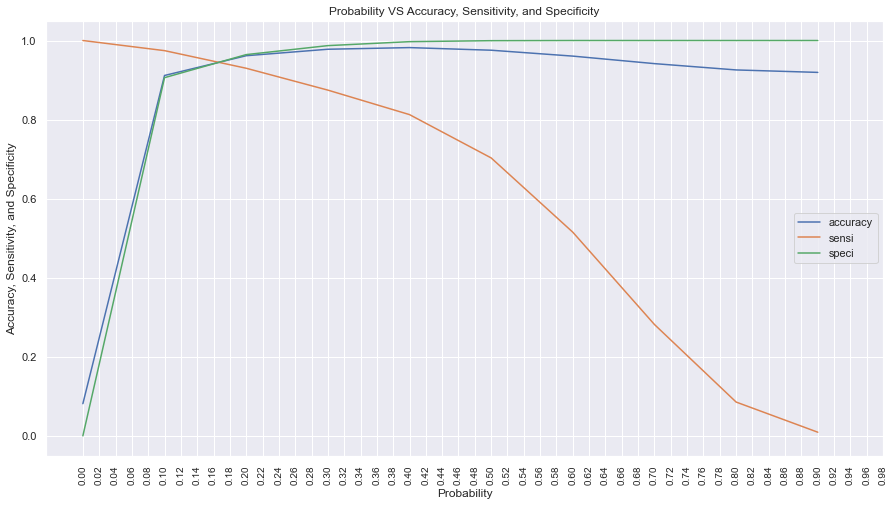

In [98]:
#Plotting Sensitivity Specificity and accuracy curve to decide optimal cut-off point.

cutoff3_df = Sens_Acc_Spe_df(y_train_XGBpred)
cutoff3_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(15,8))
plt.xticks(np.arange(0,1,step=.02), size=10,rotation =90)
plt.ylabel('Accuracy, Sensitivity, and Specificity')
plt.xlabel('Probability')
plt.title('Probability VS Accuracy, Sensitivity, and Specificity')
plt.show()

- Choosing 0.07 has optimal cut-off for the final prediction. Since, detection of churn customers is most important and thus model should have higher sensitivity rate.

In [99]:
#Churn prediction using the optimal cut-off
y_train_XGBpred['Churn_XGB_pred'] = y_train_XGBpred.Churn_Prob.map( lambda x: 1 if x > 0.07 else 0)
y_train_XGBpred.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0      0    0.013576    1    0    0    0    0    0    0    0    0    0   
1      0    0.016070    1    0    0    0    0    0    0    0    0    0   
2      0    0.034159    1    0    0    0    0    0    0    0    0    0   
3      0    0.030845    1    0    0    0    0    0    0    0    0    0   
4      0    0.035577    1    0    0    0    0    0    0    0    0    0   

   Churn_XGB_pred  
0               0  
1               0  
2               0  
3               0  
4               0

In [100]:
#Model Evaluation on train dataset.
Mod_evaluation(y_train_XGBpred.Churn, y_train_XGBpred.Churn_XGB_pred)

Accuracy of model is  0.87
Sensitivity of model is  0.99
Specificity of model is  0.86
True-Positive rate of model is  0.99
False-Positive rate of model is  0.14
precision_score is  0.38
recall_score is  0.99
f1_score is  0.89
Confusion Matrix is: 
[[18893  3154]
 [   24  1929]]


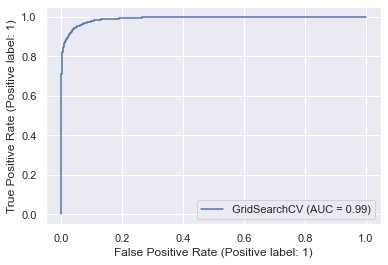

In [101]:
#Plotting ROC curve.
metrics.plot_roc_curve(model_3, X_train, y_train)
plt.show()

- ROC AUC is around 0.99 indicating better predictive model between the classes

#### 6.3.2. Making predictions on the test set.

In [102]:
#Obtaining the train Prediction dataframe.
y_test_XGBpred = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':model_3.predict_proba(X_test)[:,1]})
y_test_XGBpred

Churn  Churn_Prob
0         0    0.028104
1         0    0.050296
2         0    0.025875
3         1    0.193224
4         0    0.053155
...     ...         ...
5996      0    0.032629
5997      0    0.034913
5998      0    0.042476
5999      0    0.225693
6000      1    0.012757

[6001 rows x 2 columns]

In [103]:
#Churn prediction using the optimal cut-off
y_test_XGBpred['Churn_XGB_pred'] = y_test_XGBpred.Churn_Prob.map( lambda x: 1 if x > 0.07 else 0)
y_test_XGBpred.head()

Churn  Churn_Prob  Churn_XGB_pred
0      0    0.028104               0
1      0    0.050296               0
2      0    0.025875               0
3      1    0.193224               1
4      0    0.053155               0

In [104]:
#Model Evaluation on test dataset.
Mod_evaluation(y_test_XGBpred.Churn, y_test_XGBpred.Churn_XGB_pred)

Accuracy of model is  0.82
Sensitivity of model is  0.82
Specificity of model is  0.81
True-Positive rate of model is  0.82
False-Positive rate of model is  0.19
precision_score is  0.28
recall_score is  0.82
f1_score is  0.85
Confusion Matrix is: 
[[4491 1022]
 [  86  402]]


- Model is performing good on both train and test data and thus this model can be used for evaluation.

#### 6.4 SMOTE , PCA and Logistic Regression.

In [105]:
#PCA
pca = PCA(random_state=42)

#Logistic regression.
logistic = LogisticRegression(random_state=42,max_iter=1000)

# Pipelining PCA and Logistic regression.
SM_PCA_Logistic = Pipeline([("pca", pca),("logistic", logistic)])

# Tuning Hyperparameter space.
params = {'pca__n_components': [70],'logistic__C': [0.01,0.1,1,10,100,500]}

# Creating Stratified 5 fold to create balanced class.
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# GridSearchCV estimation
model_4 = GridSearchCV(estimator=SM_PCA_Logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [106]:
#Fitting the model.
model_4.fit(X_train_sm,y_train_sm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('logistic',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 10, 100, 500],
                         'pca__n_components': [70]},
             scoring='roc_auc', verbose=1)

In [107]:
#Cross validation outcome
CV4_df = pd.DataFrame(model_4.cv_results_)
CV4_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       8.872402      0.338436         0.067682        0.008693   
5       8.006373      1.474277         0.065790        0.025153   
3       8.870990      0.139781         0.095175        0.011158   
2       8.852651      0.187623         0.075228        0.013915   
1       8.714303      0.328863         0.105360        0.049683   
0       8.661866      0.126086         0.082733        0.012650   

  param_logistic__C param_pca__n_components  \
4               100                      70   
5               500                      70   
3                10                      70   
2                 1                      70   
1               0.1                      70   
0              0.01                      70   

                                           params  split0_test_score  \
4   {'logistic__C': 100, 'pca__n_components': 70}           0.916530   
5   {'logistic__C': 500, 'pca__n_components': 70}           0.916530   
3    {'logistic__C': 10, 'pca__n_components': 70}           0.916530   
2     {'logistic__C': 1, 'pca__n_components': 70}           0.916528   
1   {'logistic__C': 0.1, 'pca__n_components': 70}           0.916526   
0  {'logistic__C': 0.01, 'pca__n_components': 70}           0.916342   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
4           0.912169           0.917132           0.915917           0.918467   
5           0.912169           0.917132           0.915917           0.918467   
3           0.912168           0.917132           0.915917           0.918466   
2           0.912164           0.917133           0.915917           0.918463   
1           0.912150           0.917143           0.915909           0.918450   
0           0.911867           0.917165           0.915811           0.918238   

   mean_test_score  std_test_score  rank_test_score  
4         0.916043        0.002113                1  
5         0.916043        0.002113                2  
3         0.916043        0.002113                3  
2         0.916041        0.002114                4  
1         0.916036        0.002117                5  
0         0.915885        0.002169                6

In [108]:
#Checking Best Estimator model.
print("Best Parameters - ",model_4.best_params_)
print("Best Score - ",model_4.best_score_)
print("Best Estimator - ",model_4.best_estimator_)

Best Parameters -  {'logistic__C': 100, 'pca__n_components': 70}
Best Score -  0.9160430095253744
Best Estimator -  Pipeline(steps=[('pca', PCA(n_components=70, random_state=42)),
                ('logistic',
                 LogisticRegression(C=100, max_iter=1000, random_state=42))])


In [109]:
#Obtaining the train Prediction dataframe.
y_train_SMLRpred = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_Prob':model_4.predict_proba(X_train_sm)[:,1]})
y_train_SMLRpred 

Churn  Churn_Prob
0          0    0.035148
1          0    0.004948
2          0    0.395740
3          0    0.040972
4          0    0.096294
...      ...         ...
44089      1    0.867752
44090      1    0.894772
44091      1    0.148505
44092      1    0.064824
44093      1    0.917621

[44094 rows x 2 columns]

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_SMLRpred[i]= y_train_SMLRpred.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_SMLRpred.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.035148    1    0    0    0    0    0    0    0    0    0
1      0    0.004948    1    0    0    0    0    0    0    0    0    0
2      0    0.395740    1    1    1    1    0    0    0    0    0    0
3      0    0.040972    1    0    0    0    0    0    0    0    0    0
4      0    0.096294    1    0    0    0    0    0    0    0    0    0

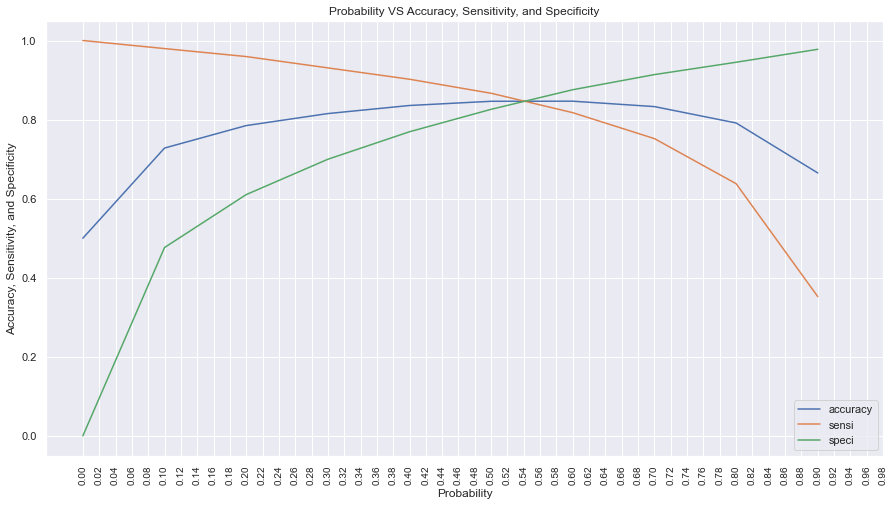

In [111]:
#Plotting Sensitivity Specificity and accuracy curve to decide optimal cut-off point.
cutoff4_df = Sens_Acc_Spe_df(y_train_SMLRpred)
cutoff4_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(15,8))
plt.xticks(np.arange(0,1,step=.02), size=10,rotation =90)
plt.ylabel('Accuracy, Sensitivity, and Specificity')
plt.xlabel('Probability')
plt.title('Probability VS Accuracy, Sensitivity, and Specificity')
plt.show()

- Choosing 0.38 has optimal cut-off for the final prediction.Since, detection of churn customers is most important and thus model should have higher sensitivity rate.

In [112]:
#Churn prediction using the optimal cut-off
y_train_SMLRpred['Churn_SMLR_pred'] = y_train_SMLRpred.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
y_train_SMLRpred.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0      0    0.035148    1    0    0    0    0    0    0    0    0    0   
1      0    0.004948    1    0    0    0    0    0    0    0    0    0   
2      0    0.395740    1    1    1    1    0    0    0    0    0    0   
3      0    0.040972    1    0    0    0    0    0    0    0    0    0   
4      0    0.096294    1    0    0    0    0    0    0    0    0    0   

   Churn_SMLR_pred  
0                0  
1                0  
2                0  
3                0  
4                0

In [113]:
#Model Evaluation on train dataset.
Mod_evaluation(y_train_SMLRpred.Churn, y_train_SMLRpred.Churn_SMLR_pred)

Accuracy of model is  0.84
Sensitivity of model is  0.88
Specificity of model is  0.8
True-Positive rate of model is  0.88
False-Positive rate of model is  0.2
precision_score is  0.82
recall_score is  0.88
f1_score is  0.84
Confusion Matrix is: 
[[17653  4394]
 [ 2544 19503]]


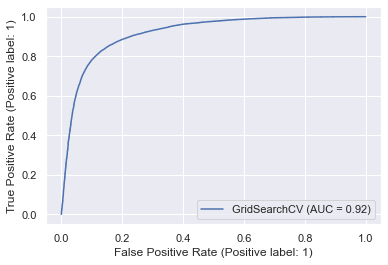

In [114]:
#Plotting ROC curve.
metrics.plot_roc_curve(model_4, X_train_sm, y_train_sm)
plt.show()

- ROC AUC is around 0.92 indicating better predictive model between the classes

#### 6.4.2. Making predictions on the test set.

In [115]:
#Obtaining the train Prediction dataframe.
y_test_SMLRpred = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':model_4.predict_proba(X_test_sm)[:,1]})
y_test_SMLRpred

Churn    Churn_Prob
0         0  4.080279e-01
1         0  1.856621e-02
2         0  2.597261e-01
3         1  7.105513e-01
4         0  1.458512e-01
...     ...           ...
5996      0  2.506894e-01
5997      0  1.802215e-01
5998      0  4.341136e-01
5999      0  1.707812e-01
6000      1  6.245688e-07

[6001 rows x 2 columns]

In [116]:
#Churn prediction using the optimal cut-off
y_test_SMLRpred['Churn_SMLR_pred'] = y_test_SMLRpred.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
y_test_SMLRpred.head()

Churn  Churn_Prob  Churn_SMLR_pred
0      0    0.408028                0
1      0    0.018566                0
2      0    0.259726                0
3      1    0.710551                1
4      0    0.145851                0

In [117]:
#Model Evaluation on test dataset.
Mod_evaluation(y_test_SMLRpred.Churn, y_test_SMLRpred.Churn_SMLR_pred)

Accuracy of model is  0.82
Sensitivity of model is  0.26
Specificity of model is  0.87
True-Positive rate of model is  0.26
False-Positive rate of model is  0.13
precision_score is  0.15
recall_score is  0.26
f1_score is  0.84
Confusion Matrix is: 
[[4789  724]
 [ 360  128]]


- Model is performing good on train data but not on test data and sensitivity is too small in test data and thus this model cannot be used for prediction

### 7. Comparing different models based on the performance.
#### Comparing Accuracy, Sensitivity and F1-score of the models.

    1. Train - data score 

| Model | Accuracy | Sensitivity | F1-score |
| --- | --- | --- | --- |
| PCA+LogisticRegression(Balanced Class) | 0.81 | 0.84 | 0.85 |
| PCA+RandomForestClassifier| 0.84 | 0.99 | 0.87 |
| PCA+XGBoostClassifier| 0.87 | 0.99 | 0.89 |


     2. Test - data score
    
| Model | Accuracy | Sensitivity | F1-score |
| --- | --- | --- | --- |
| PCA+LogisticRegression(Balanced Class) | 0.81 | 0.84 | 0.85 |
| PCA+RandomForestClassifier| 0.81 | 0.83 | 0.85 |
| PCA+XGBoostClassifier| 0.82 | 0.82 | 0.85 |


#### Analysis :
1. For Optimal Accuracy,Sensitivity ,and F1-score PCA+LogisticRegression(Balanced Class) model performs better.
2. Ensembel based models like RandomForestClassifier,XGBoostClassifier are also giving good results. But, Logistic regression based models are comparitivley better than this.
3. Overall Sensitivity, accuracy and F1-score of models are more than 80% indicating better predictive models.

## 8. Interpretable models

## Logistic Regression

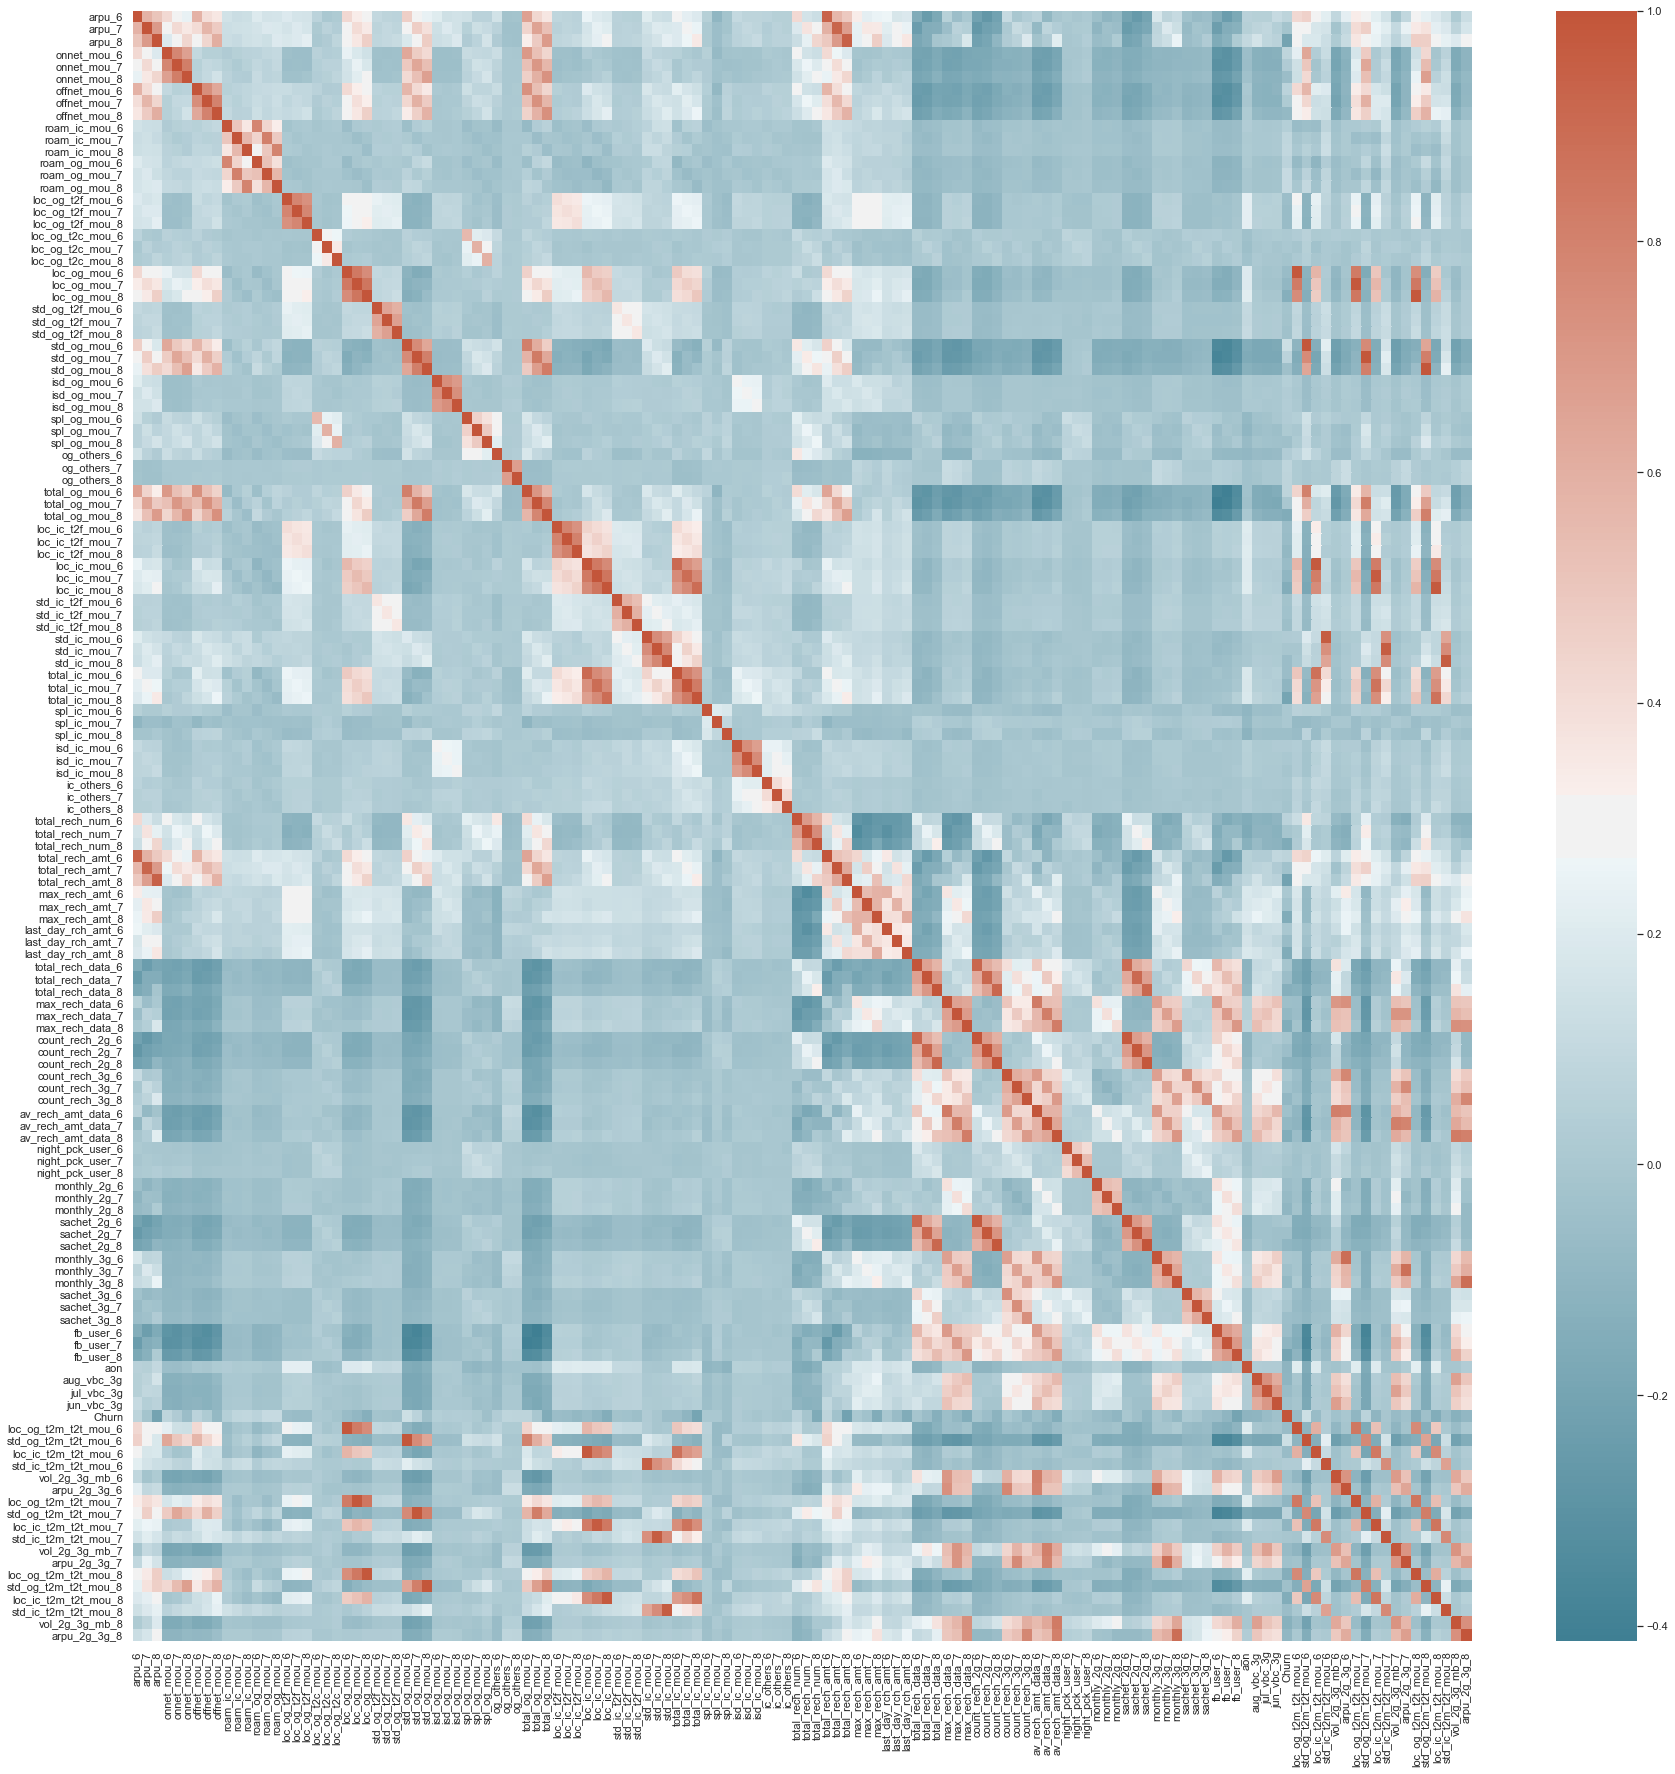

In [118]:
corr = Telecom_Highchurn_df.corr()

fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True)) #diverging_palette(220, 20, as_cmap=True)

### 8.1 Test Train split

In [119]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)

In [120]:
# Train shape.
X_train.shape

(21000, 133)

In [121]:
# Test shape.
X_test.shape

(9001, 133)

### 8.2 Handling class imbalance 

In [122]:
# #SMOTE for balancing the data.

# from imblearn.over_sampling import SMOTE

# smt = SMOTE(random_state=42)
# # X_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)

# X_train_sm = X_train
# y_train_sm = y_train

# # Printing shapes of train and test data
# print('X_train.shape',X_train_sm.shape)

# print('y_train.shape',y_train_sm.shape)

# print('Churn Train%',round(y_train_sm.mean()*100,2),'Non-churn Train%',round((1-y_train_sm.mean())*100,2))

#Importing libraries
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

from numpy import mean

# Trying ADASYN
over = ADASYN(sampling_strategy='minority',random_state=42)

X_train_sm, y_train_sm = over.fit_resample(X_train, y_train)

y_train_sm.value_counts()

1    19631
0    19291
Name: Churn, dtype: int64

In [123]:
#Checkinf shape of tain data.
X_train.shape

(21000, 133)

In [124]:
#SMOTE scaling features.
scaler_sm = StandardScaler()

X_train_sm = scaler_sm.fit_transform(X_train_sm)

X_test_sm = scaler_sm.transform(X_test)

In [125]:
#Train data frame.
X_train_sm = pd.DataFrame(data=X_train_sm, columns=X_train.columns)

In [126]:
#Test data frame.
X_test_sm = pd.DataFrame(data=X_test_sm, columns=X_test.columns)

In [127]:
#Importing the libraries.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)

In [128]:
# Defining interface for VIF calculation.
def show_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor
                  (df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [129]:
# Checking VIF of x_train.
show_vif(X_train_sm)

Features     VIF
85        count_rech_2g_7  197.31
84        count_rech_2g_6  184.80
86        count_rech_2g_8  181.35
122  std_og_t2m_t2t_mou_7  167.57
28           std_og_mou_7  163.09
27           std_og_mou_6  137.86
22           loc_og_mou_7  132.82
116  std_og_t2m_t2t_mou_6  132.43
128  std_og_t2m_t2t_mou_8  130.60
100           sachet_2g_7  117.81
101           sachet_2g_8  112.44
29           std_og_mou_8  107.39
23           loc_og_mou_8  105.58
21           loc_og_mou_6  104.74
99            sachet_2g_6  102.87
46           loc_ic_mou_7   91.98
121  loc_og_t2m_t2t_mou_7   89.91
78      total_rech_data_6   87.34
45           loc_ic_mou_6   87.10
79      total_rech_data_7   86.76
80      total_rech_data_8   80.49
127  loc_og_t2m_t2t_mou_8   78.39
40         total_og_mou_7   72.08
47           loc_ic_mou_8   71.76
7            offnet_mou_7   69.28
4             onnet_mou_7   66.23
115  loc_og_t2m_t2t_mou_6   66.08
39         total_og_mou_6   59.43
129  loc_ic_t2m_t2t_mou_8   55.84
6            offnet_mou_6   55.68
123  loc_ic_t2m_t2t_mou_7   54.95
3             onnet_mou_6   54.43
117  loc_ic_t2m_t2t_mou_6   52.63
52           std_ic_mou_7   43.73
54         total_ic_mou_6   41.02
8            offnet_mou_8   38.69
5             onnet_mou_8   36.33
55         total_ic_mou_7   36.18
89        count_rech_3g_8   35.92
124  std_ic_t2m_t2t_mou_7   35.15
51           std_ic_mou_6   32.32
53           std_ic_mou_8   31.23
88        count_rech_3g_7   28.04
130  std_ic_t2m_t2t_mou_8   27.43
87        count_rech_3g_6   24.32
118  std_ic_t2m_t2t_mou_6   24.23
41         total_og_mou_8   23.58
71       total_rech_amt_8   21.53
2                  arpu_8   19.20
70       total_rech_amt_7   18.49
69       total_rech_amt_6   17.18
1                  arpu_7   15.89
120          arpu_2g_3g_6   15.56
92     av_rech_amt_data_8   15.24
0                  arpu_6   15.23
91     av_rech_amt_data_7   14.85
90     av_rech_amt_data_6   14.54
132          arpu_2g_3g_8   13.60
126          arpu_2g_3g_7   13.25
107           sachet_3g_8   12.91
56         total_ic_mou_8   12.54
104          monthly_3g_8   12.02
83        max_rech_data_8   11.35
106           sachet_3g_7   11.22
82        max_rech_data_7   10.73
81        max_rech_data_6   10.66
103          monthly_3g_7    9.00
13          roam_og_mou_7    8.27
105           sachet_3g_6    8.15
102          monthly_3g_6    7.83
12          roam_og_mou_6    6.91
119        vol_2g_3g_mb_6    6.61
131        vol_2g_3g_mb_8    6.46
125        vol_2g_3g_mb_7    6.39
14          roam_og_mou_8    6.37
67       total_rech_num_7    6.14
109             fb_user_7    5.83
110             fb_user_8    5.68
108             fb_user_6    5.41
10          roam_ic_mou_7    5.24
98           monthly_2g_8    5.14
68       total_rech_num_8    4.97
66       total_rech_num_6    4.94
43       loc_ic_t2f_mou_7    4.79
97           monthly_2g_7    4.58
74         max_rech_amt_8    4.40
73         max_rech_amt_7    4.07
38            og_others_8    4.06
11          roam_ic_mou_8    4.04
96           monthly_2g_6    4.04
72         max_rech_amt_6    4.00
113            jul_vbc_3g    3.91
9           roam_ic_mou_6    3.90
31           isd_og_mou_7    3.88
44       loc_ic_t2f_mou_8    3.85
37            og_others_7    3.78
16       loc_og_t2f_mou_7    3.68
42       loc_ic_t2f_mou_6    3.65
61           isd_ic_mou_7    3.55
30           isd_og_mou_6    3.45
60           isd_ic_mou_6    3.35
114            jun_vbc_3g    3.25
112            aug_vbc_3g    3.18
15       loc_og_t2f_mou_6    3.09
17       loc_og_t2f_mou_8    2.97
62           isd_ic_mou_8    2.60
32           isd_og_mou_8    2.59
34           spl_og_mou_7    2.48
49       std_ic_t2f_mou_7    2.27
35           spl_og_mou_8    2.16
25       std_og_t2f_mou_7    2.11
75     last_day_rch_amt_6    2.04
77     last_day_rch_amt_8    2.04
50       std_ic_t2f_mou_8    2.02
48       std_ic_t2f_mou_6    2.02
33           spl_og_mou_6    2.00
26       std_og_t2f_mou_8    1.94
76   

In [130]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38922
Model:                            GLM   Df Residuals:                    38788
Model Family:                Binomial   Df Model:                          133
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Jul 2021   Deviance:                          nan
Time:                        19:16:39   Pearson chi2:                 3.46e+13
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1275      0.066     16.964      0.000       0.997       1.258
arpu_6                  -0.1299      0.069     -1.880      0.060      -0.265       0.006
arpu_7                   0.2448      0.075      3.258      0.001       0.098       0.392
arpu_8                   0.5281      0.086      6.116      0.000       0.359       0.697
onnet_mou_6              0.1271      0.153      0.833      0.405      -0.172       0.426
onnet_mou_7              0.7725      0.160      4.833      0.000       0.459       1.086
onnet_mou_8             -0.3993      0.119     -3.352      0.001      -0.633      -0.166
offnet_mou_6             0.0459      0.155      0.297      0.767      -0.257       0.349
offnet_mou_7             0.8823      0.164      5.368      0.000       0.560       1.204
offnet_mou_8            -0.4017      0.122     -3.284      0.001      -0.641      -0.162
roam_ic_mou_6            0.0474      0.036      1.313      0.189      -0.023       0.118
roam_ic_mou_7            0.0771      0.041      1.872      0.061      -0.004       0.158
roam_ic_mou_8           -0.0248      0.036     -0.689      0.491      -0.095       0.046
roam_og_mou_6           -0.0152      0.049     -0.308      0.758      -0.112       0.082
roam_og_mou_7           -0.0800      0.050     -1.591      0.112      -0.179       0.019
roam_og_mou_8            0.2057      0.044      4.647      0.000       0.119       0.293
loc_og_t2f_mou_6         0.0482      0.039      1.251      0.211      -0.027       0.124
loc_og_t2f_mou_7        -0.2582      0.044     -5.851      0.000      -0.345      -0.172
loc_og_t2f_mou_8         0.0506      0.041      1.231      0.218      -0.030       0.131
loc_og_t2c_mou_6        -0.1128      0.026     -4.411      0.000      -0.163      -0.063
loc_og_t2c_mou_7        -0.0446      0.028     -1.578      0.115      -0.100       0.011
loc_og_t2c_mou_8         0.1454      0.027      5.467      0.000       0.093       0.198
loc_og_mou_6            -0.5362      0.286     -1.877      0.060      -1.096       0.024
loc_og_mou_7             0.6068      0.307      1.976      0.048       0.005       1.209
loc_og_mou_8             1.4836      0.350      4.242      0.000       0.798       2.169
std_og_t2f_mou_6         0.0376      0.027      1.374      0.169      -0.016       0.091
std_og_t2f_mou_7         0.0174      0.030      0.584      0.560      -0.041       0.076
std_og_t2f_mou_8        -0.0618      0.030     -2.057      0.040      -0.121      -0.003
std_og_mou_6             0.1429      0.229      0.624      0.532      -0.306       0.592
std_og_mou_7            -0.0868      0.297     -0.292      0.770      -0.669       0.495
std_og_mou_8             2.8295      0.299      9.463      0.000       2.243       3.415
isd_og_mou_6            -0.0063      0.036     -0.176    

In [131]:
# Running RFE.
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_sm, y_train_sm)

In [132]:
#Checking the rfe ranking.
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 66),
 ('arpu_7', False, 41),
 ('arpu_8', False, 28),
 ('onnet_mou_6', False, 106),
 ('onnet_mou_7', False, 15),
 ('onnet_mou_8', False, 48),
 ('offnet_mou_6', False, 75),
 ('offnet_mou_7', False, 14),
 ('offnet_mou_8', False, 47),
 ('roam_ic_mou_6', False, 81),
 ('roam_ic_mou_7', False, 92),
 ('roam_ic_mou_8', False, 104),
 ('roam_og_mou_6', False, 102),
 ('roam_og_mou_7', False, 80),
 ('roam_og_mou_8', False, 49),
 ('loc_og_t2f_mou_6', False, 85),
 ('loc_og_t2f_mou_7', False, 43),
 ('loc_og_t2f_mou_8', False, 76),
 ('loc_og_t2c_mou_6', False, 64),
 ('loc_og_t2c_mou_7', False, 87),
 ('loc_og_t2c_mou_8', False, 65),
 ('loc_og_mou_6', False, 13),
 ('loc_og_mou_7', False, 39),
 ('loc_og_mou_8', False, 8),
 ('std_og_t2f_mou_6', False, 94),
 ('std_og_t2f_mou_7', False, 98),
 ('std_og_t2f_mou_8', False, 91),
 ('std_og_mou_6', False, 46),
 ('std_og_mou_7', False, 88),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_6', False, 117),
 ('isd_og_mou_7', False, 59),
 ('isd_og_mou_8', 

In [133]:
#Checking top columns for Logistic regression.
col = X_train_sm.columns[rfe.support_]

In [134]:
col

Index(['std_og_mou_8', 'total_og_mou_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'std_og_t2m_t2t_mou_8'],
      dtype='object')

In [135]:
#Checking remaining columns for Logistic regression.
X_train_sm.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'std_og_t2m_t2t_mou_7', 'loc_ic_t2m_t2t_mou_7', 'std_ic_t2m_t2t_mou_7',
       'vol_2g_3g_mb_7', 'arpu_2g_3g_7', 'loc_og_t2m_t2t_mou_8',
       'loc_ic_t2m_t2t_mou_8', 'std_ic_t2m_t2t_mou_8', 'vol_2g_3g_mb_8',
       'arpu_2g_3g_8'],
      dtype='object', length=118)

#### 8.1.1 Building Model-1

In [136]:
#Building Logistic regression model.
X_train_sm = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38922
Model:                            GLM   Df Residuals:                    38906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Jul 2021   Deviance:                          nan
Time:                        19:18:48   Pearson chi2:                 4.77e+15
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1350      0.067     17.044      0.000       1.004       1.265
std_og_mou_8             4.5194      0.146     31.041      0.000       4.234       4.805
total_og_mou_8          -3.5909      0.067    -53.337      0.000      -3.723      -3.459
count_rech_2g_6         24.1913      1.043     23.192      0.000      22.147      26.236
count_rech_2g_7         18.1458      0.826     21.970      0.000      16.527      19.765
count_rech_2g_8         15.6705      0.804     19.481      0.000      14.094      17.247
count_rech_3g_8          2.6207      0.129     20.349      0.000       2.368       2.873
monthly_2g_6            -4.0219      0.162    -24.757      0.000      -4.340      -3.703
monthly_2g_7            -3.2931      0.136    -24.207      0.000      -3.560      -3.026
monthly_2g_8            -3.9275      0.169    -23.301      0.000      -4.258      -3.597
sachet_2g_6            -23.8468      1.018    -23.421      0.000     -25.842     -21.851
sachet_2g_7            -18.1002      0.812    -22.292      0.000     -19.692     -16.509
sachet_2g_8            -16.7777      0.802    -20.922      0.000     -18.349     -15.206
monthly_3g_8            -2.5193      0.093    -27.175      0.000      -2.701      -2.338
sachet_3g_8             -2.3258      0.103    -22.668      0.000      -2.527      -2.125
std_og_t2m_t2t_mou_8    -1.8306      0.128    -14.285      0.000      -2.082      -1.579
========================================================================================
"""

In [137]:
# Checking VIF.
show_vif(X_train_sm[col])

Features     VIF
4        count_rech_2g_8  101.78
10           sachet_2g_7  100.09
11           sachet_2g_8   99.93
3        count_rech_2g_7   99.38
9            sachet_2g_6   85.35
2        count_rech_2g_6   85.32
0           std_og_mou_8   72.52
14  std_og_t2m_t2t_mou_8   68.98
5        count_rech_3g_8   19.25
13           sachet_3g_8   10.79
12          monthly_3g_8    9.02
8           monthly_2g_8    4.36
7           monthly_2g_7    4.03
6           monthly_2g_6    3.51
1         total_og_mou_8    3.34

- Dropping count_rech_2g_8 because of high VIF value

In [138]:
#Dropping the column.
col = col.drop('count_rech_2g_8')

#### 8.1.2 Building Model-2

In [139]:
#Building Logistic regression model.
X_train_sm = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38922
Model:                            GLM   Df Residuals:                    38907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Jul 2021   Deviance:                          nan
Time:                        19:18:51   Pearson chi2:                 4.50e+15
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1547      0.062     18.597      0.000       1.033       1.276
std_og_mou_8             4.1714      0.141     29.483      0.000       3.894       4.449
total_og_mou_8          -3.4053      0.064    -53.338      0.000      -3.530      -3.280
count_rech_2g_6         26.1261      0.995     26.267      0.000      24.177      28.075
count_rech_2g_7         22.0710      0.830     26.603      0.000      20.445      23.697
count_rech_3g_8          2.7705      0.127     21.798      0.000       2.521       3.020
monthly_2g_6            -4.3413      0.156    -27.794      0.000      -4.647      -4.035
monthly_2g_7            -3.9185      0.136    -28.758      0.000      -4.186      -3.651
monthly_2g_8            -1.1008      0.059    -18.784      0.000      -1.216      -0.986
sachet_2g_6            -25.7455      0.971    -26.509      0.000     -27.649     -23.842
sachet_2g_7            -21.9348      0.816    -26.897      0.000     -23.533     -20.336
sachet_2g_8             -1.1130      0.053    -20.946      0.000      -1.217      -1.009
monthly_3g_8            -2.6270      0.092    -28.675      0.000      -2.807      -2.447
sachet_3g_8             -2.4509      0.101    -24.216      0.000      -2.649      -2.253
std_og_t2m_t2t_mou_8    -1.6136      0.125    -12.884      0.000      -1.859      -1.368
========================================================================================
"""

In [140]:
#Checking VIF.
show_vif(X_train_sm[col])

Features    VIF
9            sachet_2g_7  94.88
3        count_rech_2g_7  93.35
8            sachet_2g_6  83.64
2        count_rech_2g_6  83.62
0           std_og_mou_8  72.41
13  std_og_t2m_t2t_mou_8  68.87
4        count_rech_3g_8  18.95
12           sachet_3g_8  10.65
11          monthly_3g_8   8.87
6           monthly_2g_7   3.89
5           monthly_2g_6   3.46
1         total_og_mou_8   3.34
10           sachet_2g_8   1.95
7           monthly_2g_8   1.60

- Dropping sachet_2g_7 because of high VIF value.

In [141]:
#Dropping the feature sachet_2g_7.
col = col.drop('sachet_2g_7')

#### 8.1.3 Building Model-3

In [142]:
#Building the Logistic regression model.
X_train_sm = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38922
Model:                            GLM   Df Residuals:                    38908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Jul 2021   Deviance:                          nan
Time:                        19:18:54   Pearson chi2:                 8.26e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8324      0.065     12.724      0.000       0.704       0.961
std_og_mou_8             4.0430      0.138     29.321      0.000       3.773       4.313
total_og_mou_8          -3.3008      0.059    -55.940      0.000      -3.416      -3.185
count_rech_2g_6         34.0625      1.214     28.066      0.000      31.684      36.441
count_rech_2g_7          0.0531      0.029      1.820      0.069      -0.004       0.110
count_rech_3g_8          2.9597      0.123     24.102      0.000       2.719       3.200
monthly_2g_6            -5.5417      0.186    -29.767      0.000      -5.907      -5.177
monthly_2g_7            -0.4273      0.028    -15.073      0.000      -0.483      -0.372
monthly_2g_8            -0.9465      0.049    -19.245      0.000      -1.043      -0.850
sachet_2g_6            -33.5735      1.186    -28.309      0.000     -35.898     -31.249
sachet_2g_8             -1.1635      0.045    -26.118      0.000      -1.251      -1.076
monthly_3g_8            -2.7669      0.088    -31.347      0.000      -2.940      -2.594
sachet_3g_8             -2.6079      0.098    -26.695      0.000      -2.799      -2.416
std_og_t2m_t2t_mou_8    -1.6159      0.124    -13.074      0.000      -1.858      -1.374
========================================================================================
"""

In [143]:
#Checking VIF.
show_vif(X_train_sm[col])

Features    VIF
0           std_og_mou_8  72.40
8            sachet_2g_6  69.60
2        count_rech_2g_6  69.42
12  std_og_t2m_t2t_mou_8  68.86
4        count_rech_3g_8  18.82
11           sachet_3g_8  10.58
10          monthly_3g_8   8.80
1         total_og_mou_8   3.33
5           monthly_2g_6   3.11
3        count_rech_2g_7   2.42
9            sachet_2g_8   1.88
6           monthly_2g_7   1.67
7           monthly_2g_8   1.59

- Dropping column count_rech_2g_7 because of high P value.

In [144]:
# Dropping count_rech_2g_7.
col = col.drop('count_rech_2g_7')

#### 8.1.4 Building Model-4

In [145]:
#Building Logistic regression Model.
X_train_sm = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38922
Model:                            GLM   Df Residuals:                    38909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Jul 2021   Deviance:                          nan
Time:                        19:18:57   Pearson chi2:                 9.06e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8379      0.065     12.800      0.000       0.710       0.966
std_og_mou_8             4.0497      0.138     29.373      0.000       3.779       4.320
total_og_mou_8          -3.3047      0.059    -56.027      0.000      -3.420      -3.189
count_rech_2g_6         34.1584      1.215     28.124      0.000      31.778      36.539
count_rech_3g_8          2.9616      0.123     24.120      0.000       2.721       3.202
monthly_2g_6            -5.5570      0.186    -29.832      0.000      -5.922      -5.192
monthly_2g_7            -0.4193      0.028    -14.993      0.000      -0.474      -0.364
monthly_2g_8            -0.9445      0.049    -19.197      0.000      -1.041      -0.848
sachet_2g_6            -33.6435      1.187    -28.337      0.000     -35.970     -31.316
sachet_2g_8             -1.1323      0.041    -27.692      0.000      -1.212      -1.052
monthly_3g_8            -2.7699      0.088    -31.388      0.000      -2.943      -2.597
sachet_3g_8             -2.6099      0.098    -26.720      0.000      -2.801      -2.418
std_og_t2m_t2t_mou_8    -1.6210      0.124    -13.116      0.000      -1.863      -1.379
========================================================================================
"""

In [146]:
#Checking VIF.
show_vif(X_train_sm[col])

Features    VIF
0           std_og_mou_8  72.38
7            sachet_2g_6  69.43
11  std_og_t2m_t2t_mou_8  68.83
2        count_rech_2g_6  68.19
3        count_rech_3g_8  18.79
10           sachet_3g_8  10.56
9           monthly_3g_8   8.77
1         total_og_mou_8   3.33
4           monthly_2g_6   3.07
5           monthly_2g_7   1.64
6           monthly_2g_8   1.59
8            sachet_2g_8   1.41

- dropping std_og_mou_8 bucause of high VIF value.

In [147]:
#Dropping std_og_mou_8
col = col.drop('std_og_mou_8')

#### 8.1.5 Building Model-5

In [148]:
#Building Logistic regression model.
X_train_sm = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38922
Model:                            GLM   Df Residuals:                    38910
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Jul 2021   Deviance:                          nan
Time:                        19:18:59   Pearson chi2:                 2.23e+11
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8979      0.068     13.279      0.000       0.765       1.030
total_og_mou_8          -2.8882      0.053    -54.109      0.000      -2.993      -2.784
count_rech_2g_6         35.1498      1.253     28.052      0.000      32.694      37.606
count_rech_3g_8          2.9182      0.120     24.328      0.000       2.683       3.153
monthly_2g_6            -5.6971      0.192    -29.689      0.000      -6.073      -5.321
monthly_2g_7            -0.4141      0.028    -14.902      0.000      -0.469      -0.360
monthly_2g_8            -0.9372      0.049    -19.096      0.000      -1.033      -0.841
sachet_2g_6            -34.5836      1.225    -28.237      0.000     -36.984     -32.183
sachet_2g_8             -1.1521      0.041    -28.033      0.000      -1.233      -1.072
monthly_3g_8            -2.7132      0.086    -31.422      0.000      -2.882      -2.544
sachet_3g_8             -2.5649      0.096    -26.826      0.000      -2.752      -2.377
std_og_t2m_t2t_mou_8     1.9775      0.046     43.119      0.000       1.888       2.067
========================================================================================
"""

In [149]:
#Checking VIF.
show_vif(X_train_sm[col])

Features    VIF
6            sachet_2g_6  69.30
1        count_rech_2g_6  68.03
2        count_rech_3g_8  18.79
9            sachet_3g_8  10.56
8           monthly_3g_8   8.77
0         total_og_mou_8   3.14
10  std_og_t2m_t2t_mou_8   3.14
3           monthly_2g_6   3.07
4           monthly_2g_7   1.64
5           monthly_2g_8   1.59
7            sachet_2g_8   1.41

- dropping sachet_2g_6 bucause of high VIF value.

In [150]:
#Dropping sachet_2g_6
col = col.drop('sachet_2g_6')

#### 8.1.6 Building Model-6

In [151]:
#Building Logistic regression model.
X_train_sm = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38922
Model:                            GLM   Df Residuals:                    38911
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16760.
Date:                Mon, 05 Jul 2021   Deviance:                       33521.
Time:                        19:19:00   Pearson chi2:                 7.52e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3805      0.016    -23.308      0.000      -0.412      -0.348
total_og_mou_8          -2.7398      0.046    -59.135      0.000      -2.831      -2.649
count_rech_2g_6          0.1758      0.018      9.820      0.000       0.141       0.211
count_rech_3g_8          3.6811      0.113     32.478      0.000       3.459       3.903
monthly_2g_6            -0.3654      0.021    -17.804      0.000      -0.406      -0.325
monthly_2g_7            -0.3058      0.021    -14.738      0.000      -0.346      -0.265
monthly_2g_8            -0.7394      0.029    -25.173      0.000      -0.797      -0.682
sachet_2g_8             -1.1013      0.028    -39.993      0.000      -1.155      -1.047
monthly_3g_8            -3.2544      0.081    -40.262      0.000      -3.413      -3.096
sachet_3g_8             -3.1294      0.091    -34.519      0.000      -3.307      -2.952
std_og_t2m_t2t_mou_8     1.8523      0.040     46.218      0.000       1.774       1.931
========================================================================================
"""

In [152]:
#Checking VIF.
show_vif(X_train_sm[col])

Features    VIF
2       count_rech_3g_8  18.55
8           sachet_3g_8  10.41
7          monthly_3g_8   8.61
9  std_og_t2m_t2t_mou_8   3.14
0        total_og_mou_8   3.12
4          monthly_2g_7   1.64
5          monthly_2g_8   1.58
3          monthly_2g_6   1.54
6           sachet_2g_8   1.35
1       count_rech_2g_6   1.34

- dropping count_rech_3g_8 bucause of high VIF value.

In [153]:
#Dropping count_rech_3g_8
col = col.drop('count_rech_3g_8')

#### 8.1.7 Building Model-7

In [154]:
#Building Logistic regression model.
X_train_sm = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38922
Model:                            GLM   Df Residuals:                    38912
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17636.
Date:                Mon, 05 Jul 2021   Deviance:                       35272.
Time:                        19:19:01   Pearson chi2:                 5.99e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3610      0.016    -23.112      0.000      -0.392      -0.330
total_og_mou_8          -2.7055      0.045    -59.987      0.000      -2.794      -2.617
count_rech_2g_6          0.1871      0.018     10.598      0.000       0.153       0.222
monthly_2g_6            -0.3763      0.020    -18.808      0.000      -0.415      -0.337
monthly_2g_7            -0.3019      0.020    -15.070      0.000      -0.341      -0.263
monthly_2g_8            -0.7211      0.028    -25.617      0.000      -0.776      -0.666
sachet_2g_8             -1.0687      0.026    -40.378      0.000      -1.121      -1.017
monthly_3g_8            -0.7754      0.020    -39.229      0.000      -0.814      -0.737
sachet_3g_8             -0.3569      0.019    -18.486      0.000      -0.395      -0.319
std_og_t2m_t2t_mou_8     1.8353      0.039     47.014      0.000       1.759       1.912
========================================================================================
"""

In [155]:
#Checking VIF.
show_vif(X_train_sm[col])

Features   VIF
8  std_og_t2m_t2t_mou_8  3.13
0        total_og_mou_8  3.11
3          monthly_2g_7  1.64
4          monthly_2g_8  1.58
2          monthly_2g_6  1.54
5           sachet_2g_8  1.35
1       count_rech_2g_6  1.34
7           sachet_3g_8  1.06
6          monthly_3g_8  1.03

- All the columns have required p-value and VIF value and thus it could be used for model building

### Significant features:
-------------------------------------------
- total_og_mou_8 :	       -2.7055
- std_og_t2m_t2t_mou_8 :	1.8353
- sachet_2g_8 :	            -1.0687
- monthly_3g_8 :	       -0.7754	
- monthly_2g_8 :	       -0.7211
- sachet_3g_8 :	           -0.3569



In [156]:
#Making the final prediction.
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [157]:
# creating y_train_pred dataframe.
y_train_pred_final = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train_sm.index
y_train_pred_final.head()

Churn  Churn_Prob  ID
0      0    0.155353   0
1      0    0.577590   1
2      0    0.009685   2
3      0    0.670103   3
4      0    0.091342   4

In [158]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Churn_Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  ID  Churn_Predicted
0      0    0.155353   0                0
1      0    0.577590   1                1
2      0    0.009685   2                0
3      0    0.670103   3                1
4      0    0.091342   4                0

In [159]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted )
confusion

array([[14044,  5247],
       [ 2850, 16781]], dtype=int64)

In [160]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted)

0.7919685524895945

In [161]:
#Defining the ROC plot.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

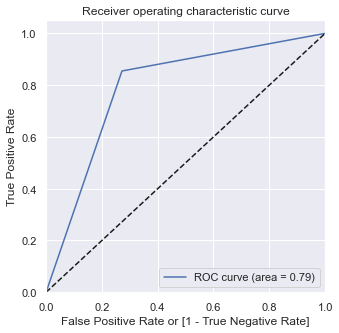

In [162]:
#Drawing Roc plot 
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted)

### Finding Optimal Cutoff Point

In [163]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  ID  Churn_Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.155353   0                0    1    1    0    0    0    0    0   
1      0    0.577590   1                1    1    1    1    1    1    1    0   
2      0    0.009685   2                0    1    0    0    0    0    0    0   
3      0    0.670103   3                1    1    1    1    1    1    1    1   
4      0    0.091342   4                0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [164]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.504368  1.000000  0.000000
0.1   0.1  0.676121  0.974275  0.372713
0.2   0.2  0.721135  0.954460  0.483697
0.3   0.3  0.751246  0.933982  0.565290
0.4   0.4  0.775397  0.904131  0.644394
0.5   0.5  0.791969  0.854821  0.728008
0.6   0.6  0.798315  0.789720  0.807060
0.7   0.7  0.783362  0.674393  0.894251
0.8   0.8  0.726376  0.496205  0.960603
0.9   0.9  0.539515  0.089756  0.997201


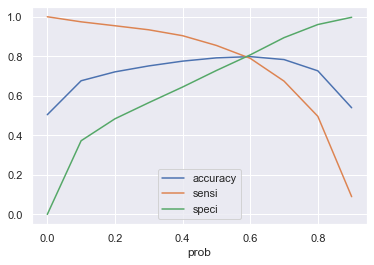

In [165]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Since the model should have high Sensitivity, taking the cutoff slightly left of the optimum cutoff. 
- 0.5 is the probability cutoff for high sensitivity 

In [166]:
# Prediction on test data.
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.50 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  ID  Churn_Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.155353   0                0    1    1    0    0    0    0    0   
1      0    0.577590   1                1    1    1    1    1    1    1    0   
2      0    0.009685   2                0    1    0    0    0    0    0    0   
3      0    0.670103   3                1    1    1    1    1    1    1    1   
4      0    0.091342   4                0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                1  
2    0    0    0                0  
3    0    0    0                1  
4    0    0    0                0

In [167]:
# Let's check the overall accuracy.
acc = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

In [168]:
#Confusion Matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[14044,  5247],
       [ 2850, 16781]], dtype=int64)

In [169]:
#Checking the accuracy.
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
sens = TP / float(TP+FN)
# Let us calculate specificity
spec = TN / float(TN+FP)

print('Train accuraccy', acc)

print('Train Sensitivity', sens)
print('Train Specificity', spec)

Train accuraccy 0.7919685524895945
Train Sensitivity 0.8548214558606286
Train Specificity 0.7280078793219636


In [170]:
#Importing the librarues.
from sklearn.metrics import precision_score, recall_score

In [171]:
# precision_score and recall_score.
precision = precision_score(y_train_pred_final.Churn , y_train_pred_final.final_predicted)
recall = recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

print('precision', precision)
print('recall', recall)

precision 0.7618031596150354
recall 0.8548214558606286


### Predictions on test data

In [172]:
#Xtest data.
X_test_sm = sm.add_constant(X_test_sm[col])
X_test_sm.shape

(9001, 10)

In [173]:
#y_test_pred data
y_test_pred = res.predict(X_test_sm).values.reshape(-1)
y_test_pred.shape

(9001,)

In [174]:
y_test_pred

array([0.00355256, 0.05642982, 0.57879115, ..., 0.02619404, 0.69750923,
       0.15227811])

In [175]:
#Converting the test dataframe.
y_test_pred_df = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_df['ID'] = y_test.index
y_test_pred_df.head()

Churn  Churn_Prob     ID
0      0    0.003553  13688
1      0    0.056430  26494
2      0    0.578791  15432
3      0    0.807212  24535
4      0    0.042337  24803

In [176]:
#Ytest Prediction.
y_test_pred_df['Churn_Predicted'] = y_test_pred_df.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [177]:
# Let's check the overall accuracy.
acc = metrics.accuracy_score(y_test_pred_df.Churn, y_test_pred_df.Churn_Predicted)


In [178]:
#confusion Matrix.
confusion2 = metrics.confusion_matrix(y_test_pred_df.Churn, y_test_pred_df.Churn_Predicted )
confusion2

array([[5969, 2300],
       [ 159,  573]], dtype=int64)

In [179]:
#Obtaining the accuracy.
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
sens = TP / float(TP+FN)

# Let us calculate specificity
spec = TN / float(TN+FP)

print('Test accuracy', acc)
print('Test Sensitivity', sens)
print('Test specificity', spec)

Test accuracy 0.7268081324297301
Test Sensitivity 0.7827868852459017
Test specificity 0.7218527028661265


### Random forest (Interpretable)

In [180]:

#Logistic regression with adjusted class weight to handle class imbalance.
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1, random_state=42)

# Tuning Hyperparameter space.
#params = {'pca__n_components': [80], 'forest__max_depth': [20,40],'forest__max_features': [10,20,40],
#          'forest__min_samples_leaf': [30,50],'forest__n_estimators': [30,60,80]}

params = {'max_depth': [10,20,40],
        'min_samples_leaf': [30,50],'n_estimators': [100,200,300]}

# Creating Stratified 5 fold to create balanced class.
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# GridSearchCV estimation
model_2 = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [181]:
#Fitting the model.
model_2.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 40],
                         'min_samples_leaf': [30, 50],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [182]:
#Cross validation outcome
CV_2_df = pd.DataFrame(model_2.cv_results_)
CV_2_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
14      32.209292      1.174701         3.606568        1.107128   
8       32.963006      2.082691         4.174800        1.005760   
13      20.901292      0.564710         5.031791        0.933842   
7       21.967837      1.359418         4.542408        0.816057   
12      14.096019      1.873526         3.481144        0.674910   
6       12.738930      2.278301         3.299205        0.452019   
1       20.096422      1.379678         5.714748        0.240623   
2       30.935321      0.770972         3.257604        0.641602   
0        7.501722      0.670035         2.878255        0.158089   
16      19.832431      1.040852         4.657938        0.906014   
10      20.184459      0.959059         4.752332        0.796980   
17      24.670736      4.674392         1.616563        1.111461   
11      30.116946      1.515049         3.777396        0.959264   
15      12.666052      2.265912         3.905309        0.798729   
9       13.148860      2.695910         3.505190        1.057518   
4       19.391771      1.591993         5.084037        0.553352   
5       29.224351      1.629221         4.322938        0.630474   
3       11.994638      1.377719         3.535664        0.953965   

   param_max_depth param_min_samples_leaf param_n_estimators  \
14              40                     30                300   
8               20                     30                300   
13              40                     30                200   
7               20                     30                200   
12              40                     30                100   
6               20                     30                100   
1               10                     30                200   
2               10                     30                300   
0               10                     30                100   
16              40                     50                200   
10              20                     50                200   
17              40                     50                300   
11              20                     50                300   
15              40                     50                100   
9               20                     50                100   
4               10                     50                200   
5               10                     50                300   
3               10                     50                100   

                                               params  split0_test_score  \
14  {'max_depth': 40, 'min_samples_leaf': 30, 'n_e...           0.921631   
8   {'max_depth': 20, 'min_samples_leaf': 30, 'n_e...           0.921555   
13  {'max_depth': 40, 'min_samples_leaf': 30, 'n_e...           0.921364   
7   {'max_depth': 20, 'min_samples_leaf': 30, 'n_e...           0.921244   
12  {'max_depth': 40, 'min_samples_leaf': 30, 'n_e...           0.920981   
6   {'max_depth': 20, 'min_samples_leaf': 30, 'n_e...           0.920725   
1   {'max_depth': 10, 'min_samples_leaf': 30, 'n_e...           0.919427   
2   {'max_depth': 10, 'min_samples_leaf': 30, 'n_e...           0.919143   
0   {'max_depth': 10, 'min_samples_leaf': 30, 'n_e...           0.919064   
16  {'max_depth': 40, 'min_samples_leaf': 50, 'n_e...           0.921348   
10  {'max_depth': 20, 'min_samples_leaf': 50, 'n_e...           0.921348   
17  {'max_depth': 40, 'min_samples_leaf': 50, 'n_e...           0.920833   
11  {'max_depth': 20, 'min_samples_leaf': 50, 'n_e...           0.920833   
15  {'max_depth': 40, 'min_samples_leaf': 50, 'n_e...           0.920924   
9   {'max_depth': 20, 'min_samples_leaf': 50, 'n_e...           0.920924   
4   {'max_depth': 10, 'min_samples_leaf': 50, 'n_e...           0.920850   
5   {'max_depth': 10, 'min_samples_leaf': 50, 'n_e...           0.919953   
3   {'max_depth': 10, 'min_samples_leaf': 50, 'n_e...           0.919212   

    split1_test_score  split2_test_score  split3_

In [183]:
#Obtaining the train Prediction dataframe.
y_train_RFpred = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':model_2.predict_proba(X_train)[:,1]})
y_train_RFpred

Churn  Churn_Prob
0          0    0.009724
1          0    0.119111
2          0    0.026493
3          0    0.391919
4          0    0.007366
...      ...         ...
20995      0    0.207376
20996      0    0.391434
20997      0    0.171491
20998      0    0.077571
20999      1    0.781050

[21000 rows x 2 columns]

In [184]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_RFpred[i]= y_train_RFpred.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_RFpred.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.009724    1    0    0    0    0    0    0    0    0    0
1      0    0.119111    1    1    0    0    0    0    0    0    0    0
2      0    0.026493    1    0    0    0    0    0    0    0    0    0
3      0    0.391919    1    1    1    1    0    0    0    0    0    0
4      0    0.007366    1    0    0    0    0    0    0    0    0    0

In [185]:
# Defining the sensitivity curve.
def Sens_Acc_Spe_df(y_train_df):
    Sens_Acc_Spe_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_df.Churn,y_train_df[i])
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
    
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        Sens_Acc_Spe_df.loc[i] =[ i ,accuracy,sensi,speci]
    return(Sens_Acc_Spe_df)

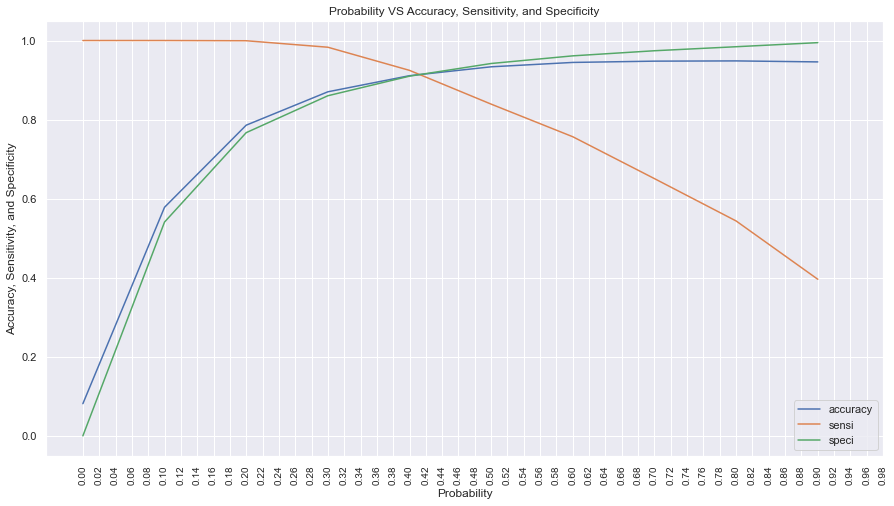

In [186]:
#Plotting Sensitivity Specificity and accuracy curve to decide optimal cut-off point.

cutoff2_df = Sens_Acc_Spe_df(y_train_RFpred)
cutoff2_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(15,8))
plt.xticks(np.arange(0,1,step=.02), size=10,rotation =90)
plt.ylabel('Accuracy, Sensitivity, and Specificity')
plt.xlabel('Probability')
plt.title('Probability VS Accuracy, Sensitivity, and Specificity')
plt.show()

In [187]:
# Taking probablity threshold as .32 for better sensitivity.
prob_threshold = .32

In [188]:
#Churn prediction using the optimal cut-off.
y_train_RFpred['Churn_RF_I_pred_train'] = y_train_RFpred.Churn_Prob.map( lambda x: 1 if x > prob_threshold else 0)
y_train_RFpred.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0      0    0.009724    1    0    0    0    0    0    0    0    0    0   
1      0    0.119111    1    1    0    0    0    0    0    0    0    0   
2      0    0.026493    1    0    0    0    0    0    0    0    0    0   
3      0    0.391919    1    1    1    1    0    0    0    0    0    0   
4      0    0.007366    1    0    0    0    0    0    0    0    0    0   

   Churn_RF_I_pred_train  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0

In [189]:
# Function to Indicate accuracy,Sensitivity,Specificity,True-Positive rate,False-Positive rate of the model.
def Mod_evaluation(actual,predicted):
    # Checking the overall accuracy of the model.
    acc = metrics.accuracy_score(actual, predicted)
    print("Accuracy of model is ", round(acc,2))
    # Checking the confusion matrix of the model.
    conf = metrics.confusion_matrix(actual, predicted)
    TP = conf[1,1] # True Positive.
    TN = conf[0,0] # True Negative.
    FP = conf[0,1] # False Positive.
    FN = conf[1,0] # False Negative.
    # Sensitivity of the Model.
    print("Sensitivity of model is ", round(TP / float(TP+FN),2))
    # Specificity of the Model.
    print("Specificity of model is ", round(TN / float(TN+FP),2))
    # True-Positive rate of the Model.
    print("True-Positive rate of model is ", round(TP / float(TP+FN),2))
    # False-Positive rate of the Model. 
    print("False-Positive rate of model is ", round(FP / float(TN+FP),2))
    # precision score
    precision = precision_score(actual, predicted)
    print("precision_score is ", round(precision,2))
    # Recall Score.
    recall = recall_score(actual, predicted)
    print("recall_score is ", round(recall,2))
    # F1-score.
    f1_score = metrics.f1_score(actual, predicted, average='weighted')
    print("f1_score is ", round(f1_score,2))
    #Confusion Matrix.
    print("Confusion Matrix is: ")
    print(conf)

In [190]:
#Model Evaluation on train dataset.
Mod_evaluation(y_train_RFpred.Churn, y_train_RFpred.Churn_RF_I_pred_train)

Accuracy of model is  0.88
Sensitivity of model is  0.97
Specificity of model is  0.87
True-Positive rate of model is  0.97
False-Positive rate of model is  0.13
precision_score is  0.4
recall_score is  0.97
f1_score is  0.9
Confusion Matrix is: 
[[16832  2459]
 [   45  1664]]


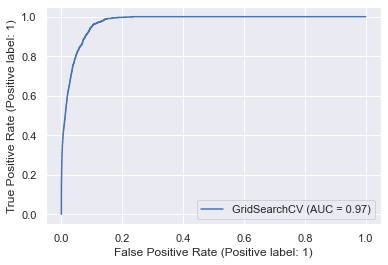

In [191]:
#Plotting ROC curve.
metrics.plot_roc_curve(model_2, X_train, y_train)
plt.show()

#### 8.2.2. Making predictions on the test set.

In [192]:
#Obtaining the train Prediction dataframe.
y_test_RFpred = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':model_2.predict_proba(X_test)[:,1]})
y_test_RFpred

Churn  Churn_Prob
0         0    0.036618
1         0    0.055617
2         0    0.289971
3         0    0.524402
4         0    0.141632
...     ...         ...
8996      0    0.038424
8997      0    0.070557
8998      0    0.236048
8999      0    0.160696
9000      0    0.000928

[9001 rows x 2 columns]

In [193]:
#Churn prediction using the optimal cut-off
y_test_RFpred['Churn_RF_I_pred_test'] = y_test_RFpred.Churn_Prob.map( lambda x: 1 if x > prob_threshold else 0)
y_test_RFpred.head()

Churn  Churn_Prob  Churn_RF_I_pred_test
0      0    0.036618                     0
1      0    0.055617                     0
2      0    0.289971                     0
3      0    0.524402                     1
4      0    0.141632                     0

### Metrics on test dataset

In [194]:
#Model Evaluation on test dataset.
Mod_evaluation(y_test_RFpred.Churn, y_test_RFpred.Churn_RF_I_pred_test)

Accuracy of model is  0.86
Sensitivity of model is  0.84
Specificity of model is  0.86
True-Positive rate of model is  0.84
False-Positive rate of model is  0.14
precision_score is  0.35
recall_score is  0.84
f1_score is  0.89
Confusion Matrix is: 
[[7144 1125]
 [ 114  618]]


## Model interpretation

Text(0.5, 0, 'Permutation Importance')

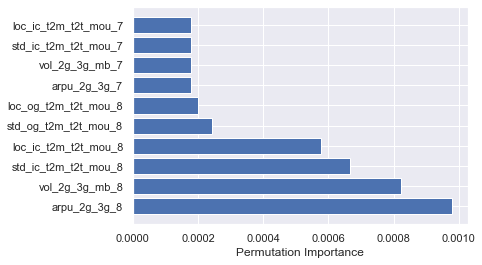

In [195]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model_2.best_estimator_, X_test, y_test)
features = perm_importance.importances_mean
features.sort()
features = features[::-1]
sorted_idx = features.argsort()[:10]

plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


In [196]:
#checking the features.
features = model_2.best_estimator_.feature_importances_
features.sort()
features = features[::-1]
sorted_idx = features.argsort()[:10]
sorted_idx

array([132, 131, 130, 129, 128, 127, 126, 125, 124, 123], dtype=int64)

Text(0.5, 0, 'Random Forest Feature Importance')

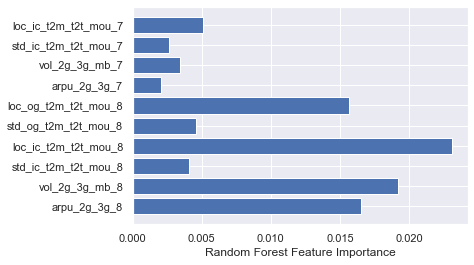

In [197]:
#Plotting the bar chart for understanding important features.
plt.barh(X_train.columns[sorted_idx], model_2.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Based on above plot, below are the top important 10 features for Random forest

- loc_ic_t2m_t2t_mou_8
- vol_2g_3g_mb_8
- arpu_2g_3g_8
- loc_og_t2m_t2t_mou_8
- loc_ic_t2m_t2t_mou_7
- std_ic_t2m_t2t_mou_8
- std_og_t2m_t2t_mou_8
- vol_2g_3g_mb_7


### Significant features for Logistic Regression:
- total_og_mou_8 :	       -2.7055
- std_og_t2m_t2t_mou_8 :	1.8353
- sachet_2g_8 :	            -1.0687
- monthly_3g_8 :	       -0.7754	
- monthly_2g_8 :	       -0.7211
- sachet_3g_8 :	           -0.3569


## Recommendations:

Identify potential Churn users based on below:
- Total outgoing Minutes of usage drops in 8th month for Churned customer.
- Outgoing STD increases in 8th month for Churned customer.
- Monthly data usage drops in 8th month for churned users.
- Local incoming and outgoing calls usage should be watched.

Preventive steps should be taken to identify such users and steps should be taken to retain such users.
